# Table of Contents
1. [Exploratory Analysis](#Exploratory-analysis)
 1. [MLR Models](#Look-at-different-MLR's-since-different-X-variables-are-highly-correlated-to-each-other)
 2. [RDF Models](#Do-same-thing-for-RDF,-but-I-will-do-backward-selection-first)
2. [Average Case](#average-case)
 1. [MLR Model](#MLR-model)
 2. [RDF Models](#3-RDF-models-will-be-used,-parameters-found-above-in-exploratory-analysis)
3. [Best Case](#best-case)
 1. [RDF Models](#3-RDF-models-will-be-used,-parameters-found-above-in-exploratory-analysis-for-best)
4. [Worst Case](#worst-case)
 1. [RDF Models](#3-RDF-models-will-be-used,-parameters-found-above-in-exploratory-analysis-for-worst)

# Exploratory Analysis

In [1]:
#same as when not random since this is model part not prediction part
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.ensemble import RandomForestRegressor
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
data = pd.read_csv("C:/Users/msteinme/Documents/ureamorevariables.csv")
df_96on = data[['Date','Crude', 'Corn','Gas','My_Coal','UAN_Inventory','UAN']]
df_96on.tail()

,Date,Crude,Corn,Gas,My_Coal,UAN_Inventory,UAN
1057,4/8/2016,40.99,365.00,2.077,49.85,998987.8733,209.92
1058,4/15/2016,41.71,382.00,1.997,50.85,998987.8733,205.12
1059,4/22/2016,44.54,375.50,2.267,51.00,998987.8733,205.12
1060,4/29/2016,46.69,391.75,2.322,50.75,998987.8733,212.16
1061,4/30/2016,46.69,391.75,2.322,50.75,998987.8733,212.16


In [2]:
from datetime import datetime
df_96on['Date'] = pd.to_datetime(df_96on['Date'])
date = df_96on['Date']
df_96on.dtypes

C:\Users\msteinme\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


Date             datetime64[ns]
Crude                   float64
Corn                    float64
Gas                     float64
My_Coal                 float64
UAN_Inventory           float64
UAN                     float64
dtype: object

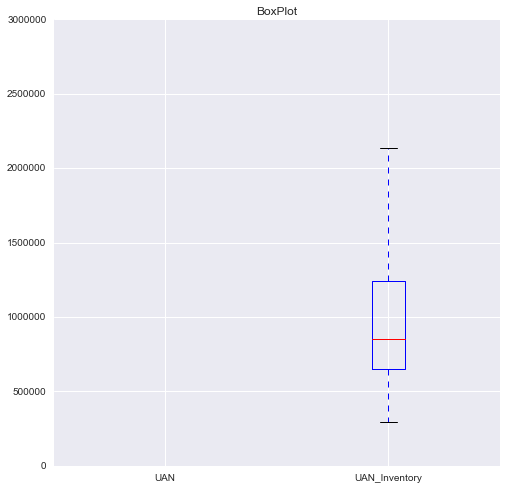

In [3]:
plt.show(df_96on[['UAN','UAN_Inventory']].plot(kind='box',figsize=(8,8),title=('BoxPlot')))

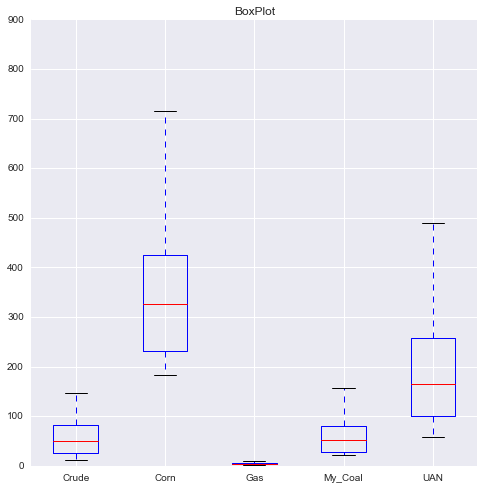

In [4]:
plt.show(df_96on[['Crude','Corn','Gas','My_Coal','UAN']].plot(kind='box',figsize=(8,8),title=('BoxPlot')))

In [5]:
df_96on.describe()

,Crude,Corn,Gas,My_Coal,UAN_Inventory,UAN
count,1062.000000,1062.000000,1062.000000,1062.000000,1062.000000,1062.000000
mean,54.785461,361.748588,4.598145,58.269067,1005441.983512,183.703955
std,31.243572,156.648138,2.364433,33.567989,490773.222051,96.550610
min,11.260000,182.500000,1.661000,20.900000,297701.149400,58.000000
25%,26.417500,231.062500,2.762500,27.425593,650601.513700,101.200000
50%,49.170000,325.500000,4.025500,51.840000,850475.860200,165.200000
75%,81.967500,424.437500,5.824750,79.675000,1245263.158000,257.680000
max,145.860000,809.250000,14.431000,192.500000,2588392.857000,514.880000


In [6]:
df_96on.corr() #gas not correlated to UAN

,Crude,Corn,Gas,My_Coal,UAN_Inventory,UAN
Crude,1.000000,0.777411,0.393632,0.894882,-0.583918,0.879090
Corn,0.777411,1.000000,-0.001415,0.835389,-0.371072,0.817191
Gas,0.393632,-0.001415,1.000000,0.285473,-0.481610,0.344626
My_Coal,0.894882,0.835389,0.285473,1.000000,-0.491347,0.896790
UAN_Inventory,-0.583918,-0.371072,-0.481610,-0.491347,1.000000,-0.529593
UAN,0.879090,0.817191,0.344626,0.896790,-0.529593,1.000000


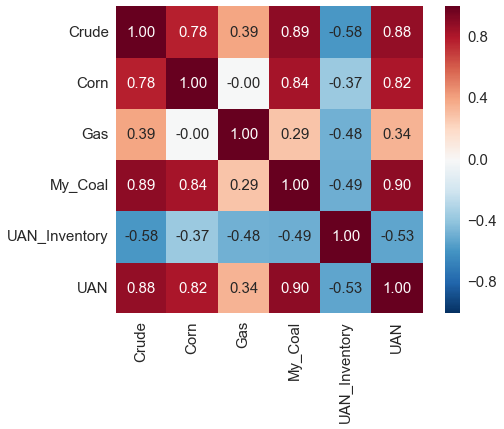

In [7]:
cols= ['Crude','Corn','Gas','My_Coal','UAN_Inventory','UAN']
cm = np.corrcoef(df_96on[cols].values.T)
sns.set(font_scale=1.5)
hm=sns.heatmap(cm,cbar=True,annot=True,square=True,fmt='.2f',annot_kws={'size':15},yticklabels=cols,xticklabels=cols)
plt.show()
#many of the x variables correlated to each other
#crude to corn, coal, UAN_Inventory
#corn to crude, coal
#gas to nothing
#coal to crude, corn
#UAN_Inventory to crude
#UAN to everything but gas

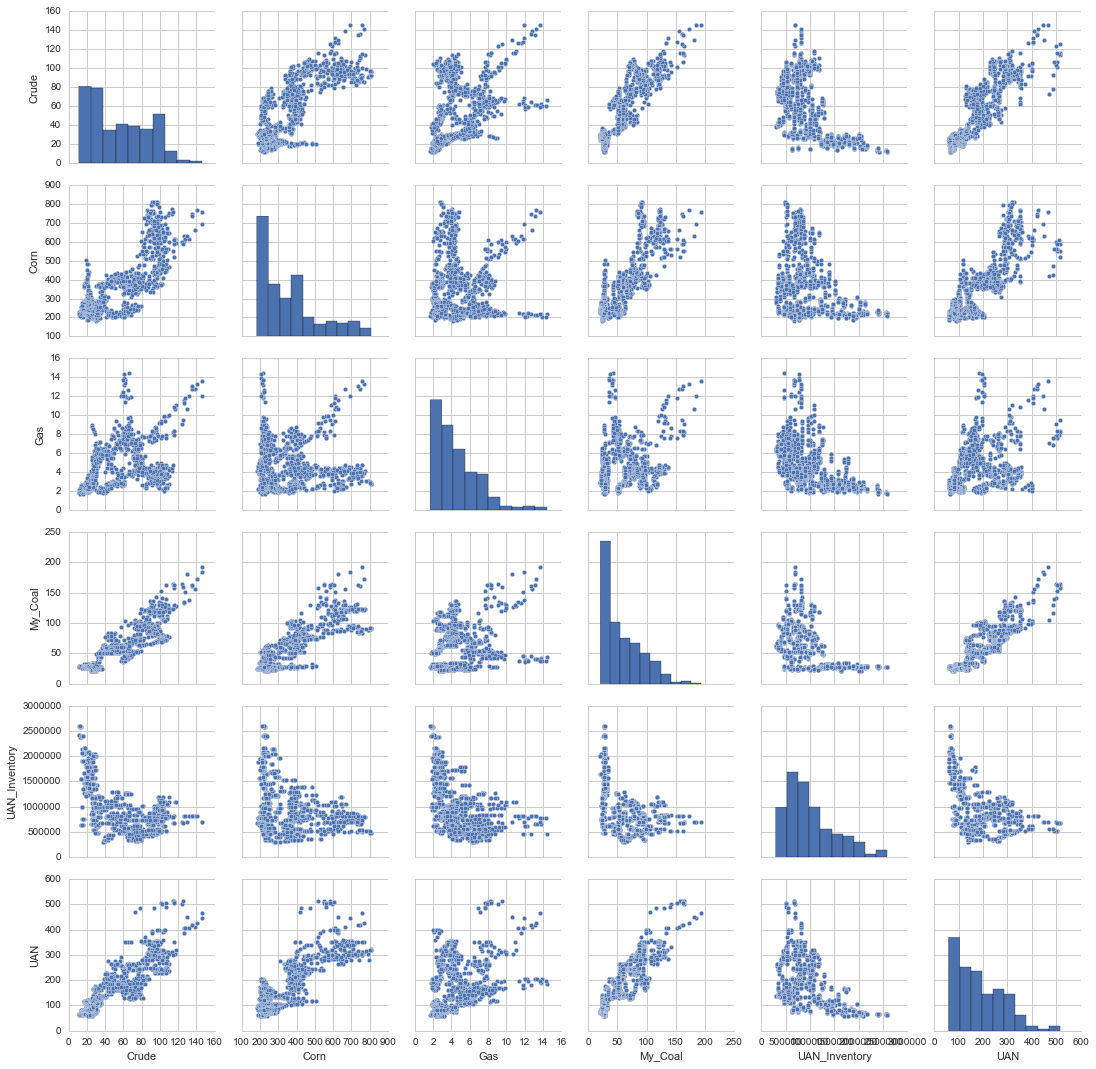

In [8]:
sns.set(style='whitegrid', context='notebook')
sns.pairplot(df_96on, size=2.5);
plt.show()
#pretty much all variables are positively skewed

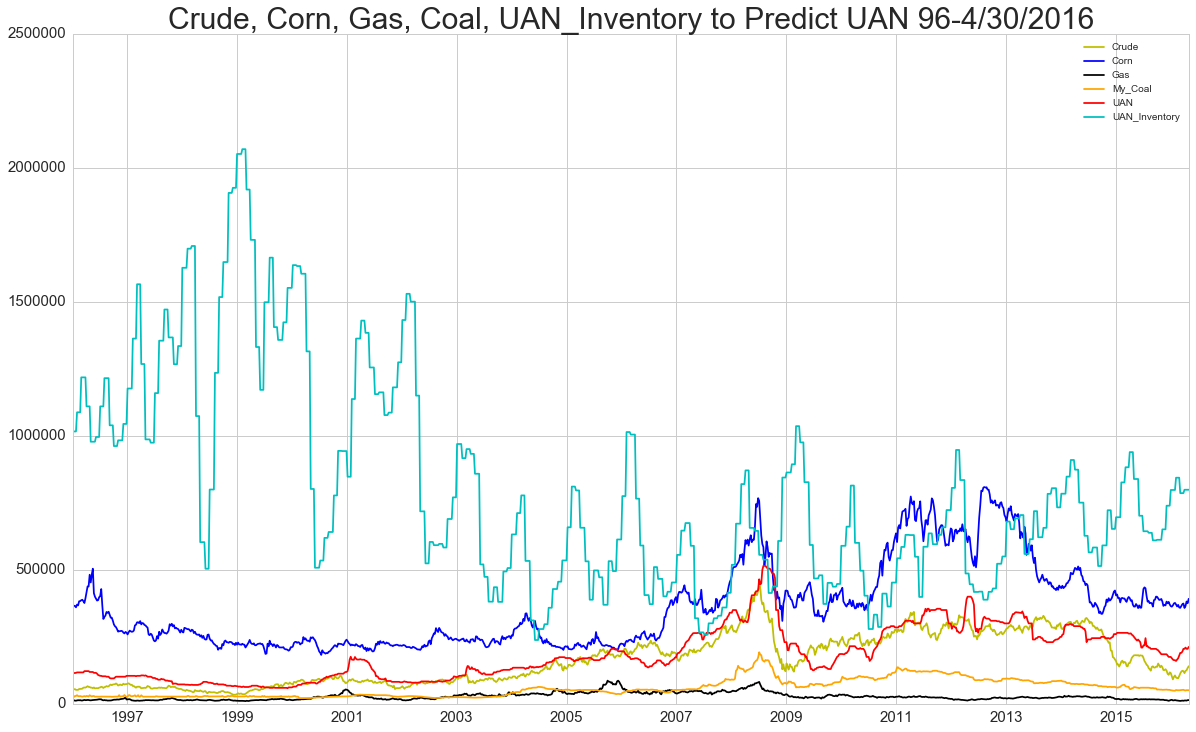

In [9]:
#trend, just modify to look at the different variables and scaling
x = date
#y1 = (df_96on['Dollar'])*2000
y2 = (df_96on['Crude'])*3000
y3 = (df_96on['Corn'])*1000
y4 = (df_96on['Gas'])*6000
y5 = (df_96on['My_Coal'])*1000
#y6 = (df_96on['Monthly Imports'])
#y8 = (df_96on['Urea_Prod'])
y9 = (df_96on['UAN_Inventory'])*.8
y7 = (df_96on['UAN'])*1000

fig = plt.figure(figsize=(20,12))
ax = fig.add_subplot(111)
#ax.plot(x,y1,'g')
ax.plot(x,y2,'y')
ax.plot(x,y3,'b')
ax.plot(x,y4,'k')
ax.plot(x,y5,'orange')
#ax.plot(x,y6,'m')
ax.plot(x,y7,'r')
#ax.plot(x,y8,'lightgreen')
ax.plot(x,y9,'c')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)
ax.set_title('Crude, Corn, Gas, Coal, UAN_Inventory to Predict UAN 96-4/30/2016', size=(30))
ax.tick_params(axis='x',which='major',labelsize=15)
ax.tick_params(axis='y',which='major',labelsize=15)

plt.show()

## Look at different MLR's since different X variables are highly correlated to each other
[Top](#table-of-contents)

In [3]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from statsmodels.sandbox.regression.predstd import wls_prediction_std
#fit a OLS model with all, see how R^2 changes
X = df_96on[['Crude','Corn','Gas','My_Coal','UAN_Inventory']]
Y = df_96on[['UAN']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    UAN   R-squared:                       0.857
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     1267.
Date:                Thu, 19 May 2016   Prob (F-statistic):               0.00
Time:                        10:58:43   Log-Likelihood:                -5326.6
No. Observations:                1062   AIC:                         1.067e+04
Df Residuals:                    1056   BIC:                         1.069e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
const            -6.7031      6.623     -1.012      0.312       -19.698     6.292
Crude             0.6877      0.093      7.414      0.000         0.506     0.870
Corn              0.1929      0.015     12.467      0.000         0.163     0.223
Gas               5.4350      0.647      8.405      0.000         4.166     6.704
My_Coal           1.1012      0.087     12.603      0.000         0.930     1.273
UAN_Inventory -6.162e-06      3e-06     -2.055      0.040      -1.2e-05 -2.78e-07
==============================================================================
Omnibus:                      140.433   Durbin-Watson:                   0.070
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              348.061
Skew:                           0.722   Prob(JB):                     2.63e-76
Kurtosis:                       5.404   Cond. No.                     6.61e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.61e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Forward selection

#### Step 1, 1 variable regressions to see which one has lowest AIC (not p-value since p-value may give high values 
#### to variables that have high correlation)

In [11]:
#crude
X = df_96on[['Crude']]
Y = df_96on[['UAN']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
print(est.aic)
print(est.pvalues)
est.summary()


11149.8458674
const    3.086145e-32
Crude    0.000000e+00
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    UAN   R-squared:                       0.773
Model:                            OLS   Adj. R-squared:                  0.773
Method:                 Least Squares   F-statistic:                     3605.
Date:                Wed, 18 May 2016   Prob (F-statistic):               0.00
Time:                        10:07:04   Log-Likelihood:                -5572.9
No. Observations:                1062   AIC:                         1.115e+04
Df Residuals:                    1060   BIC:                         1.116e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         34.8731      2.853     12.223      0.000        29.275    40.471
Crude          2.7166      0.045     60.046      0.000         2.628     2.805
==============================================================================
Omnibus:                      152.593   Durbin-Watson:                   0.052
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              410.015
Skew:                           0.754   Prob(JB):                     9.25e-90
Kurtosis:                       5.645   Cond. No.                         127.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
#corn
X = df_96on[['Corn']]
Y = df_96on[['UAN']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
print(est.aic)
print(est.pvalues)
est.summary()

11553.3028875
const     7.275055e-01
Corn     6.577385e-256
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    UAN   R-squared:                       0.668
Model:                            OLS   Adj. R-squared:                  0.667
Method:                 Least Squares   F-statistic:                     2131.
Date:                Wed, 18 May 2016   Prob (F-statistic):          6.58e-256
Time:                        10:07:06   Log-Likelihood:                -5774.7
No. Observations:                1062   AIC:                         1.155e+04
Df Residuals:                    1060   BIC:                         1.156e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          1.4991      4.301      0.349      0.728        -6.940     9.939
Corn           0.5037      0.011     46.161      0.000         0.482     0.525
==============================================================================
Omnibus:                      182.571   Durbin-Watson:                   0.043
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              376.253
Skew:                           0.989   Prob(JB):                     1.98e-82
Kurtosis:                       5.143   Cond. No.                         992.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
#coal
X = df_96on[['My_Coal']]
Y = df_96on[['UAN']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
print(est.aic)
print(est.pvalues)
est.summary()

10991.70922
const      1.505786e-34
My_Coal    0.000000e+00
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    UAN   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.804
Method:                 Least Squares   F-statistic:                     4355.
Date:                Wed, 18 May 2016   Prob (F-statistic):               0.00
Time:                        10:07:08   Log-Likelihood:                -5493.9
No. Observations:                1062   AIC:                         1.099e+04
Df Residuals:                    1060   BIC:                         1.100e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         33.4041      2.628     12.710      0.000        28.247    38.561
My_Coal        2.5794      0.039     65.989      0.000         2.503     2.656
==============================================================================
Omnibus:                        1.519   Durbin-Watson:                   0.052
Prob(Omnibus):                  0.468   Jarque-Bera (JB):                1.391
Skew:                           0.077   Prob(JB):                        0.499
Kurtosis:                       3.089   Cond. No.                         135.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
#gas
X = df_96on[['Gas']]
Y = df_96on[['UAN']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
print(est.aic)
print(est.pvalues)
est.summary()

12589.3761268
const    6.460966e-73
Gas      5.584734e-31
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    UAN   R-squared:                       0.119
Model:                            OLS   Adj. R-squared:                  0.118
Method:                 Least Squares   F-statistic:                     142.9
Date:                Wed, 18 May 2016   Prob (F-statistic):           5.58e-31
Time:                        10:07:11   Log-Likelihood:                -6292.7
No. Observations:                1062   AIC:                         1.259e+04
Df Residuals:                    1060   BIC:                         1.260e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const        118.9959      6.087     19.549      0.000       107.052   130.940
Gas           14.0726      1.177     11.952      0.000        11.762    16.383
==============================================================================
Omnibus:                       99.438   Durbin-Watson:                   0.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              123.223
Skew:                           0.820   Prob(JB):                     1.75e-27
Kurtosis:                       2.692   Cond. No.                         11.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
#UAN_inventory
X = df_96on[['UAN_Inventory']]
Y = df_96on[['UAN']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
print(est.aic)
print(est.pvalues)
est.summary()

12374.0847199
const            4.331493e-283
UAN_Inventory     7.951594e-78
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    UAN   R-squared:                       0.280
Model:                            OLS   Adj. R-squared:                  0.280
Method:                 Least Squares   F-statistic:                     413.2
Date:                Wed, 18 May 2016   Prob (F-statistic):           7.95e-78
Time:                        10:07:12   Log-Likelihood:                -6185.0
No. Observations:                1062   AIC:                         1.237e+04
Df Residuals:                    1060   BIC:                         1.238e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
const           288.4587      5.734     50.305      0.000       277.207   299.710
UAN_Inventory    -0.0001   5.13e-06    -20.327      0.000        -0.000 -9.41e-05
==============================================================================
Omnibus:                       81.950   Durbin-Watson:                   0.021
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              100.217
Skew:                           0.705   Prob(JB):                     1.73e-22
Kurtosis:                       3.528   Cond. No.                     2.55e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.55e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Step 2 now using 2 variables (coal had lowest AIC)

In [16]:
#crude and coal
X = df_96on[['My_Coal','Crude']]
Y = df_96on[['UAN']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
print(est.aic)
print(est.pvalues)
est.summary()

10820.6766753
const      1.973761e-24
My_Coal    9.224855e-74
Crude      2.143655e-39
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    UAN   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     2654.
Date:                Wed, 18 May 2016   Prob (F-statistic):               0.00
Time:                        10:07:17   Log-Likelihood:                -5407.3
No. Observations:                1062   AIC:                         1.082e+04
Df Residuals:                    1059   BIC:                         1.084e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         25.9770      2.484     10.459      0.000        21.103    30.851
My_Coal        1.5900      0.081     19.686      0.000         1.431     1.748
Crude          1.1879      0.087     13.689      0.000         1.018     1.358
==============================================================================
Omnibus:                       34.206   Durbin-Watson:                   0.055
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               65.607
Skew:                           0.207   Prob(JB):                     5.67e-15
Kurtosis:                       4.145   Cond. No.                         188.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
#corn and coal
X = df_96on[['My_Coal','Corn']]
Y = df_96on[['UAN']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
print(est.aic)
print(est.pvalues)
est.summary()

10907.2001065
const       4.759081e-06
My_Coal    1.670576e-142
Corn        1.606420e-20
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    UAN   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     2405.
Date:                Wed, 18 May 2016   Prob (F-statistic):               0.00
Time:                        10:07:19   Log-Likelihood:                -5450.6
No. Observations:                1062   AIC:                         1.091e+04
Df Residuals:                    1059   BIC:                         1.092e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         14.7271      3.202      4.599      0.000         8.444    21.011
My_Coal        2.0384      0.068     29.842      0.000         1.904     2.172
Corn           0.1388      0.015      9.480      0.000         0.110     0.167
==============================================================================
Omnibus:                       27.404   Durbin-Watson:                   0.053
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               29.713
Skew:                           0.362   Prob(JB):                     3.53e-07
Kurtosis:                       3.383   Cond. No.                     1.02e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.02e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [18]:
#gas and coal
X = df_96on[['My_Coal','Gas']]
Y = df_96on[['UAN']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
print(est.aic)
print(est.pvalues)
est.summary()

10946.2857538
const      9.239029e-10
My_Coal    0.000000e+00
Gas        6.193809e-12
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    UAN   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     2299.
Date:                Wed, 18 May 2016   Prob (F-statistic):               0.00
Time:                        10:07:20   Log-Likelihood:                -5470.1
No. Observations:                1062   AIC:                         1.095e+04
Df Residuals:                    1059   BIC:                         1.096e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         19.9049      3.222      6.178      0.000        13.583    26.227
My_Coal        2.5002      0.040     62.655      0.000         2.422     2.578
Gas            3.9397      0.567      6.954      0.000         2.828     5.051
==============================================================================
Omnibus:                        4.229   Durbin-Watson:                   0.054
Prob(Omnibus):                  0.121   Jarque-Bera (JB):                4.379
Skew:                           0.097   Prob(JB):                        0.112
Kurtosis:                       3.248   Cond. No.                         170.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
#urea_inventory and coal
X = df_96on[['My_Coal','UAN_Inventory']]
Y = df_96on[['UAN']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
print(est.aic)
print(est.pvalues)
est.summary()

10935.5534568
const             1.165801e-37
My_Coal          3.389766e-314
UAN_Inventory     2.669273e-14
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    UAN   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     2327.
Date:                Wed, 18 May 2016   Prob (F-statistic):               0.00
Time:                        10:07:22   Log-Likelihood:                -5464.8
No. Observations:                1062   AIC:                         1.094e+04
Df Residuals:                    1059   BIC:                         1.095e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
const            66.2573      4.965     13.344      0.000        56.515    76.000
My_Coal           2.4137      0.044     55.248      0.000         2.328     2.499
UAN_Inventory -2.307e-05   2.99e-06     -7.721      0.000     -2.89e-05 -1.72e-05
==============================================================================
Omnibus:                        8.353   Durbin-Watson:                   0.054
Prob(Omnibus):                  0.015   Jarque-Bera (JB):               11.562
Skew:                          -0.031   Prob(JB):                      0.00309
Kurtosis:                       3.507   Cond. No.                     4.35e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.35e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Step 3 (coal and crude)

In [20]:
#crude and coal, corn
X = df_96on[['My_Coal','Crude','Corn']]
Y = df_96on[['UAN']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
print(est.aic)
print(est.pvalues)
est.summary()

10751.758813
const      3.329192e-04
My_Coal    6.741034e-38
Crude      5.731829e-36
Corn       4.336407e-17
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    UAN   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     1914.
Date:                Wed, 18 May 2016   Prob (F-statistic):               0.00
Time:                        10:07:28   Log-Likelihood:                -5371.9
No. Observations:                1062   AIC:                         1.075e+04
Df Residuals:                    1058   BIC:                         1.077e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         10.7658      2.990      3.600      0.000         4.898    16.634
My_Coal        1.2067      0.090     13.393      0.000         1.030     1.384
Crude          1.1000      0.085     13.003      0.000         0.934     1.266
Corn           0.1171      0.014      8.548      0.000         0.090     0.144
==============================================================================
Omnibus:                      106.338   Durbin-Watson:                   0.059
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              247.738
Skew:                           0.576   Prob(JB):                     1.60e-54
Kurtosis:                       5.067   Cond. No.                     1.03e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.03e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [21]:
#crude and coal, gas
X = df_96on[['My_Coal','Crude','Gas']]
Y = df_96on[['UAN']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
print(est.aic)
print(est.pvalues)
est.summary()

10812.8483411
const      1.952780e-11
My_Coal    8.012202e-76
Crude      3.535381e-31
Gas        1.757793e-03
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    UAN   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     1787.
Date:                Wed, 18 May 2016   Prob (F-statistic):               0.00
Time:                        10:07:30   Log-Likelihood:                -5402.4
No. Observations:                1062   AIC:                         1.081e+04
Df Residuals:                    1058   BIC:                         1.083e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         20.5169      3.025      6.783      0.000        14.582    26.452
My_Coal        1.6316      0.082     20.014      0.000         1.472     1.792
Crude          1.0954      0.091     11.996      0.000         0.916     1.275
Gas            1.7623      0.562      3.136      0.002         0.660     2.865
==============================================================================
Omnibus:                       31.065   Durbin-Watson:                   0.056
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               56.189
Skew:                           0.204   Prob(JB):                     6.29e-13
Kurtosis:                       4.051   Cond. No.                         232.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
#crude and coal, urea_inventory
X = df_96on[['My_Coal','Crude','UAN_Inventory']]
Y = df_96on[['UAN']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
print(est.aic)
print(est.pvalues)
est.summary()

10811.6539661
const            4.921032e-15
My_Coal          1.122522e-75
Crude            4.230934e-29
UAN_Inventory    9.229901e-04
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    UAN   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     1790.
Date:                Wed, 18 May 2016   Prob (F-statistic):               0.00
Time:                        10:07:32   Log-Likelihood:                -5401.8
No. Observations:                1062   AIC:                         1.081e+04
Df Residuals:                    1058   BIC:                         1.083e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
const            41.0486      5.166      7.946      0.000        30.911    51.186
My_Coal           1.6131      0.081     19.991      0.000         1.455     1.771
Crude             1.0733      0.093     11.540      0.000         0.891     1.256
UAN_Inventory -1.008e-05   3.03e-06     -3.322      0.001      -1.6e-05 -4.13e-06
==============================================================================
Omnibus:                       33.717   Durbin-Watson:                   0.055
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               72.447
Skew:                           0.150   Prob(JB):                     1.85e-16
Kurtosis:                       4.244   Cond. No.                     4.80e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.8e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Step 4 (coal, crude, corn)

In [23]:
#crude and coal, corn, gas
X = df_96on[['My_Coal','Crude','Corn','Gas']]
Y = df_96on[['UAN']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
print(est.aic)
print(est.pvalues)
est.summary()

10667.3590369
const      2.913369e-05
My_Coal    1.616949e-33
Crude      8.141708e-16
Corn       9.006703e-34
Gas        1.843003e-20
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    UAN   R-squared:                       0.857
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     1578.
Date:                Wed, 18 May 2016   Prob (F-statistic):               0.00
Time:                        10:07:48   Log-Likelihood:                -5328.7
No. Observations:                1062   AIC:                         1.067e+04
Df Residuals:                    1057   BIC:                         1.069e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const        -17.3488      4.132     -4.198      0.000       -25.457    -9.241
My_Coal        1.0921      0.087     12.496      0.000         0.921     1.264
Crude          0.7355      0.090      8.179      0.000         0.559     0.912
Corn           0.1943      0.015     12.549      0.000         0.164     0.225
Gas            5.8392      0.617      9.465      0.000         4.629     7.050
==============================================================================
Omnibus:                      143.793   Durbin-Watson:                   0.071
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              350.602
Skew:                           0.743   Prob(JB):                     7.37e-77
Kurtosis:                       5.390   Cond. No.                     1.49e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.49e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [25]:
#crude and coal, corn, urea_inventory
X = df_96on[['My_Coal','Crude','Corn','UAN_Inventory']]
Y = df_96on[['UAN']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
print(est.aic)
print(est.pvalues)
est.summary()

10731.890937
const            4.133092e-09
My_Coal          1.052918e-38
Crude            8.037941e-24
Corn             1.900561e-19
UAN_Inventory    3.098389e-06
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    UAN   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     1469.
Date:                Wed, 18 May 2016   Prob (F-statistic):               0.00
Time:                        10:08:54   Log-Likelihood:                -5360.9
No. Observations:                1062   AIC:                         1.073e+04
Df Residuals:                    1057   BIC:                         1.076e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
const            30.2901      5.109      5.929      0.000        20.265    40.315
My_Coal           1.2093      0.089     13.554      0.000         1.034     1.384
Crude             0.9360      0.091     10.312      0.000         0.758     1.114
Corn              0.1260      0.014      9.197      0.000         0.099     0.153
UAN_Inventory -1.383e-05   2.95e-06     -4.689      0.000     -1.96e-05 -8.04e-06
==============================================================================
Omnibus:                      106.151   Durbin-Watson:                   0.059
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              272.589
Skew:                           0.545   Prob(JB):                     6.43e-60
Kurtosis:                       5.230   Cond. No.                     4.93e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.93e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Step 5 (coal, crude, corn, gas)

In [26]:
#crude and coal, corn, gas, urea_inventory
X = df_96on[['My_Coal','Crude','Corn','Gas','UAN_Inventory']]
Y = df_96on[['UAN']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
print(est.aic)
print(est.pvalues)
est.summary()

10665.1208543
const            3.117116e-01
My_Coal          5.008394e-34
Crude            2.509832e-13
Corn             2.232938e-33
Gas              1.369500e-16
UAN_Inventory    4.013322e-02
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    UAN   R-squared:                       0.857
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     1267.
Date:                Wed, 18 May 2016   Prob (F-statistic):               0.00
Time:                        10:08:59   Log-Likelihood:                -5326.6
No. Observations:                1062   AIC:                         1.067e+04
Df Residuals:                    1056   BIC:                         1.069e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
const            -6.7031      6.623     -1.012      0.312       -19.698     6.292
My_Coal           1.1012      0.087     12.603      0.000         0.930     1.273
Crude             0.6877      0.093      7.414      0.000         0.506     0.870
Corn              0.1929      0.015     12.467      0.000         0.163     0.223
Gas               5.4350      0.647      8.405      0.000         4.166     6.704
UAN_Inventory -6.162e-06      3e-06     -2.055      0.040      -1.2e-05 -2.78e-07
==============================================================================
Omnibus:                      140.433   Durbin-Watson:                   0.070
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              348.061
Skew:                           0.722   Prob(JB):                     2.63e-76
Kurtosis:                       5.404   Cond. No.                     6.61e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.61e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### so summary from forward selection is technically best model uses coal, crude, corn, gas, uan_inventory, however UAN inventory doesn't change R^2


### Do same thing for RDF, but I will do backward selection first
[Top](#table-of-contents)

In [4]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
X = df_96on[['Corn','Gas','UAN_Inventory']].values
y = df_96on['UAN'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)

In [5]:
from sklearn import metrics
from sklearn import grid_search
from sklearn.grid_search import GridSearchCV

def fit_predict_model(X_train,y_train,):
    """Find and tune the optimal model. Make a prediction on uAN data"""
    
    # Setup a Random Forest Regressor
    regressor = RandomForestRegressor()

    parameters = {'n_estimators':(100,125,150,175,200),
                  'max_depth':(5,6,7,8,9,10)}

    mse_scorer = metrics.make_scorer(metrics.mean_squared_error, greater_is_better = False)
    
    # use grid search to fine tune the RandomForests Regressor and
    # obtain the parameters that generate the best training performance. 
    reg = grid_search.GridSearchCV(regressor, param_grid=parameters,
                                   scoring=mse_scorer, cv = 10)
    
    # Fit the learner to the training data to obtain the best parameter set
    print ("Final Model: ")
    print (reg.fit(X_train, y_train))
    return reg

In [7]:
rdf_model_uancorn = fit_predict_model(X_train,y_train)
print (rdf_model_uancorn.best_estimator_)

Final Model: 
GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': (100, 125, 150, 175, 200), 'max_depth': (5, 6, 7, 8, 9, 10)},
       pre_dispatch='2*n_jobs', refit=True,
       scoring=make_scorer(mean_squared_error, greater_is_better=False),
       verbose=0)
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=200, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)


In [9]:
X = df_96on[['Corn','Gas','UAN_Inventory']].values
y = df_96on['UAN'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)
forest=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=200, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest.fit(X_train, y_train)
y_train_pred= forest.predict(X_train)
y_test_pred= forest.predict(X_test)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_test,y_test_pred)))
print(forest.feature_importances_)#crude, corn, coal, urea_prod
#uAN_inventory least important

MSE train: 119.008, test: 551.494
R^2 train: 0.987, test: 0.941
[ 0.76974134  0.14279894  0.08745972]


In [27]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
X = df_96on[['Crude','Corn','Gas','My_Coal','UAN_Inventory']].values
y = df_96on['UAN'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)

In [28]:
from sklearn import metrics
from sklearn import grid_search
from sklearn.grid_search import GridSearchCV

def fit_predict_model(X_train,y_train,):
    """Find and tune the optimal model. Make a prediction on uAN data"""
    
    # Setup a Random Forest Regressor
    regressor = RandomForestRegressor()

    parameters = {'n_estimators':(100,125,150,175,200),
                  'max_depth':(5,6,7,8,9,10)}

    mse_scorer = metrics.make_scorer(metrics.mean_squared_error, greater_is_better = False)
    
    # use grid search to fine tune the RandomForests Regressor and
    # obtain the parameters that generate the best training performance. 
    reg = grid_search.GridSearchCV(regressor, param_grid=parameters,
                                   scoring=mse_scorer, cv = 10)
    
    # Fit the learner to the training data to obtain the best parameter set
    print ("Final Model: ")
    print (reg.fit(X_train, y_train))
    return reg

In [ ]:
#do multiple times to see what parameters are the best
rdf_model_uanall = fit_predict_model(X_train,y_train)
print (rdf_model_uanall.best_estimator_)

In [29]:
X = df_96on[['Crude','Corn','Gas','My_Coal','UAN_Inventory']].values
y = df_96on['UAN'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)
forest=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=175, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest.fit(X_train, y_train)
y_train_pred= forest.predict(X_train)
y_test_pred= forest.predict(X_test)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_test,y_test_pred)))
print(forest.feature_importances_)#crude, corn, coal, urea_prod
#uAN_inventory least important

MSE train: 60.907, test: 442.009
R^2 train: 0.993, test: 0.952
[ 0.41552451  0.12369747  0.03252776  0.40104713  0.02720312]


In [30]:
#no uan_inventory
X = df_96on[['Crude','Corn','Gas','My_Coal']].values
y = df_96on['UAN'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)

In [ ]:
rdf_model_uannoinv = fit_predict_model(X_train,y_train)
print (rdf_model_uannoinv.best_estimator_)

In [31]:
X = df_96on[['Crude','Corn','Gas','My_Coal']].values
y = df_96on['UAN'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)
forest=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest.fit(X_train, y_train)
y_train_pred= forest.predict(X_train)
y_test_pred= forest.predict(X_test)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_test,y_test_pred)))
print(forest.feature_importances_)

MSE train: 79.474, test: 503.126
R^2 train: 0.991, test: 0.946
[ 0.4039025   0.13720244  0.03948866  0.4194064 ]


In [32]:
#no crude
X = df_96on[['Corn','My_Coal','Gas','UAN_Inventory']].values
y = df_96on['UAN'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)

In [ ]:
rdf_model_uannocrude = fit_predict_model(X_train,y_train)
print (rdf_model_uannocrude.best_estimator_)

In [33]:
X = df_96on[['Corn','My_Coal','Gas','UAN_Inventory']].values
y = df_96on['UAN'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)
forest=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=150, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest.fit(X_train, y_train)
y_train_pred= forest.predict(X_train)
y_test_pred= forest.predict(X_test)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_test,y_test_pred)))
print(forest.feature_importances_)

MSE train: 63.850, test: 425.161
R^2 train: 0.993, test: 0.954
[ 0.30147339  0.623015    0.04168143  0.03383019]


In [34]:
#no coal
X = df_96on[['Crude','Corn','Gas','UAN_Inventory']].values
y = df_96on['UAN'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)

In [ ]:
rdf_model_uannocoal = fit_predict_model(X_train,y_train)
print (rdf_model_uannocoal.best_estimator_)

In [35]:
#this time top 3 not enough in my opinion
X = df_96on[['Crude','Corn','Gas','UAN_Inventory']].values
y = df_96on['UAN'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)
forest=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=200, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest.fit(X_train, y_train)
y_train_pred= forest.predict(X_train)
y_test_pred= forest.predict(X_test)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_test,y_test_pred)))
print(forest.feature_importances_)

MSE train: 94.251, test: 426.668
R^2 train: 0.990, test: 0.954
[ 0.72120417  0.17445084  0.06358611  0.04075888]


In [36]:
#no crude or corn since correlated to each other
X = df_96on[['My_Coal','Gas','UAN_Inventory']].values
y = df_96on['UAN'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)

In [ ]:
rdf_model_uannocrudecorn = fit_predict_model(X_train,y_train)
print (rdf_model_uannocrudecorn.best_estimator_)

In [37]:
X = df_96on[['My_Coal','Gas','UAN_Inventory']].values
y = df_96on['UAN'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)
forest=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=200, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest.fit(X_train, y_train)
y_train_pred= forest.predict(X_train)
y_test_pred= forest.predict(X_test)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_test,y_test_pred)))
print(forest.feature_importances_)

MSE train: 76.997, test: 605.417
R^2 train: 0.992, test: 0.935
[ 0.87614484  0.06522038  0.05863478]


## Added UAN and UAN_Inventory to the older files (they are labeled as urea however used to predict UAN)

# Average Case
[Top](#table-of-contents)
####                 crude	 corn	      gas	  coal
#### Q2-16	 	 39.42 	 370.22 	 2.11 	 51.70 
#### Q3-16		 44.49 	 373.22 	 2.39 	 51.75 
#### Q4-16	 	 47.96 	 375.33 	 2.62 	 51.55 
#### Q1-17	 	 49.26 	 366.71 	 2.87 	 52.83 
#### Q2-17	 	 52.41 	 375.17 	 2.75 	 53.67 
#### ALL-17	 	 53.67 	 385.22 	 2.93 	 56.28 
#### ALL-18	 	 62.61 	 406.00 	 3.43 	 64.07 
#### ALL-19	 	 66.60 	 392.00 	 3.70 	 66.90 
#### ALL-20	 	 77.06 	 466.25 	 3.94 	 58.10 

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.ensemble import RandomForestRegressor
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
data = pd.read_csv("C:/Users/msteinme/Documents/ureaaprilavgrandomness.csv")
df_96on = data[['Date','Crude','Corn','My_Coal','Gas','UAN_Inventory','UAN']][0:1062]
df_96on.tail()
#1/5/1996 - 4/30/2016

,Date,Crude,Corn,My_Coal,Gas,UAN_Inventory,UAN
1057,4/8/2016,40.99,365.00,49.85,2.08,998987.8733,209.92
1058,4/15/2016,41.71,382.00,50.85,2.00,998987.8733,205.12
1059,4/22/2016,44.54,375.50,51.00,2.27,998987.8733,205.12
1060,4/29/2016,46.69,391.75,50.75,2.32,998987.8733,212.16
1061,4/30/2016,46.69,391.75,50.75,2.32,998987.8733,212.16


In [39]:
from datetime import datetime
df_96on['Date'] = pd.to_datetime(df_96on['Date'])
date = df_96on['Date']
df_96on.dtypes

Date             datetime64[ns]
Crude                   float64
Corn                    float64
My_Coal                 float64
Gas                     float64
UAN_Inventory           float64
UAN                     float64
dtype: object

In [40]:
df_96on.describe()

,Crude,Corn,My_Coal,Gas,UAN_Inventory,UAN
count,1062.000000,1062.000000,1062.000000,1062.000000,1062.000000,1062.000000
mean,54.785461,361.748588,58.269360,4.598559,1005441.983512,183.703955
std,31.243572,156.648138,33.567719,2.364318,490773.222051,96.550610
min,11.260000,182.500000,20.900000,1.660000,297701.149400,58.000000
25%,26.417500,231.062500,27.430000,2.760000,650601.513700,101.200000
50%,49.170000,325.500000,51.840000,4.025000,850475.860200,165.200000
75%,81.967500,424.437500,79.675000,5.825000,1245263.158000,257.680000
max,145.860000,809.250000,192.500000,14.430000,2588392.857000,514.880000


### MLR model
[Top](#table-of-contents)

In [41]:
# full MLr
X = df_96on[['Crude','Corn','My_Coal','Gas','UAN_Inventory']]
Y = df_96on[['UAN']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    UAN   R-squared:                       0.857
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     1267.
Date:                Wed, 18 May 2016   Prob (F-statistic):               0.00
Time:                        10:15:25   Log-Likelihood:                -5326.6
No. Observations:                1062   AIC:                         1.067e+04
Df Residuals:                    1056   BIC:                         1.069e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
const            -6.7111      6.623     -1.013      0.311       -19.707     6.285
Crude             0.6876      0.093      7.413      0.000         0.506     0.870
Corn              0.1929      0.015     12.467      0.000         0.163     0.223
My_Coal           1.1011      0.087     12.602      0.000         0.930     1.273
Gas               5.4360      0.647      8.406      0.000         4.167     6.705
UAN_Inventory -6.163e-06      3e-06     -2.055      0.040      -1.2e-05 -2.79e-07
==============================================================================
Omnibus:                      140.428   Durbin-Watson:                   0.070
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              348.002
Skew:                           0.722   Prob(JB):                     2.71e-76
Kurtosis:                       5.404   Cond. No.                     6.62e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.62e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### 3 RDF models will be used, parameters found above in exploratory analysis
### all variables, no crude, no crude or corn
[Top](#table-of-contents)

In [42]:
#rdf using all
X = df_96on[['Crude','Corn','My_Coal','Gas','UAN_Inventory']].values
y = df_96on['UAN'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)
forest=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=175, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest.fit(X_train, y_train)
y_train_pred= forest.predict(X_train)
y_test_pred= forest.predict(X_test)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_test,y_test_pred)))
print(forest.feature_importances_)

MSE train: 63.566, test: 436.796
R^2 train: 0.993, test: 0.953
[ 0.3648797   0.14169709  0.43537843  0.03158924  0.02645554]


In [43]:
#comparing the different models
urea_predicted3 = forest.predict(X)
urea_predicted3 = pd.DataFrame(urea_predicted3)
df_96on['UAN_Pred_RDF_All'] = urea_predicted3
rdf_error3 = (abs(df_96on['UAN_Pred_RDF_All'] - df_96on['UAN'])/df_96on['UAN'])*100
df_96on['RDF_All_Error'] = rdf_error3

mlrtop3_predicted = -6.7111 + (df_96on['Crude']*0.6876) + (df_96on['Corn']*0.1929) + (df_96on['My_Coal']*1.1011) + (df_96on['Gas']*5.4360) - (df_96on['UAN_Inventory']*0.000006163) 
df_96on['UAN_Pred_MLR_All'] = mlrtop3_predicted
mlrtop3_error = (abs(df_96on['UAN_Pred_MLR_All'] - df_96on['UAN'])/df_96on['UAN'])*100
df_96on['MLR_Error_All'] = mlrtop3_error

mlrtop4_predicted = -17.3488 + (df_96on['Crude']*0.7355) + (df_96on['Corn']*0.1943) + (df_96on['My_Coal']*1.0921) + (df_96on['Gas']*5.8392) 
df_96on['UAN_Pred_MLR_NoInv'] = mlrtop4_predicted
mlrtop4_error = (abs(df_96on['UAN_Pred_MLR_NoInv'] - df_96on['UAN'])/df_96on['UAN'])*100
df_96on['MLR_Error_NoInv'] = mlrtop4_error

print("Average RDF ALL error is: %.3f" % (rdf_error3.mean())) 
print("Average MLR ALL error is: %.3f" % (mlrtop3_error.mean()))
print("Average MLR no UAN_Inventory error is: %.3f" % (mlrtop4_error.mean()))
df_96on

Average RDF ALL error is: 3.342
Average MLR ALL error is: 14.928
Average MLR no UAN_Inventory error is: 15.299


,Date,Crude,Corn,My_Coal,Gas,UAN_Inventory,UAN,UAN_Pred_RDF_All,RDF_All_Error,UAN_Pred_MLR_All,MLR_Error_All,UAN_Pred_MLR_NoInv,MLR_Error_NoInv
0,1996-01-05,19.65,369.75,25.36,2.42,1271052.6320,114.00,113.334815,0.583496,111.370534,2.306549,110.772720,2.830947
1,1996-01-12,17.98,366.25,25.27,2.22,1271052.6320,114.96,111.685604,2.848292,108.360793,5.740438,107.598256,6.403744
2,1996-01-19,18.25,365.00,29.07,1.96,1271052.6320,114.96,112.480408,2.156917,111.076140,3.378445,110.185754,4.152963
3,1996-01-26,17.36,360.25,29.20,1.95,1271052.6320,115.60,111.351507,3.675167,109.636684,5.158578,108.691815,5.975939
4,1996-02-02,17.38,370.50,32.11,2.08,1360394.7370,117.20,115.237878,1.674166,114.987926,1.887435,114.635207,2.188390
5,1996-02-09,17.38,367.25,28.67,2.24,1360394.7370,117.20,112.049129,4.394942,111.442977,4.912135,111.181180,5.135512
6,1996-02-16,18.40,382.75,28.17,2.17,1360394.7370,117.20,116.978808,0.188730,114.203209,2.556989,113.988246,2.740404
7,1996-02-23,18.45,383.50,28.83,2.26,1360394.7370,117.20,116.923951,0.235537,115.598230,1.366698,115.417060,1.521280
8,1996-03-01,18.62,386.75,27.86,2.06,1523421.0530,117.20,117.208163,0.006965,113.182049,3.428286,113.946393,2.776115
9,1996-03-08,18.87,388.50,26.51,2.05,1523421.0530,117.20,116.055815,0.976267,112.150679,4.308294,112.937566,3.636889


In [44]:
#no crude since highly correlated to coal
X = df_96on[['Corn','My_Coal','Gas','UAN_Inventory']].values
y = df_96on['UAN'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)
forest=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=150, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest.fit(X_train, y_train)
y_train_pred= forest.predict(X_train)
y_test_pred= forest.predict(X_test)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_test,y_test_pred)))
print(forest.feature_importances_)

MSE train: 63.512, test: 453.086
R^2 train: 0.993, test: 0.951
[ 0.29031796  0.63456043  0.04115436  0.03396726]


In [45]:
#adding 2nd to last model
urea_predicted4 = forest.predict(X)
urea_predicted4 = pd.DataFrame(urea_predicted4)
df_96on['UAN_Pred_RDF_NoCrude'] = urea_predicted4
rdf_error4 = (abs(df_96on['UAN_Pred_RDF_NoCrude'] - df_96on['UAN'])/df_96on['UAN'])*100
df_96on['RDF_Error_NoCrude'] = rdf_error4

print("Average RDF no crude error is: %.3f" % (rdf_error4.mean()))
df_96on

Average RDF no crude error is: 3.584


,Date,Crude,Corn,My_Coal,Gas,UAN_Inventory,UAN,UAN_Pred_RDF_All,RDF_All_Error,UAN_Pred_MLR_All,MLR_Error_All,UAN_Pred_MLR_NoInv,MLR_Error_NoInv,UAN_Pred_RDF_NoCrude,RDF_Error_NoCrude
0,1996-01-05,19.65,369.75,25.36,2.42,1271052.6320,114.00,113.334815,0.583496,111.370534,2.306549,110.772720,2.830947,113.627738,0.326545
1,1996-01-12,17.98,366.25,25.27,2.22,1271052.6320,114.96,111.685604,2.848292,108.360793,5.740438,107.598256,6.403744,111.779552,2.766570
2,1996-01-19,18.25,365.00,29.07,1.96,1271052.6320,114.96,112.480408,2.156917,111.076140,3.378445,110.185754,4.152963,111.120023,3.340272
3,1996-01-26,17.36,360.25,29.20,1.95,1271052.6320,115.60,111.351507,3.675167,109.636684,5.158578,108.691815,5.975939,111.835223,3.256728
4,1996-02-02,17.38,370.50,32.11,2.08,1360394.7370,117.20,115.237878,1.674166,114.987926,1.887435,114.635207,2.188390,116.269511,0.793932
5,1996-02-09,17.38,367.25,28.67,2.24,1360394.7370,117.20,112.049129,4.394942,111.442977,4.912135,111.181180,5.135512,111.719654,4.676063
6,1996-02-16,18.40,382.75,28.17,2.17,1360394.7370,117.20,116.978808,0.188730,114.203209,2.556989,113.988246,2.740404,117.032178,0.143193
7,1996-02-23,18.45,383.50,28.83,2.26,1360394.7370,117.20,116.923951,0.235537,115.598230,1.366698,115.417060,1.521280,117.192178,0.006674
8,1996-03-01,18.62,386.75,27.86,2.06,1523421.0530,117.20,117.208163,0.006965,113.182049,3.428286,113.946393,2.776115,117.837333,0.543800
9,1996-03-08,18.87,388.50,26.51,2.05,1523421.0530,117.20,116.055815,0.976267,112.150679,4.308294,112.937566,3.636889,116.619911,0.494956


In [46]:
#best, since no x variables correlated to each other
X = df_96on[['My_Coal','Gas','UAN_Inventory']].values
y = df_96on['UAN'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)
forest=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=200, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest.fit(X_train, y_train)
y_train_pred= forest.predict(X_train)
y_test_pred= forest.predict(X_test)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_test,y_test_pred)))
print(forest.feature_importances_)

MSE train: 73.337, test: 592.234
R^2 train: 0.992, test: 0.936
[ 0.8765201   0.06376569  0.05971421]


In [47]:
#last added model
urea_predicted6 = forest.predict(X)
urea_predicted6 = pd.DataFrame(urea_predicted6)
df_96on['UAN_Pred_RDF_NoCrudeCorn'] = urea_predicted6
rdf_error6 = (abs(df_96on['UAN_Pred_RDF_NoCrudeCorn'] - df_96on['UAN'])/df_96on['UAN'])*100
df_96on['RDF_Error_NoCrudeCorn'] = rdf_error6

print("Average RDF no crude or corn error is: %.3f" % (rdf_error6.mean()))
df_96on

Average RDF no crude or corn error is: 4.492


,Date,Crude,Corn,My_Coal,Gas,UAN_Inventory,UAN,UAN_Pred_RDF_All,RDF_All_Error,UAN_Pred_MLR_All,MLR_Error_All,UAN_Pred_MLR_NoInv,MLR_Error_NoInv,UAN_Pred_RDF_NoCrude,RDF_Error_NoCrude,UAN_Pred_RDF_NoCrudeCorn,RDF_Error_NoCrudeCorn
0,1996-01-05,19.65,369.75,25.36,2.42,1271052.6320,114.00,113.334815,0.583496,111.370534,2.306549,110.772720,2.830947,113.627738,0.326545,108.062383,5.208436
1,1996-01-12,17.98,366.25,25.27,2.22,1271052.6320,114.96,111.685604,2.848292,108.360793,5.740438,107.598256,6.403744,111.779552,2.766570,108.266065,5.822839
2,1996-01-19,18.25,365.00,29.07,1.96,1271052.6320,114.96,112.480408,2.156917,111.076140,3.378445,110.185754,4.152963,111.120023,3.340272,94.621167,17.692096
3,1996-01-26,17.36,360.25,29.20,1.95,1271052.6320,115.60,111.351507,3.675167,109.636684,5.158578,108.691815,5.975939,111.835223,3.256728,94.058271,18.634713
4,1996-02-02,17.38,370.50,32.11,2.08,1360394.7370,117.20,115.237878,1.674166,114.987926,1.887435,114.635207,2.188390,116.269511,0.793932,111.993938,4.442033
5,1996-02-09,17.38,367.25,28.67,2.24,1360394.7370,117.20,112.049129,4.394942,111.442977,4.912135,111.181180,5.135512,111.719654,4.676063,112.962633,3.615501
6,1996-02-16,18.40,382.75,28.17,2.17,1360394.7370,117.20,116.978808,0.188730,114.203209,2.556989,113.988246,2.740404,117.032178,0.143193,107.924500,7.914250
7,1996-02-23,18.45,383.50,28.83,2.26,1360394.7370,117.20,116.923951,0.235537,115.598230,1.366698,115.417060,1.521280,117.192178,0.006674,114.272159,2.498158
8,1996-03-01,18.62,386.75,27.86,2.06,1523421.0530,117.20,117.208163,0.006965,113.182049,3.428286,113.946393,2.776115,117.837333,0.543800,107.980079,7.866827
9,1996-03-08,18.87,388.50,26.51,2.05,1523421.0530,117.20,116.055815,0.976267,112.150679,4.308294,112.937566,3.636889,116.619911,0.494956,107.354592,8.400519


In [48]:
#predictions section 5/1/2016 - 12/31/2020
newpred2 = data[['Date','Crude','Corn','My_Coal','Gas','UAN_Inventory']][1062:2768]
newpred = data [['Crude','Corn','My_Coal','Gas','Urea_Inventory']][1062:2768]
newpred3 = data[['Corn','My_Coal','Gas','UAN_Inventory']][1062:2768]
newpred4 = data[['My_Coal','Gas','UAN_Inventory']][1062:2768]

In [49]:
#new predictions
X = df_96on[['Crude','Corn','My_Coal','Gas','UAN_Inventory']].values 
y = df_96on['UAN'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)
forest=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=175, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest.fit(X_train, y_train)
y_train_pred= forest.predict(X_train)
y_test_pred= forest.predict(X_test)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_test,y_test_pred)))
print(forest.feature_importances_)

newpred2 = np.array(newpred2)
newpred2 = pd.DataFrame(newpred2)
newpred2.columns = ['Date','Crude','Corn','My_Coal','Gas','UAN_Inventory']
newpred_predicted = forest.predict(newpred)
df_new_pred = pd.DataFrame(newpred_predicted)
newpred2['UAN_Pred_RDF_All'] = df_new_pred

newpred2['Date'] = pd.to_datetime(newpred2['Date'])
newpred2

MSE train: 60.614, test: 444.498
R^2 train: 0.994, test: 0.952
[ 0.40958422  0.13692759  0.39499239  0.03144174  0.02705406]


,Date,Crude,Corn,My_Coal,Gas,UAN_Inventory,UAN_Pred_RDF_All
0,2016-05-01,46.69,391.75,50.75,2.32,1.04439e+06,175.944132
1,2016-05-02,43.96,388.99,51.52,2.18,1.04439e+06,171.308951
2,2016-05-03,41.53,382.24,51.08,2.3,1.04439e+06,170.643229
3,2016-05-04,39.86,376.12,51.17,2.21,1.04439e+06,170.322948
4,2016-05-05,46.36,390,51.13,2.13,1.04439e+06,171.933201
5,2016-05-06,40.12,390.84,50.85,2.29,1.04439e+06,172.602661
6,2016-05-07,45.16,378.17,51.35,2.25,1.04439e+06,170.535282
7,2016-05-08,45.43,390.53,50.76,2.23,1.04439e+06,173.035231
8,2016-05-09,42.56,373.35,51.37,2.12,1.04439e+06,170.217111
9,2016-05-10,44.98,371.27,50.83,2.13,1.04439e+06,170.921284


In [50]:
#other predictions
X = df_96on[['Corn','My_Coal','Gas','UAN_Inventory']].values 
y = df_96on['UAN'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)
forest=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=150, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest.fit(X_train, y_train)
y_train_pred= forest.predict(X_train)
y_test_pred= forest.predict(X_test)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_test,y_test_pred)))
print(forest.feature_importances_)
newpred_predicted2 = forest.predict(newpred3)
df_new_pred2 = pd.DataFrame(newpred_predicted2)
newpred2['UAN_Pred_RDF_NoCrude'] = df_new_pred2

mlrtop3_predicted2 = -6.7111 + (newpred2['Crude']*0.6876) + (newpred2['Corn']*0.1929) + (newpred2['My_Coal']*1.1011) + (newpred2['Gas']*5.4360) - (newpred2['UAN_Inventory']*0.000006163) 
newpred2['UAN_Pred_MLR_All'] = mlrtop3_predicted2

mlrtop4_predicted2 = -17.3488 + (newpred2['Crude']*0.7355) + (newpred2['Corn']*0.1943) + (newpred2['My_Coal']*1.0921) + (newpred2['Gas']*5.8392) 
newpred2['UAN_Pred_MLR_NoInv'] = mlrtop4_predicted2

newpred2['Date'] = pd.to_datetime(newpred2['Date'])
newpred2

MSE train: 64.809, test: 458.935
R^2 train: 0.993, test: 0.950
[ 0.27459862  0.649947    0.04152831  0.03392607]


,Date,Crude,Corn,My_Coal,Gas,UAN_Inventory,UAN_Pred_RDF_All,UAN_Pred_RDF_NoCrude,UAN_Pred_MLR_All,UAN_Pred_MLR_NoInv
0,2016-05-01,46.69,391.75,50.75,2.32,1.04439e+06,175.944132,205.327045,163.017,162.08
1,2016-05-02,43.96,388.99,51.52,2.18,1.04439e+06,171.308951,198.286179,160.695,159.559
2,2016-05-03,41.53,382.24,51.08,2.3,1.04439e+06,170.643229,194.843662,157.889,156.68
3,2016-05-04,39.86,376.12,51.17,2.21,1.04439e+06,170.322948,193.377707,155.17,153.836
4,2016-05-05,46.36,390,51.13,2.13,1.04439e+06,171.933201,199.046255,161.838,160.803
5,2016-05-06,40.12,390.84,50.85,2.29,1.04439e+06,172.602661,199.225614,158.271,157.005
6,2016-05-07,45.16,378.17,51.35,2.25,1.04439e+06,170.535282,194.012653,159.626,158.562
7,2016-05-08,45.43,390.53,50.76,2.23,1.04439e+06,173.035231,199.019963,161.437,160.401
8,2016-05-09,42.56,373.35,51.37,2.12,1.04439e+06,170.217111,192.492084,156.224,154.976
9,2016-05-10,44.98,371.27,50.83,2.13,1.04439e+06,170.921284,190.128393,156.946,155.821


In [51]:
#last added prediction
X = df_96on[['My_Coal','Gas','UAN_Inventory']].values 
y = df_96on['UAN'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)
forest=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=200, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest.fit(X_train, y_train)
y_train_pred= forest.predict(X_train)
y_test_pred= forest.predict(X_test)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_test,y_test_pred)))
print(forest.feature_importances_)
newpred_predicted3 = forest.predict(newpred4)
df_new_pred3 = pd.DataFrame(newpred_predicted3)
newpred2['UAN_Pred_RDF_NoCrudeCorn'] = df_new_pred3

MSE train: 72.966, test: 579.495
R^2 train: 0.992, test: 0.937
[ 0.87693198  0.06467934  0.05838868]


In [52]:
newpred2

,Date,Crude,Corn,My_Coal,Gas,UAN_Inventory,UAN_Pred_RDF_All,UAN_Pred_RDF_NoCrude,UAN_Pred_MLR_All,UAN_Pred_MLR_NoInv,UAN_Pred_RDF_NoCrudeCorn
0,2016-05-01,46.69,391.75,50.75,2.32,1.04439e+06,175.944132,205.327045,163.017,162.08,186.915917
1,2016-05-02,43.96,388.99,51.52,2.18,1.04439e+06,171.308951,198.286179,160.695,159.559,182.872199
2,2016-05-03,41.53,382.24,51.08,2.3,1.04439e+06,170.643229,194.843662,157.889,156.68,185.967879
3,2016-05-04,39.86,376.12,51.17,2.21,1.04439e+06,170.322948,193.377707,155.17,153.836,184.398279
4,2016-05-05,46.36,390,51.13,2.13,1.04439e+06,171.933201,199.046255,161.838,160.803,183.764679
5,2016-05-06,40.12,390.84,50.85,2.29,1.04439e+06,172.602661,199.225614,158.271,157.005,185.188146
6,2016-05-07,45.16,378.17,51.35,2.25,1.04439e+06,170.535282,194.012653,159.626,158.562,183.400199
7,2016-05-08,45.43,390.53,50.76,2.23,1.04439e+06,173.035231,199.019963,161.437,160.401,184.487117
8,2016-05-09,42.56,373.35,51.37,2.12,1.04439e+06,170.217111,192.492084,156.224,154.976,182.937799
9,2016-05-10,44.98,371.27,50.83,2.13,1.04439e+06,170.921284,190.128393,156.946,155.821,183.701746


In [53]:
frames = [df_96on,newpred2]
combined = pd.concat(frames)
combined

,Corn,Crude,Date,Gas,MLR_Error_All,MLR_Error_NoInv,My_Coal,RDF_All_Error,RDF_Error_NoCrude,RDF_Error_NoCrudeCorn,UAN,UAN_Inventory,UAN_Pred_MLR_All,UAN_Pred_MLR_NoInv,UAN_Pred_RDF_All,UAN_Pred_RDF_NoCrude,UAN_Pred_RDF_NoCrudeCorn
0,369.75,19.65,1996-01-05,2.42,2.306549,2.830947,25.36,0.583496,0.326545,5.208436,114.00,1.27105e+06,111.371,110.773,113.334815,113.627738,108.062383
1,366.25,17.98,1996-01-12,2.22,5.740438,6.403744,25.27,2.848292,2.766570,5.822839,114.96,1.27105e+06,108.361,107.598,111.685604,111.779552,108.266065
2,365,18.25,1996-01-19,1.96,3.378445,4.152963,29.07,2.156917,3.340272,17.692096,114.96,1.27105e+06,111.076,110.186,112.480408,111.120023,94.621167
3,360.25,17.36,1996-01-26,1.95,5.158578,5.975939,29.2,3.675167,3.256728,18.634713,115.60,1.27105e+06,109.637,108.692,111.351507,111.835223,94.058271
4,370.5,17.38,1996-02-02,2.08,1.887435,2.188390,32.11,1.674166,0.793932,4.442033,117.20,1.36039e+06,114.988,114.635,115.237878,116.269511,111.993938
5,367.25,17.38,1996-02-09,2.24,4.912135,5.135512,28.67,4.394942,4.676063,3.615501,117.20,1.36039e+06,111.443,111.181,112.049129,111.719654,112.962633
6,382.75,18.4,1996-02-16,2.17,2.556989,2.740404,28.17,0.188730,0.143193,7.914250,117.20,1.36039e+06,114.203,113.988,116.978808,117.032178,107.924500
7,383.5,18.45,1996-02-23,2.26,1.366698,1.521280,28.83,0.235537,0.006674,2.498158,117.20,1.36039e+06,115.598,115.417,116.923951,117.192178,114.272159
8,386.75,18.62,1996-03-01,2.06,3.428286,2.776115,27.86,0.006965,0.543800,7.866827,117.20,1.52342e+06,113.182,113.946,117.208163,117.837333,107.980079
9,388.5,18.87,1996-03-08,2.05,4.308294,3.636889,26.51,0.976267,0.494956,8.400519,117.20,1.52342e+06,112.151,112.938,116.055815,116.619911,107.354592


In [54]:
combined = combined[['Date','Crude','Corn','My_Coal','Gas','UAN_Inventory','UAN','UAN_Pred_MLR_All','UAN_Pred_MLR_NoInv','UAN_Pred_RDF_All','UAN_Pred_RDF_NoCrude','UAN_Pred_RDF_NoCrudeCorn']]
combined = np.array(combined)
combined = pd.DataFrame(combined)
combined.columns = ['Date','Crude','Corn','My_Coal','Gas','UAN_Inventory','UAN','UAN_Pred_MLR_All','UAN_Pred_MLR_NoInv','UAN_Pred_RDF_All','UAN_Pred_RDF_NoCrude','UAN_Pred_RDF_NoCrudeCorn']
combined

,Date,Crude,Corn,My_Coal,Gas,UAN_Inventory,UAN,UAN_Pred_MLR_All,UAN_Pred_MLR_NoInv,UAN_Pred_RDF_All,UAN_Pred_RDF_NoCrude,UAN_Pred_RDF_NoCrudeCorn
0,1996-01-05 00:00:00,19.65,369.75,25.36,2.42,1.27105e+06,114,111.371,110.773,113.335,113.628,108.062
1,1996-01-12 00:00:00,17.98,366.25,25.27,2.22,1.27105e+06,114.96,108.361,107.598,111.686,111.78,108.266
2,1996-01-19 00:00:00,18.25,365,29.07,1.96,1.27105e+06,114.96,111.076,110.186,112.48,111.12,94.6212
3,1996-01-26 00:00:00,17.36,360.25,29.2,1.95,1.27105e+06,115.6,109.637,108.692,111.352,111.835,94.0583
4,1996-02-02 00:00:00,17.38,370.5,32.11,2.08,1.36039e+06,117.2,114.988,114.635,115.238,116.27,111.994
5,1996-02-09 00:00:00,17.38,367.25,28.67,2.24,1.36039e+06,117.2,111.443,111.181,112.049,111.72,112.963
6,1996-02-16 00:00:00,18.4,382.75,28.17,2.17,1.36039e+06,117.2,114.203,113.988,116.979,117.032,107.924
7,1996-02-23 00:00:00,18.45,383.5,28.83,2.26,1.36039e+06,117.2,115.598,115.417,116.924,117.192,114.272
8,1996-03-01 00:00:00,18.62,386.75,27.86,2.06,1.52342e+06,117.2,113.182,113.946,117.208,117.837,107.98
9,1996-03-08 00:00:00,18.87,388.5,26.51,2.05,1.52342e+06,117.2,112.151,112.938,116.056,116.62,107.355


In [55]:
combined.to_csv("C:/Users/msteinme/Documents/uanaprilavgresultsrandomness.csv")

In [56]:
#split into months
cols = ['Date','Crude','Corn','My_Coal','Gas','UAN_Inventory','UAN','UAN_Pred_MLR_All','UAN_Pred_MLR_NoInv','UAN_Pred_RDF_All','UAN_Pred_RDF_NoCrude','UAN_Pred_RDF_NoCrudeCorn']
jan_96 = combined[cols][0:4]
feb_96 = combined[cols][4:8]
mar_96 = combined[cols][8:13]
apr_96 = combined[cols][13:17]
may_96 = combined[cols][17:22]
jun_96 = combined[cols][22:26]
jul_96 = combined[cols][26:30]
aug_96 = combined[cols][30:35]
sep_96 = combined[cols][35:39]
oct_96 = combined[cols][39:43]
nov_96 = combined[cols][43:48]
dec_96 = combined[cols][48:52]
jan_97 = combined[cols][52:57]
feb_97 = combined[cols][57:61]
mar_97 = combined[cols][61:65]
apr_97 = combined[cols][65:69]
may_97 = combined[cols][69:74]
jun_97 = combined[cols][74:78]
jul_97 = combined[cols][78:82]
aug_97 = combined[cols][82:87]
sep_97 = combined[cols][87:91]
oct_97 = combined[cols][91:96]
nov_97 = combined[cols][96:100]
dec_97 = combined[cols][100:104]
jan_98 = combined[cols][104:109]
feb_98 = combined[cols][109:113]
mar_98 = combined[cols][113:117]
apr_98 = combined[cols][117:121]
may_98 = combined[cols][121:126]
jun_98 = combined[cols][126:130]
jul_98 = combined[cols][130:135]
aug_98 = combined[cols][135:139]
sep_98 = combined[cols][139:143]
oct_98 = combined[cols][143:148]
nov_98 = combined[cols][148:152]
dec_98 = combined[cols][152:156]
jan_99 = combined[cols][156:161]
feb_99 = combined[cols][161:165]
mar_99 = combined[cols][165:169]
apr_99 = combined[cols][169:174]
may_99 = combined[cols][174:178]
jun_99 = combined[cols][178:182]
jul_99 = combined[cols][182:187]
aug_99 = combined[cols][187:191]
sep_99 = combined[cols][191:195]
oct_99 = combined[cols][195:200]
nov_99 = combined[cols][200:204]
dec_99 = combined[cols][204:209]
jan_00 = combined[cols][209:213]
feb_00 = combined[cols][213:217]
mar_00 = combined[cols][217:222]
apr_00 = combined[cols][222:226]
may_00 = combined[cols][226:230]
jun_00 = combined[cols][230:235]
jul_00 = combined[cols][235:239]
aug_00 = combined[cols][239:243]
sep_00 = combined[cols][243:248]
oct_00 = combined[cols][248:252]
nov_00 = combined[cols][252:256]
dec_00 = combined[cols][256:261]
jan_01 = combined[cols][261:265]
feb_01 = combined[cols][265:269]
mar_01 = combined[cols][269:274]
apr_01 = combined[cols][274:278]
may_01 = combined[cols][278:282]
jun_01 = combined[cols][282:287]
jul_01 = combined[cols][287:291]
aug_01 = combined[cols][291:296]
sep_01 = combined[cols][296:300]
oct_01 = combined[cols][300:304]
nov_01 = combined[cols][304:309]
dec_01 = combined[cols][309:313]
jan_02 = combined[cols][313:317]
feb_02 = combined[cols][317:321]
mar_02 = combined[cols][321:326]
apr_02 = combined[cols][326:330]
may_02 = combined[cols][330:335]
jun_02 = combined[cols][335:339]
jul_02 = combined[cols][339:343]
aug_02 = combined[cols][343:348]
sep_02 = combined[cols][348:352]
oct_02 = combined[cols][352:356]
nov_02 = combined[cols][356:361]
dec_02 = combined[cols][361:365]
jan_03 = combined[cols][365:370]
feb_03 = combined[cols][370:374]
mar_03 = combined[cols][374:378]
apr_03 = combined[cols][378:382]
may_03 = combined[cols][382:387]
jun_03 = combined[cols][387:391]
jul_03 = combined[cols][391:395]
aug_03 = combined[cols][395:400]
sep_03 = combined[cols][400:404]
oct_03 = combined[cols][404:409]
nov_03 = combined[cols][409:413]
dec_03 = combined[cols][413:417]
jan_04 = combined[cols][417:422]
feb_04 = combined[cols][422:426]
mar_04 = combined[cols][426:430]
apr_04 = combined[cols][430:435]
may_04 = combined[cols][435:439]
jun_04 = combined[cols][439:443]
jul_04 = combined[cols][443:448]
aug_04 = combined[cols][448:452]
sep_04 = combined[cols][452:456]
oct_04 = combined[cols][456:461]
nov_04 = combined[cols][461:465]
dec_04 = combined[cols][465:470]
jan_05 = combined[cols][470:474]
feb_05 = combined[cols][474:478]
mar_05 = combined[cols][478:482]
apr_05 = combined[cols][482:487]
may_05 = combined[cols][487:491]
jun_05 = combined[cols][491:495]
jul_05 = combined[cols][495:500]
aug_05 = combined[cols][500:504]
sep_05 = combined[cols][504:509]
oct_05 = combined[cols][509:513]
nov_05 = combined[cols][513:517]
dec_05 = combined[cols][517:522]
jan_06 = combined[cols][522:526]
feb_06 = combined[cols][526:530]
mar_06 = combined[cols][530:535]
apr_06 = combined[cols][535:539]
may_06 = combined[cols][539:543]
jun_06 = combined[cols][543:548]
jul_06 = combined[cols][548:552]
aug_06 = combined[cols][552:556]
sep_06 = combined[cols][556:561]
oct_06 = combined[cols][561:565]
nov_06 = combined[cols][565:569]
dec_06 = combined[cols][569:574]
jan_07 = combined[cols][574:578]
feb_07 = combined[cols][578:582]
mar_07 = combined[cols][582:587]
apr_07 = combined[cols][587:591]
may_07 = combined[cols][591:595]
jun_07 = combined[cols][595:600]
jul_07 = combined[cols][600:604]
aug_07 = combined[cols][604:609]
sep_07 = combined[cols][609:613]
oct_07 = combined[cols][613:617]
nov_07 = combined[cols][617:622]
dec_07 = combined[cols][622:626]
jan_08 = combined[cols][626:630]
feb_08 = combined[cols][630:635]
mar_08 = combined[cols][635:639]
apr_08 = combined[cols][639:643]
may_08 = combined[cols][643:648]
jun_08 = combined[cols][648:652]
jul_08 = combined[cols][652:656]
aug_08 = combined[cols][656:661]
sep_08 = combined[cols][661:665]
oct_08 = combined[cols][665:670]
nov_08 = combined[cols][670:674]
dec_08 = combined[cols][674:678]
jan_09 = combined[cols][678:683]
feb_09 = combined[cols][683:687]
mar_09 = combined[cols][687:691]
apr_09 = combined[cols][691:695]
may_09 = combined[cols][695:700]
jun_09 = combined[cols][700:704]
jul_09 = combined[cols][704:709]
aug_09 = combined[cols][709:713]
sep_09 = combined[cols][713:717]
oct_09 = combined[cols][717:722]
nov_09 = combined[cols][722:726]
dec_09 = combined[cols][726:730]
jan_10 = combined[cols][730:735]
feb_10 = combined[cols][735:739]
mar_10 = combined[cols][739:743]
apr_10 = combined[cols][743:748]
may_10 = combined[cols][748:752]
jun_10 = combined[cols][752:756]
jul_10 = combined[cols][756:761]
aug_10 = combined[cols][761:765]
sep_10 = combined[cols][765:769]
oct_10 = combined[cols][769:774]
nov_10 = combined[cols][774:778]
dec_10 = combined[cols][778:783]
jan_11 = combined[cols][783:787]
feb_11 = combined[cols][787:791]
mar_11 = combined[cols][791:795]
apr_11 = combined[cols][795:800]
may_11 = combined[cols][800:804]
jun_11 = combined[cols][804:808]
jul_11 = combined[cols][808:813]
aug_11 = combined[cols][813:817]
sep_11 = combined[cols][817:822]
oct_11 = combined[cols][822:826]
nov_11 = combined[cols][826:830]
dec_11 = combined[cols][830:835]
jan_12 = combined[cols][835:839]
feb_12 = combined[cols][839:843]
mar_12 = combined[cols][843:848]
apr_12 = combined[cols][848:852]
may_12 = combined[cols][852:856]
jun_12 = combined[cols][856:861]
jul_12 = combined[cols][861:865]
aug_12 = combined[cols][865:870]
sep_12 = combined[cols][870:874]
oct_12 = combined[cols][874:878]
nov_12 = combined[cols][878:883]
dec_12 = combined[cols][883:887]
jan_13 = combined[cols][887:891]
feb_13 = combined[cols][891:895]
mar_13 = combined[cols][895:900]
apr_13 = combined[cols][900:904]
may_13 = combined[cols][904:909]
jun_13 = combined[cols][909:913]
jul_13 = combined[cols][913:917]
aug_13 = combined[cols][917:922]
sep_13 = combined[cols][922:926]
oct_13 = combined[cols][926:930]
nov_13 = combined[cols][930:935]
dec_13 = combined[cols][935:939]
jan_14 = combined[cols][939:944]
feb_14 = combined[cols][944:948]
mar_14 = combined[cols][948:952]
apr_14 = combined[cols][952:956]
may_14 = combined[cols][956:961]
jun_14 = combined[cols][961:965]
jul_14 = combined[cols][965:969]
aug_14 = combined[cols][969:974]
sep_14 = combined[cols][974:978]
oct_14 = combined[cols][978:983]
nov_14 = combined[cols][983:987]
dec_14 = combined[cols][987:991]
jan_15 = combined[cols][991:996]
feb_15 = combined[cols][996:1000]
mar_15 = combined[cols][1000:1004]
apr_15 = combined[cols][1004:1008]
may_15 = combined[cols][1008:1013]
jun_15 = combined[cols][1013:1017]
jul_15 = combined[cols][1017:1022]
aug_15 = combined[cols][1022:1026]
sep_15 = combined[cols][1026:1030]
oct_15 = combined[cols][1030:1035]
nov_15 = combined[cols][1035:1039]
dec_15 = combined[cols][1039:1043]
jan_16 = combined[cols][1043:1048]
feb_16 = combined[cols][1048:1052]
mar_16 = combined[cols][1052:1056]
apr_16 = combined[cols][1056:1062]

#predicted part
may_16 = combined[cols][1062:1093]
jun_16 = combined[cols][1093:1123]
jul_16 = combined[cols][1123:1154]
aug_16 = combined[cols][1154:1185]
sep_16 = combined[cols][1185:1215]
oct_16 = combined[cols][1215:1246]
nov_16 = combined[cols][1246:1276]
dec_16 = combined[cols][1276:1307]
jan_17 = combined[cols][1307:1338]
feb_17 = combined[cols][1338:1366]
mar_17 = combined[cols][1366:1397]
apr_17 = combined[cols][1397:1427]
may_17 = combined[cols][1427:1458]
jun_17 = combined[cols][1458:1488]
jul_17 = combined[cols][1488:1519]
aug_17 = combined[cols][1519:1550]
sep_17 = combined[cols][1550:1580]
oct_17 = combined[cols][1580:1611]
nov_17 = combined[cols][1611:1641]
dec_17 = combined[cols][1641:1672]
jan_18 = combined[cols][1672:1703]
feb_18 = combined[cols][1703:1731]
mar_18 = combined[cols][1731:1762]
apr_18 = combined[cols][1762:1792]
may_18 = combined[cols][1792:1823]
jun_18 = combined[cols][1823:1853]
jul_18 = combined[cols][1853:1884]
aug_18 = combined[cols][1884:1915]
sep_18 = combined[cols][1915:1945]
oct_18 = combined[cols][1945:1976]
nov_18 = combined[cols][1976:2006]
dec_18 = combined[cols][2006:2037]
jan_19 = combined[cols][2037:2068]
feb_19 = combined[cols][2068:2096]
mar_19 = combined[cols][2096:2127]
apr_19 = combined[cols][2127:2157]
may_19 = combined[cols][2157:2188]
jun_19 = combined[cols][2188:2218]
jul_19 = combined[cols][2218:2249]
aug_19 = combined[cols][2249:2280]
sep_19 = combined[cols][2280:2310]
oct_19 = combined[cols][2310:2341]
nov_19 = combined[cols][2341:2371]
dec_19 = combined[cols][2371:2402]
jan_20 = combined[cols][2402:2433]
feb_20 = combined[cols][2433:2462]
mar_20 = combined[cols][2462:2493]
apr_20 = combined[cols][2493:2523]
may_20 = combined[cols][2523:2554]
jun_20 = combined[cols][2554:2584]
jul_20 = combined[cols][2584:2615]
aug_20 = combined[cols][2615:2646]
sep_20 = combined[cols][2646:2676]
oct_20 = combined[cols][2676:2707]
nov_20 = combined[cols][2707:2737]
dec_20 = combined[cols][2737:2768]

In [57]:
mycolumns = ['Crude','Corn','My_Coal','Gas','UAN_Inventory','UAN','UAN_Pred_MLR_All','UAN_Pred_MLR_NoInv','UAN_Pred_RDF_All','UAN_Pred_RDF_NoCrude','UAN_Pred_RDF_NoCrudeCorn']
df = pd.DataFrame(columns=mycolumns)
rows = [jan_96[mycolumns].mean(),feb_96[mycolumns].mean(),
        mar_96[mycolumns].mean(),apr_96[mycolumns].mean(),may_96[mycolumns].mean(),jun_96[mycolumns].mean(),
        jul_96[mycolumns].mean(),aug_96[mycolumns].mean(),sep_96[mycolumns].mean(),oct_96[mycolumns].mean(),nov_96[mycolumns].mean(),dec_96[mycolumns].mean(),
        jan_97[mycolumns].mean(),feb_97[mycolumns].mean(),mar_97[mycolumns].mean(),apr_97[mycolumns].mean(),may_97[mycolumns].mean(),jun_97[mycolumns].mean(),
        jul_97[mycolumns].mean(),aug_97[mycolumns].mean(),sep_97[mycolumns].mean(),oct_97[mycolumns].mean(),nov_97[mycolumns].mean(),dec_97[mycolumns].mean(),
        jan_98[mycolumns].mean(),feb_98[mycolumns].mean(),mar_98[mycolumns].mean(),apr_98[mycolumns].mean(),may_98[mycolumns].mean(),jun_98[mycolumns].mean(),
        jul_98[mycolumns].mean(),aug_98[mycolumns].mean(),sep_98[mycolumns].mean(),oct_98[mycolumns].mean(),nov_98[mycolumns].mean(),dec_98[mycolumns].mean(),
        jan_99[mycolumns].mean(),feb_99[mycolumns].mean(),mar_99[mycolumns].mean(),apr_99[mycolumns].mean(),may_99[mycolumns].mean(),jun_99[mycolumns].mean(),
        jul_99[mycolumns].mean(),aug_99[mycolumns].mean(),sep_99[mycolumns].mean(),oct_99[mycolumns].mean(),nov_99[mycolumns].mean(),dec_99[mycolumns].mean(),
        jan_00[mycolumns].mean(),feb_00[mycolumns].mean(),mar_00[mycolumns].mean(),apr_00[mycolumns].mean(),may_00[mycolumns].mean(),jun_00[mycolumns].mean(),
        jul_00[mycolumns].mean(),aug_00[mycolumns].mean(),sep_00[mycolumns].mean(),oct_00[mycolumns].mean(),nov_00[mycolumns].mean(),dec_00[mycolumns].mean(),
        jan_01[mycolumns].mean(),feb_01[mycolumns].mean(),mar_01[mycolumns].mean(),apr_01[mycolumns].mean(),may_01[mycolumns].mean(),jun_01[mycolumns].mean(),
        jul_01[mycolumns].mean(),aug_01[mycolumns].mean(),sep_01[mycolumns].mean(),oct_01[mycolumns].mean(),nov_01[mycolumns].mean(),dec_01[mycolumns].mean(),
        jan_02[mycolumns].mean(),feb_02[mycolumns].mean(),mar_02[mycolumns].mean(),apr_02[mycolumns].mean(),may_02[mycolumns].mean(),jun_02[mycolumns].mean(),
        jul_02[mycolumns].mean(),aug_02[mycolumns].mean(),sep_02[mycolumns].mean(),oct_02[mycolumns].mean(),nov_02[mycolumns].mean(),dec_02[mycolumns].mean(),
        jan_03[mycolumns].mean(),feb_03[mycolumns].mean(),mar_03[mycolumns].mean(),apr_03[mycolumns].mean(),may_03[mycolumns].mean(),jun_03[mycolumns].mean(),
        jul_03[mycolumns].mean(),aug_03[mycolumns].mean(),sep_03[mycolumns].mean(),oct_03[mycolumns].mean(),nov_03[mycolumns].mean(),dec_03[mycolumns].mean(),
        jan_04[mycolumns].mean(),feb_04[mycolumns].mean(),mar_04[mycolumns].mean(),apr_04[mycolumns].mean(),may_04[mycolumns].mean(),jun_04[mycolumns].mean(),
        jul_04[mycolumns].mean(),aug_04[mycolumns].mean(),sep_04[mycolumns].mean(),oct_04[mycolumns].mean(),nov_04[mycolumns].mean(),dec_04[mycolumns].mean(),
        jan_05[mycolumns].mean(),feb_05[mycolumns].mean(),mar_05[mycolumns].mean(),apr_05[mycolumns].mean(),may_05[mycolumns].mean(),jun_05[mycolumns].mean(),
        jul_05[mycolumns].mean(),aug_05[mycolumns].mean(),sep_05[mycolumns].mean(),oct_05[mycolumns].mean(),nov_05[mycolumns].mean(),dec_05[mycolumns].mean(),
        jan_06[mycolumns].mean(),feb_06[mycolumns].mean(),mar_06[mycolumns].mean(),apr_06[mycolumns].mean(),may_06[mycolumns].mean(),jun_06[mycolumns].mean(),
        jul_06[mycolumns].mean(),aug_06[mycolumns].mean(),sep_06[mycolumns].mean(),oct_06[mycolumns].mean(),nov_06[mycolumns].mean(),dec_06[mycolumns].mean(),
        jan_07[mycolumns].mean(),feb_07[mycolumns].mean(),mar_07[mycolumns].mean(),apr_07[mycolumns].mean(),may_07[mycolumns].mean(),jun_07[mycolumns].mean(),
        jul_07[mycolumns].mean(),aug_07[mycolumns].mean(),sep_07[mycolumns].mean(),oct_07[mycolumns].mean(),nov_07[mycolumns].mean(),dec_07[mycolumns].mean(),
        jan_08[mycolumns].mean(),feb_08[mycolumns].mean(),mar_08[mycolumns].mean(),apr_08[mycolumns].mean(),may_08[mycolumns].mean(),jun_08[mycolumns].mean(),
        jul_08[mycolumns].mean(),aug_08[mycolumns].mean(),sep_08[mycolumns].mean(),oct_08[mycolumns].mean(),nov_08[mycolumns].mean(),dec_08[mycolumns].mean(),
        jan_09[mycolumns].mean(),feb_09[mycolumns].mean(),mar_09[mycolumns].mean(),apr_09[mycolumns].mean(),may_09[mycolumns].mean(),jun_09[mycolumns].mean(),
        jul_09[mycolumns].mean(),aug_09[mycolumns].mean(),sep_09[mycolumns].mean(),oct_09[mycolumns].mean(),nov_09[mycolumns].mean(),dec_09[mycolumns].mean(),
        jan_10[mycolumns].mean(),feb_10[mycolumns].mean(),mar_10[mycolumns].mean(),apr_10[mycolumns].mean(),may_10[mycolumns].mean(),jun_10[mycolumns].mean(),
        jul_10[mycolumns].mean(),aug_10[mycolumns].mean(),sep_10[mycolumns].mean(),oct_10[mycolumns].mean(),nov_10[mycolumns].mean(),dec_10[mycolumns].mean(),
        jan_11[mycolumns].mean(),feb_11[mycolumns].mean(),mar_11[mycolumns].mean(),apr_11[mycolumns].mean(),may_11[mycolumns].mean(),jun_11[mycolumns].mean(),
        jul_11[mycolumns].mean(),aug_11[mycolumns].mean(),sep_11[mycolumns].mean(),oct_11[mycolumns].mean(),nov_11[mycolumns].mean(),dec_11[mycolumns].mean(),
        jan_12[mycolumns].mean(),feb_12[mycolumns].mean(),mar_12[mycolumns].mean(),apr_12[mycolumns].mean(),may_12[mycolumns].mean(),jun_12[mycolumns].mean(),
        jul_12[mycolumns].mean(),aug_12[mycolumns].mean(),sep_12[mycolumns].mean(),oct_12[mycolumns].mean(),nov_12[mycolumns].mean(),dec_12[mycolumns].mean(),
        jan_13[mycolumns].mean(),feb_13[mycolumns].mean(),mar_13[mycolumns].mean(),apr_13[mycolumns].mean(),may_13[mycolumns].mean(),jun_13[mycolumns].mean(),
        jul_13[mycolumns].mean(),aug_13[mycolumns].mean(),sep_13[mycolumns].mean(),oct_13[mycolumns].mean(),nov_13[mycolumns].mean(),dec_13[mycolumns].mean(),
        jan_14[mycolumns].mean(),feb_14[mycolumns].mean(),mar_14[mycolumns].mean(),apr_14[mycolumns].mean(),may_14[mycolumns].mean(),jun_14[mycolumns].mean(),
        jul_14[mycolumns].mean(),aug_14[mycolumns].mean(),sep_14[mycolumns].mean(),oct_14[mycolumns].mean(),nov_14[mycolumns].mean(),dec_14[mycolumns].mean(),
        jan_15[mycolumns].mean(),feb_15[mycolumns].mean(),mar_15[mycolumns].mean(),apr_15[mycolumns].mean(),may_15[mycolumns].mean(),jun_15[mycolumns].mean(),
        jul_15[mycolumns].mean(),aug_15[mycolumns].mean(),sep_15[mycolumns].mean(),oct_15[mycolumns].mean(),nov_15[mycolumns].mean(),dec_15[mycolumns].mean(),
        jan_16[mycolumns].mean(),feb_16[mycolumns].mean(),mar_16[mycolumns].mean(),apr_16[mycolumns].mean(),may_16[mycolumns].mean(),jun_16[mycolumns].mean(),
        jul_16[mycolumns].mean(),aug_16[mycolumns].mean(),sep_16[mycolumns].mean(),oct_16[mycolumns].mean(),nov_16[mycolumns].mean(),dec_16[mycolumns].mean(),
        jan_17[mycolumns].mean(),feb_17[mycolumns].mean(),mar_17[mycolumns].mean(),apr_17[mycolumns].mean(),may_17[mycolumns].mean(),jun_17[mycolumns].mean(),
        jul_17[mycolumns].mean(),aug_17[mycolumns].mean(),sep_17[mycolumns].mean(),oct_17[mycolumns].mean(),nov_17[mycolumns].mean(),dec_17[mycolumns].mean(),
        jan_18[mycolumns].mean(),feb_18[mycolumns].mean(),mar_18[mycolumns].mean(),apr_18[mycolumns].mean(),may_18[mycolumns].mean(),jun_18[mycolumns].mean(),
        jul_18[mycolumns].mean(),aug_18[mycolumns].mean(),sep_18[mycolumns].mean(),oct_18[mycolumns].mean(),nov_18[mycolumns].mean(),dec_18[mycolumns].mean(),
        jan_19[mycolumns].mean(),feb_19[mycolumns].mean(),mar_19[mycolumns].mean(),apr_19[mycolumns].mean(),may_19[mycolumns].mean(),jun_19[mycolumns].mean(),
        jul_19[mycolumns].mean(),aug_19[mycolumns].mean(),sep_19[mycolumns].mean(),oct_19[mycolumns].mean(),nov_19[mycolumns].mean(),dec_19[mycolumns].mean(),
        jan_20[mycolumns].mean(),feb_20[mycolumns].mean(),mar_20[mycolumns].mean(),apr_20[mycolumns].mean(),may_20[mycolumns].mean(),jun_20[mycolumns].mean(),
        jul_20[mycolumns].mean(),aug_20[mycolumns].mean(),sep_20[mycolumns].mean(),oct_20[mycolumns].mean(),nov_20[mycolumns].mean(),dec_20[mycolumns].mean()]
#puts each of those values for each of the rows
for row in rows:
    df.loc[len(df)] = row
df.tail() 

,Crude,Corn,My_Coal,Gas,UAN_Inventory,UAN,UAN_Pred_MLR_All,UAN_Pred_MLR_NoInv,UAN_Pred_RDF_All,UAN_Pred_RDF_NoCrude,UAN_Pred_RDF_NoCrudeCorn
295,65.643548,426.043871,62.819677,3.834839,1250000,NaN,202.922447,204.710114,185.338924,205.115839,205.577740
296,65.235000,428.687000,62.066667,3.809333,1250000,NaN,202.183601,203.951892,186.204847,202.798649,201.028137
297,65.183548,430.081613,62.505806,3.819677,1250000,NaN,202.957011,204.725009,186.176925,205.460110,204.517607
298,65.082333,426.168000,62.199667,3.823000,1250000,NaN,201.813451,203.575216,185.979140,201.836491,200.093975
299,65.036452,425.530323,62.317097,3.810323,1250000,NaN,201.719282,203.471789,186.041288,203.793503,203.513589


In [58]:
#creating monthly dates in datetime form from 1/1996 to 12/2020
from datetime import datetime
rng2 = pd.date_range(start='1996-01-01', periods=302, freq='M')
rng2
rng2 = pd.DataFrame(rng2)
df['Monthly_Date']= rng2

In [59]:
print(df.dtypes)
df.tail()

Crude                              float64
Corn                               float64
My_Coal                            float64
Gas                                float64
UAN_Inventory                      float64
UAN                                float64
UAN_Pred_MLR_All                   float64
UAN_Pred_MLR_NoInv                 float64
UAN_Pred_RDF_All                   float64
UAN_Pred_RDF_NoCrude               float64
UAN_Pred_RDF_NoCrudeCorn           float64
Monthly_Date                datetime64[ns]
dtype: object


,Crude,Corn,My_Coal,Gas,UAN_Inventory,UAN,UAN_Pred_MLR_All,UAN_Pred_MLR_NoInv,UAN_Pred_RDF_All,UAN_Pred_RDF_NoCrude,UAN_Pred_RDF_NoCrudeCorn,Monthly_Date
295,65.643548,426.043871,62.819677,3.834839,1250000,NaN,202.922447,204.710114,185.338924,205.115839,205.577740,2020-08-31
296,65.235000,428.687000,62.066667,3.809333,1250000,NaN,202.183601,203.951892,186.204847,202.798649,201.028137,2020-09-30
297,65.183548,430.081613,62.505806,3.819677,1250000,NaN,202.957011,204.725009,186.176925,205.460110,204.517607,2020-10-31
298,65.082333,426.168000,62.199667,3.823000,1250000,NaN,201.813451,203.575216,185.979140,201.836491,200.093975,2020-11-30
299,65.036452,425.530323,62.317097,3.810323,1250000,NaN,201.719282,203.471789,186.041288,203.793503,203.513589,2020-12-31


In [60]:
df.to_csv("C:/Users/msteinme/Documents/uanaprilavgresultsmonthlyrandomness.csv")

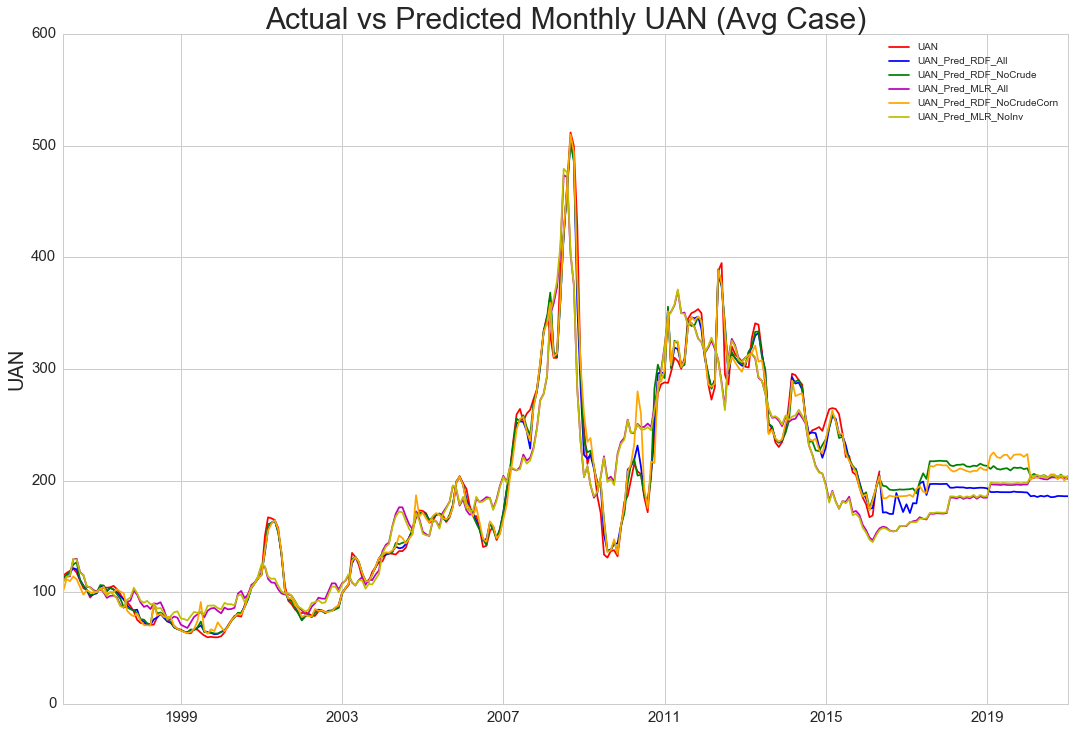

In [61]:
#looking at actual vs predicted monthly
import matplotlib.pyplot as plt
%matplotlib inline

x = (df['Monthly_Date'])
#x_pred = (df['Monthly_Date'][243:])
y1 = (df['UAN'])
y2 = (df['UAN_Pred_RDF_All'])
y3 = (df['UAN_Pred_RDF_NoCrude'])
y4 = (df['UAN_Pred_MLR_All'])
y5 = (df['UAN_Pred_RDF_NoCrudeCorn'])
y6 = (df['UAN_Pred_MLR_NoInv'])

fig = plt.figure(figsize=(18,12))
ax = fig.add_subplot(111)
ax.plot(x,y1,'r')
ax.plot(x,y2,'b')
ax.plot(x,y3,'g')
ax.plot(x,y4,'m')
ax.plot(x,y5,'orange')
ax.plot(x,y6,'y')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)
ax.set_title('Actual vs Predicted Monthly UAN (Avg Case)', size=(30))
ax.tick_params(axis='x',which='major',labelsize=15)
ax.tick_params(axis='y',which='major',labelsize=15)
ax.set_ylabel('UAN',size=(20))

plt.show()

# Best Case
[Top](#table-of-contents)
#### 		      crude	     corn	      gas	   coal
#### Q2-16	  63.00 	 395.00 	 2.75 	 55.00 
#### Q3-16	  70.00 	 390.00 	 3.00 	 57.00 
#### Q4-16	  72.00 	 410.00 	 3.00 	 57.00 
#### Q1-17	  72.00 	 395.00 	 3.40 	 62.00 
#### Q2-17	  80.00 	 390.00 	 3.30 	 62.00 
#### ALL-17	  82.00 	 410.00 	 3.53 	 75.00 
#### ALL-18	  90.00 	 475.00 	 6.00 	 77.00 
#### ALL-19	  110.00 	 400.00 	 6.00 	 85.00 
#### ALL-20	  150.00 	 550.00 	 6.00 	 67.00 


In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.ensemble import RandomForestRegressor
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
data = pd.read_csv("C:/Users/msteinme/Documents/ureaaprilbestrandomness.csv")
df_96on = data[['Date','Crude','Corn','My_Coal','Gas','UAN_Inventory','UAN']][0:1062]
df_96on.tail()
#1/5/1996 - 4/30/2016

,Date,Crude,Corn,My_Coal,Gas,UAN_Inventory,UAN
1057,4/8/2016,40.99,365.00,49.85,2.08,998987.8733,209.92
1058,4/15/2016,41.71,382.00,50.85,2.00,998987.8733,205.12
1059,4/22/2016,44.54,375.50,51.00,2.27,998987.8733,205.12
1060,4/29/2016,46.69,391.75,50.75,2.32,998987.8733,212.16
1061,4/30/2016,46.69,391.75,50.75,2.32,998987.8733,212.16


In [63]:
from datetime import datetime
df_96on['Date'] = pd.to_datetime(df_96on['Date'])
date = df_96on['Date']
df_96on.dtypes

Date             datetime64[ns]
Crude                   float64
Corn                    float64
My_Coal                 float64
Gas                     float64
UAN_Inventory           float64
UAN                     float64
dtype: object

In [64]:
df_96on.describe()

,Crude,Corn,My_Coal,Gas,UAN_Inventory,UAN
count,1062.000000,1062.000000,1062.000000,1062.000000,1062.000000,1062.000000
mean,54.785461,361.748588,58.269360,4.598559,1005441.983512,183.703955
std,31.243572,156.648138,33.567719,2.364318,490773.222051,96.550610
min,11.260000,182.500000,20.900000,1.660000,297701.149400,58.000000
25%,26.417500,231.062500,27.430000,2.760000,650601.513700,101.200000
50%,49.170000,325.500000,51.840000,4.025000,850475.860200,165.200000
75%,81.967500,424.437500,79.675000,5.825000,1245263.158000,257.680000
max,145.860000,809.250000,192.500000,14.430000,2588392.857000,514.880000


### 3 RDF models will be used, parameters found above in exploratory analysis for best
### all variables, no crude, no crude or corn
[Top](#table-of-contents)

In [65]:
#rdf using all
X = df_96on[['Crude','Corn','My_Coal','Gas','UAN_Inventory']].values
y = df_96on['UAN'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)
forest=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=175, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest.fit(X_train, y_train)
y_train_pred= forest.predict(X_train)
y_test_pred= forest.predict(X_test)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_test,y_test_pred)))
print(forest.feature_importances_)

MSE train: 62.485, test: 425.063
R^2 train: 0.993, test: 0.954
[ 0.40318433  0.16337649  0.37424281  0.03331049  0.02588587]


In [66]:
#comparing the different models
urea_predicted3 = forest.predict(X)
urea_predicted3 = pd.DataFrame(urea_predicted3)
df_96on['UAN_Pred_RDF_All'] = urea_predicted3
rdf_error3 = (abs(df_96on['UAN_Pred_RDF_All'] - df_96on['UAN'])/df_96on['UAN'])*100
df_96on['RDF_All_Error'] = rdf_error3

mlrtop3_predicted = -6.7111 + (df_96on['Crude']*0.6876) + (df_96on['Corn']*0.1929) + (df_96on['My_Coal']*1.1011) + (df_96on['Gas']*5.4360) - (df_96on['UAN_Inventory']*0.000006163) 
df_96on['UAN_Pred_MLR_All'] = mlrtop3_predicted
mlrtop3_error = (abs(df_96on['UAN_Pred_MLR_All'] - df_96on['UAN'])/df_96on['UAN'])*100
df_96on['MLR_Error_All'] = mlrtop3_error

mlrtop4_predicted = -17.3488 + (df_96on['Crude']*0.7355) + (df_96on['Corn']*0.1943) + (df_96on['My_Coal']*1.0921) + (df_96on['Gas']*5.8392) 
df_96on['UAN_Pred_MLR_NoInv'] = mlrtop4_predicted
mlrtop4_error = (abs(df_96on['UAN_Pred_MLR_NoInv'] - df_96on['UAN'])/df_96on['UAN'])*100
df_96on['MLR_Error_NoInv'] = mlrtop4_error

print("Average RDF ALL error is: %.3f" % (rdf_error3.mean())) 
print("Average MLR ALL error is: %.3f" % (mlrtop3_error.mean()))
print("Average MLR no UAN_Inventory error is: %.3f" % (mlrtop4_error.mean()))
df_96on

Average RDF ALL error is: 3.324
Average MLR ALL error is: 14.928
Average MLR no UAN_Inventory error is: 15.299


,Date,Crude,Corn,My_Coal,Gas,UAN_Inventory,UAN,UAN_Pred_RDF_All,RDF_All_Error,UAN_Pred_MLR_All,MLR_Error_All,UAN_Pred_MLR_NoInv,MLR_Error_NoInv
0,1996-01-05,19.65,369.75,25.36,2.42,1271052.6320,114.00,113.583434,0.365409,111.370534,2.306549,110.772720,2.830947
1,1996-01-12,17.98,366.25,25.27,2.22,1271052.6320,114.96,113.319592,1.426938,108.360793,5.740438,107.598256,6.403744
2,1996-01-19,18.25,365.00,29.07,1.96,1271052.6320,114.96,113.823227,0.988842,111.076140,3.378445,110.185754,4.152963
3,1996-01-26,17.36,360.25,29.20,1.95,1271052.6320,115.60,112.246680,2.900796,109.636684,5.158578,108.691815,5.975939
4,1996-02-02,17.38,370.50,32.11,2.08,1360394.7370,117.20,115.682458,1.294831,114.987926,1.887435,114.635207,2.188390
5,1996-02-09,17.38,367.25,28.67,2.24,1360394.7370,117.20,113.430827,3.216018,111.442977,4.912135,111.181180,5.135512
6,1996-02-16,18.40,382.75,28.17,2.17,1360394.7370,117.20,117.515305,0.269032,114.203209,2.556989,113.988246,2.740404
7,1996-02-23,18.45,383.50,28.83,2.26,1360394.7370,117.20,117.436676,0.201942,115.598230,1.366698,115.417060,1.521280
8,1996-03-01,18.62,386.75,27.86,2.06,1523421.0530,117.20,117.919070,0.613541,113.182049,3.428286,113.946393,2.776115
9,1996-03-08,18.87,388.50,26.51,2.05,1523421.0530,117.20,116.315322,0.754845,112.150679,4.308294,112.937566,3.636889


In [67]:
#no crude since highly correlated to coal
X = df_96on[['Corn','My_Coal','Gas','UAN_Inventory']].values
y = df_96on['UAN'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)
forest=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=150, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest.fit(X_train, y_train)
y_train_pred= forest.predict(X_train)
y_test_pred= forest.predict(X_test)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_test,y_test_pred)))
print(forest.feature_importances_)

MSE train: 65.027, test: 440.747
R^2 train: 0.993, test: 0.952
[ 0.29506212  0.63078472  0.04025313  0.03390003]


In [68]:
#adding 2nd to last model
urea_predicted4 = forest.predict(X)
urea_predicted4 = pd.DataFrame(urea_predicted4)
df_96on['UAN_Pred_RDF_NoCrude'] = urea_predicted4
rdf_error4 = (abs(df_96on['UAN_Pred_RDF_NoCrude'] - df_96on['UAN'])/df_96on['UAN'])*100
df_96on['RDF_Error_NoCrude'] = rdf_error4

print("Average RDF no crude error is: %.3f" % (rdf_error4.mean()))
df_96on

Average RDF no crude error is: 3.572


,Date,Crude,Corn,My_Coal,Gas,UAN_Inventory,UAN,UAN_Pred_RDF_All,RDF_All_Error,UAN_Pred_MLR_All,MLR_Error_All,UAN_Pred_MLR_NoInv,MLR_Error_NoInv,UAN_Pred_RDF_NoCrude,RDF_Error_NoCrude
0,1996-01-05,19.65,369.75,25.36,2.42,1271052.6320,114.00,113.583434,0.365409,111.370534,2.306549,110.772720,2.830947,113.643403,0.312804
1,1996-01-12,17.98,366.25,25.27,2.22,1271052.6320,114.96,113.319592,1.426938,108.360793,5.740438,107.598256,6.403744,109.989620,4.323573
2,1996-01-19,18.25,365.00,29.07,1.96,1271052.6320,114.96,113.823227,0.988842,111.076140,3.378445,110.185754,4.152963,110.394930,3.971008
3,1996-01-26,17.36,360.25,29.20,1.95,1271052.6320,115.60,112.246680,2.900796,109.636684,5.158578,108.691815,5.975939,110.288263,4.594928
4,1996-02-02,17.38,370.50,32.11,2.08,1360394.7370,117.20,115.682458,1.294831,114.987926,1.887435,114.635207,2.188390,116.725968,0.404464
5,1996-02-09,17.38,367.25,28.67,2.24,1360394.7370,117.20,113.430827,3.216018,111.442977,4.912135,111.181180,5.135512,111.481201,4.879521
6,1996-02-16,18.40,382.75,28.17,2.17,1360394.7370,117.20,117.515305,0.269032,114.203209,2.556989,113.988246,2.740404,117.553397,0.301533
7,1996-02-23,18.45,383.50,28.83,2.26,1360394.7370,117.20,117.436676,0.201942,115.598230,1.366698,115.417060,1.521280,117.461130,0.222807
8,1996-03-01,18.62,386.75,27.86,2.06,1523421.0530,117.20,117.919070,0.613541,113.182049,3.428286,113.946393,2.776115,118.057981,0.732066
9,1996-03-08,18.87,388.50,26.51,2.05,1523421.0530,117.20,116.315322,0.754845,112.150679,4.308294,112.937566,3.636889,116.523708,0.577041


In [69]:
#best, since no x variables correlated to each other
X = df_96on[['My_Coal','Gas','UAN_Inventory']].values
y = df_96on['UAN'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)
forest=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=200, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest.fit(X_train, y_train)
y_train_pred= forest.predict(X_train)
y_test_pred= forest.predict(X_test)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_test,y_test_pred)))
print(forest.feature_importances_)

MSE train: 71.053, test: 581.085
R^2 train: 0.992, test: 0.937
[ 0.87858213  0.06373589  0.05768198]


In [70]:
#last added model
urea_predicted6 = forest.predict(X)
urea_predicted6 = pd.DataFrame(urea_predicted6)
df_96on['UAN_Pred_RDF_NoCrudeCorn'] = urea_predicted6
rdf_error6 = (abs(df_96on['UAN_Pred_RDF_NoCrudeCorn'] - df_96on['UAN'])/df_96on['UAN'])*100
df_96on['RDF_Error_NoCrudeCorn'] = rdf_error6

print("Average RDF no crude or corn error is: %.3f" % (rdf_error6.mean()))
df_96on

Average RDF no crude or corn error is: 4.456


,Date,Crude,Corn,My_Coal,Gas,UAN_Inventory,UAN,UAN_Pred_RDF_All,RDF_All_Error,UAN_Pred_MLR_All,MLR_Error_All,UAN_Pred_MLR_NoInv,MLR_Error_NoInv,UAN_Pred_RDF_NoCrude,RDF_Error_NoCrude,UAN_Pred_RDF_NoCrudeCorn,RDF_Error_NoCrudeCorn
0,1996-01-05,19.65,369.75,25.36,2.42,1271052.6320,114.00,113.583434,0.365409,111.370534,2.306549,110.772720,2.830947,113.643403,0.312804,106.840391,6.280358
1,1996-01-12,17.98,366.25,25.27,2.22,1271052.6320,114.96,113.319592,1.426938,108.360793,5.740438,107.598256,6.403744,109.989620,4.323573,106.919732,6.993970
2,1996-01-19,18.25,365.00,29.07,1.96,1271052.6320,114.96,113.823227,0.988842,111.076140,3.378445,110.185754,4.152963,110.394930,3.971008,94.372681,17.908246
3,1996-01-26,17.36,360.25,29.20,1.95,1271052.6320,115.60,112.246680,2.900796,109.636684,5.158578,108.691815,5.975939,110.288263,4.594928,93.947747,18.730322
4,1996-02-02,17.38,370.50,32.11,2.08,1360394.7370,117.20,115.682458,1.294831,114.987926,1.887435,114.635207,2.188390,116.725968,0.404464,111.719047,4.676581
5,1996-02-09,17.38,367.25,28.67,2.24,1360394.7370,117.20,113.430827,3.216018,111.442977,4.912135,111.181180,5.135512,111.481201,4.879521,112.969999,3.609216
6,1996-02-16,18.40,382.75,28.17,2.17,1360394.7370,117.20,117.515305,0.269032,114.203209,2.556989,113.988246,2.740404,117.553397,0.301533,107.935055,7.905243
7,1996-02-23,18.45,383.50,28.83,2.26,1360394.7370,117.20,117.436676,0.201942,115.598230,1.366698,115.417060,1.521280,117.461130,0.222807,113.712920,2.975324
8,1996-03-01,18.62,386.75,27.86,2.06,1523421.0530,117.20,117.919070,0.613541,113.182049,3.428286,113.946393,2.776115,118.057981,0.732066,109.611226,6.475063
9,1996-03-08,18.87,388.50,26.51,2.05,1523421.0530,117.20,116.315322,0.754845,112.150679,4.308294,112.937566,3.636889,116.523708,0.577041,107.678381,8.124249


In [71]:
#predictions section 5/1/2016 - 12/31/2020
newpred2 = data[['Date','Crude','Corn','My_Coal','Gas','UAN_Inventory']][1062:2768]
newpred = data [['Crude','Corn','My_Coal','Gas','Urea_Inventory']][1062:2768]
newpred3 = data[['Corn','My_Coal','Gas','UAN_Inventory']][1062:2768]
newpred4 = data[['My_Coal','Gas','UAN_Inventory']][1062:2768]

In [72]:
#new predictions
X = df_96on[['Crude','Corn','My_Coal','Gas','UAN_Inventory']].values 
y = df_96on['UAN'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)
forest=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=175, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest.fit(X_train, y_train)
y_train_pred= forest.predict(X_train)
y_test_pred= forest.predict(X_test)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_test,y_test_pred)))
print(forest.feature_importances_)

newpred2 = np.array(newpred2)
newpred2 = pd.DataFrame(newpred2)
newpred2.columns = ['Date','Crude','Corn','My_Coal','Gas','UAN_Inventory']
newpred_predicted = forest.predict(newpred)
df_new_pred = pd.DataFrame(newpred_predicted)
newpred2['UAN_Pred_RDF_All'] = df_new_pred

newpred2['Date'] = pd.to_datetime(newpred2['Date'])
newpred2

MSE train: 58.118, test: 416.942
R^2 train: 0.994, test: 0.955
[ 0.38087502  0.14083925  0.42054862  0.03131565  0.02642145]


,Date,Crude,Corn,My_Coal,Gas,UAN_Inventory,UAN_Pred_RDF_All
0,2016-05-01,46.69,391.75,50.75,2.32,1.04439e+06,183.458742
1,2016-05-02,60.54,394.98,52.46,2.4,1.04439e+06,183.476705
2,2016-05-03,57.92,391.81,50.93,2.38,1.04439e+06,183.316662
3,2016-05-04,62.15,392.96,52.9,2.56,1.04439e+06,182.162897
4,2016-05-05,53.32,394.69,52.83,2.44,1.04439e+06,183.445179
5,2016-05-06,53.32,391.86,53.94,2.42,1.04439e+06,191.651168
6,2016-05-07,61.95,392.7,52.78,2.34,1.04439e+06,182.580827
7,2016-05-08,56.28,393.09,54.43,2.42,1.04439e+06,192.528128
8,2016-05-09,61.81,392.51,53.91,2.49,1.04439e+06,187.460039
9,2016-05-10,56.36,393.41,53.28,2.69,1.04439e+06,196.391930


In [73]:
#other predictions
X = df_96on[['Corn','My_Coal','Gas','UAN_Inventory']].values 
y = df_96on['UAN'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)
forest=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=150, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest.fit(X_train, y_train)
y_train_pred= forest.predict(X_train)
y_test_pred= forest.predict(X_test)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_test,y_test_pred)))
print(forest.feature_importances_)
newpred_predicted2 = forest.predict(newpred3)
df_new_pred2 = pd.DataFrame(newpred_predicted2)
newpred2['UAN_Pred_RDF_NoCrude'] = df_new_pred2

mlrtop3_predicted2 = -6.7111 + (newpred2['Crude']*0.6876) + (newpred2['Corn']*0.1929) + (newpred2['My_Coal']*1.1011) + (newpred2['Gas']*5.4360) - (newpred2['UAN_Inventory']*0.000006163) 
newpred2['UAN_Pred_MLR_All'] = mlrtop3_predicted2

mlrtop4_predicted2 = -17.3488 + (newpred2['Crude']*0.7355) + (newpred2['Corn']*0.1943) + (newpred2['My_Coal']*1.0921) + (newpred2['Gas']*5.8392) 
newpred2['UAN_Pred_MLR_NoInv'] = mlrtop4_predicted2

newpred2['Date'] = pd.to_datetime(newpred2['Date'])
newpred2

MSE train: 64.111, test: 445.924
R^2 train: 0.993, test: 0.952
[ 0.29847494  0.62824561  0.0397742   0.03350525]


,Date,Crude,Corn,My_Coal,Gas,UAN_Inventory,UAN_Pred_RDF_All,UAN_Pred_RDF_NoCrude,UAN_Pred_MLR_All,UAN_Pred_MLR_NoInv
0,2016-05-01,46.69,391.75,50.75,2.32,1.04439e+06,183.458742,208.635774,163.017,162.08
1,2016-05-02,60.54,394.98,52.46,2.4,1.04439e+06,183.476705,205.743411,175.481,175.229
2,2016-05-03,57.92,391.81,50.93,2.38,1.04439e+06,183.316662,206.648807,171.275,170.898
3,2016-05-04,62.15,392.96,52.9,2.56,1.04439e+06,182.162897,205.654341,177.553,177.435
4,2016-05-05,53.32,394.69,52.83,2.44,1.04439e+06,183.445179,204.671418,171.086,170.5
5,2016-05-06,53.32,391.86,53.94,2.42,1.04439e+06,191.651168,235.648170,171.653,171.045
6,2016-05-07,61.95,392.7,52.78,2.34,1.04439e+06,182.580827,204.109437,176.037,175.822
7,2016-05-08,56.28,393.09,54.43,2.42,1.04439e+06,192.528128,239.751060,174.466,173.996
8,2016-05-09,61.81,392.51,53.91,2.49,1.04439e+06,187.460039,232.555502,177.964,177.792
9,2016-05-10,56.36,393.41,53.28,2.69,1.04439e+06,196.391930,213.526101,174.784,174.438


In [74]:
#last added prediction
X = df_96on[['My_Coal','Gas','UAN_Inventory']].values 
y = df_96on['UAN'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)
forest=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=200, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest.fit(X_train, y_train)
y_train_pred= forest.predict(X_train)
y_test_pred= forest.predict(X_test)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_test,y_test_pred)))
print(forest.feature_importances_)
newpred_predicted3 = forest.predict(newpred4)
df_new_pred3 = pd.DataFrame(newpred_predicted3)
newpred2['UAN_Pred_RDF_NoCrudeCorn'] = df_new_pred3
newpred2

MSE train: 71.150, test: 559.756
R^2 train: 0.992, test: 0.940
[ 0.87640788  0.06409573  0.05949639]


,Date,Crude,Corn,My_Coal,Gas,UAN_Inventory,UAN_Pred_RDF_All,UAN_Pred_RDF_NoCrude,UAN_Pred_MLR_All,UAN_Pred_MLR_NoInv,UAN_Pred_RDF_NoCrudeCorn
0,2016-05-01,46.69,391.75,50.75,2.32,1.04439e+06,183.458742,208.635774,163.017,162.08,190.094317
1,2016-05-02,60.54,394.98,52.46,2.4,1.04439e+06,183.476705,205.743411,175.481,175.229,185.385785
2,2016-05-03,57.92,391.81,50.93,2.38,1.04439e+06,183.316662,206.648807,171.275,170.898,189.239517
3,2016-05-04,62.15,392.96,52.9,2.56,1.04439e+06,182.162897,205.654341,177.553,177.435,187.190447
4,2016-05-05,53.32,394.69,52.83,2.44,1.04439e+06,183.445179,204.671418,171.086,170.5,185.550319
5,2016-05-06,53.32,391.86,53.94,2.42,1.04439e+06,191.651168,235.648170,171.653,171.045,235.462269
6,2016-05-07,61.95,392.7,52.78,2.34,1.04439e+06,182.580827,204.109437,176.037,175.822,187.778735
7,2016-05-08,56.28,393.09,54.43,2.42,1.04439e+06,192.528128,239.751060,174.466,173.996,240.684802
8,2016-05-09,61.81,392.51,53.91,2.49,1.04439e+06,187.460039,232.555502,177.964,177.792,229.731607
9,2016-05-10,56.36,393.41,53.28,2.69,1.04439e+06,196.391930,213.526101,174.784,174.438,188.772877


In [75]:
frames = [df_96on,newpred2]
combined = pd.concat(frames)
combined

,Corn,Crude,Date,Gas,MLR_Error_All,MLR_Error_NoInv,My_Coal,RDF_All_Error,RDF_Error_NoCrude,RDF_Error_NoCrudeCorn,UAN,UAN_Inventory,UAN_Pred_MLR_All,UAN_Pred_MLR_NoInv,UAN_Pred_RDF_All,UAN_Pred_RDF_NoCrude,UAN_Pred_RDF_NoCrudeCorn
0,369.75,19.65,1996-01-05,2.42,2.306549,2.830947,25.36,0.365409,0.312804,6.280358,114.00,1.27105e+06,111.371,110.773,113.583434,113.643403,106.840391
1,366.25,17.98,1996-01-12,2.22,5.740438,6.403744,25.27,1.426938,4.323573,6.993970,114.96,1.27105e+06,108.361,107.598,113.319592,109.989620,106.919732
2,365,18.25,1996-01-19,1.96,3.378445,4.152963,29.07,0.988842,3.971008,17.908246,114.96,1.27105e+06,111.076,110.186,113.823227,110.394930,94.372681
3,360.25,17.36,1996-01-26,1.95,5.158578,5.975939,29.2,2.900796,4.594928,18.730322,115.60,1.27105e+06,109.637,108.692,112.246680,110.288263,93.947747
4,370.5,17.38,1996-02-02,2.08,1.887435,2.188390,32.11,1.294831,0.404464,4.676581,117.20,1.36039e+06,114.988,114.635,115.682458,116.725968,111.719047
5,367.25,17.38,1996-02-09,2.24,4.912135,5.135512,28.67,3.216018,4.879521,3.609216,117.20,1.36039e+06,111.443,111.181,113.430827,111.481201,112.969999
6,382.75,18.4,1996-02-16,2.17,2.556989,2.740404,28.17,0.269032,0.301533,7.905243,117.20,1.36039e+06,114.203,113.988,117.515305,117.553397,107.935055
7,383.5,18.45,1996-02-23,2.26,1.366698,1.521280,28.83,0.201942,0.222807,2.975324,117.20,1.36039e+06,115.598,115.417,117.436676,117.461130,113.712920
8,386.75,18.62,1996-03-01,2.06,3.428286,2.776115,27.86,0.613541,0.732066,6.475063,117.20,1.52342e+06,113.182,113.946,117.919070,118.057981,109.611226
9,388.5,18.87,1996-03-08,2.05,4.308294,3.636889,26.51,0.754845,0.577041,8.124249,117.20,1.52342e+06,112.151,112.938,116.315322,116.523708,107.678381


In [76]:
combined = combined[['Date','Crude','Corn','My_Coal','Gas','UAN_Inventory','UAN','UAN_Pred_MLR_All','UAN_Pred_MLR_NoInv','UAN_Pred_RDF_All','UAN_Pred_RDF_NoCrude','UAN_Pred_RDF_NoCrudeCorn']]
combined = np.array(combined)
combined = pd.DataFrame(combined)
combined.columns = ['Date','Crude','Corn','My_Coal','Gas','UAN_Inventory','UAN','UAN_Pred_MLR_All','UAN_Pred_MLR_NoInv','UAN_Pred_RDF_All','UAN_Pred_RDF_NoCrude','UAN_Pred_RDF_NoCrudeCorn']
combined

,Date,Crude,Corn,My_Coal,Gas,UAN_Inventory,UAN,UAN_Pred_MLR_All,UAN_Pred_MLR_NoInv,UAN_Pred_RDF_All,UAN_Pred_RDF_NoCrude,UAN_Pred_RDF_NoCrudeCorn
0,1996-01-05 00:00:00,19.65,369.75,25.36,2.42,1.27105e+06,114,111.371,110.773,113.583,113.643,106.84
1,1996-01-12 00:00:00,17.98,366.25,25.27,2.22,1.27105e+06,114.96,108.361,107.598,113.32,109.99,106.92
2,1996-01-19 00:00:00,18.25,365,29.07,1.96,1.27105e+06,114.96,111.076,110.186,113.823,110.395,94.3727
3,1996-01-26 00:00:00,17.36,360.25,29.2,1.95,1.27105e+06,115.6,109.637,108.692,112.247,110.288,93.9477
4,1996-02-02 00:00:00,17.38,370.5,32.11,2.08,1.36039e+06,117.2,114.988,114.635,115.682,116.726,111.719
5,1996-02-09 00:00:00,17.38,367.25,28.67,2.24,1.36039e+06,117.2,111.443,111.181,113.431,111.481,112.97
6,1996-02-16 00:00:00,18.4,382.75,28.17,2.17,1.36039e+06,117.2,114.203,113.988,117.515,117.553,107.935
7,1996-02-23 00:00:00,18.45,383.5,28.83,2.26,1.36039e+06,117.2,115.598,115.417,117.437,117.461,113.713
8,1996-03-01 00:00:00,18.62,386.75,27.86,2.06,1.52342e+06,117.2,113.182,113.946,117.919,118.058,109.611
9,1996-03-08 00:00:00,18.87,388.5,26.51,2.05,1.52342e+06,117.2,112.151,112.938,116.315,116.524,107.678


In [77]:
combined.to_csv("C:/Users/msteinme/Documents/uanaprilbestresultsrandomness.csv")

In [78]:
#split into months
cols = ['Date','Crude','Corn','My_Coal','Gas','UAN_Inventory','UAN','UAN_Pred_MLR_All','UAN_Pred_MLR_NoInv','UAN_Pred_RDF_All','UAN_Pred_RDF_NoCrude','UAN_Pred_RDF_NoCrudeCorn']
jan_96 = combined[cols][0:4]
feb_96 = combined[cols][4:8]
mar_96 = combined[cols][8:13]
apr_96 = combined[cols][13:17]
may_96 = combined[cols][17:22]
jun_96 = combined[cols][22:26]
jul_96 = combined[cols][26:30]
aug_96 = combined[cols][30:35]
sep_96 = combined[cols][35:39]
oct_96 = combined[cols][39:43]
nov_96 = combined[cols][43:48]
dec_96 = combined[cols][48:52]
jan_97 = combined[cols][52:57]
feb_97 = combined[cols][57:61]
mar_97 = combined[cols][61:65]
apr_97 = combined[cols][65:69]
may_97 = combined[cols][69:74]
jun_97 = combined[cols][74:78]
jul_97 = combined[cols][78:82]
aug_97 = combined[cols][82:87]
sep_97 = combined[cols][87:91]
oct_97 = combined[cols][91:96]
nov_97 = combined[cols][96:100]
dec_97 = combined[cols][100:104]
jan_98 = combined[cols][104:109]
feb_98 = combined[cols][109:113]
mar_98 = combined[cols][113:117]
apr_98 = combined[cols][117:121]
may_98 = combined[cols][121:126]
jun_98 = combined[cols][126:130]
jul_98 = combined[cols][130:135]
aug_98 = combined[cols][135:139]
sep_98 = combined[cols][139:143]
oct_98 = combined[cols][143:148]
nov_98 = combined[cols][148:152]
dec_98 = combined[cols][152:156]
jan_99 = combined[cols][156:161]
feb_99 = combined[cols][161:165]
mar_99 = combined[cols][165:169]
apr_99 = combined[cols][169:174]
may_99 = combined[cols][174:178]
jun_99 = combined[cols][178:182]
jul_99 = combined[cols][182:187]
aug_99 = combined[cols][187:191]
sep_99 = combined[cols][191:195]
oct_99 = combined[cols][195:200]
nov_99 = combined[cols][200:204]
dec_99 = combined[cols][204:209]
jan_00 = combined[cols][209:213]
feb_00 = combined[cols][213:217]
mar_00 = combined[cols][217:222]
apr_00 = combined[cols][222:226]
may_00 = combined[cols][226:230]
jun_00 = combined[cols][230:235]
jul_00 = combined[cols][235:239]
aug_00 = combined[cols][239:243]
sep_00 = combined[cols][243:248]
oct_00 = combined[cols][248:252]
nov_00 = combined[cols][252:256]
dec_00 = combined[cols][256:261]
jan_01 = combined[cols][261:265]
feb_01 = combined[cols][265:269]
mar_01 = combined[cols][269:274]
apr_01 = combined[cols][274:278]
may_01 = combined[cols][278:282]
jun_01 = combined[cols][282:287]
jul_01 = combined[cols][287:291]
aug_01 = combined[cols][291:296]
sep_01 = combined[cols][296:300]
oct_01 = combined[cols][300:304]
nov_01 = combined[cols][304:309]
dec_01 = combined[cols][309:313]
jan_02 = combined[cols][313:317]
feb_02 = combined[cols][317:321]
mar_02 = combined[cols][321:326]
apr_02 = combined[cols][326:330]
may_02 = combined[cols][330:335]
jun_02 = combined[cols][335:339]
jul_02 = combined[cols][339:343]
aug_02 = combined[cols][343:348]
sep_02 = combined[cols][348:352]
oct_02 = combined[cols][352:356]
nov_02 = combined[cols][356:361]
dec_02 = combined[cols][361:365]
jan_03 = combined[cols][365:370]
feb_03 = combined[cols][370:374]
mar_03 = combined[cols][374:378]
apr_03 = combined[cols][378:382]
may_03 = combined[cols][382:387]
jun_03 = combined[cols][387:391]
jul_03 = combined[cols][391:395]
aug_03 = combined[cols][395:400]
sep_03 = combined[cols][400:404]
oct_03 = combined[cols][404:409]
nov_03 = combined[cols][409:413]
dec_03 = combined[cols][413:417]
jan_04 = combined[cols][417:422]
feb_04 = combined[cols][422:426]
mar_04 = combined[cols][426:430]
apr_04 = combined[cols][430:435]
may_04 = combined[cols][435:439]
jun_04 = combined[cols][439:443]
jul_04 = combined[cols][443:448]
aug_04 = combined[cols][448:452]
sep_04 = combined[cols][452:456]
oct_04 = combined[cols][456:461]
nov_04 = combined[cols][461:465]
dec_04 = combined[cols][465:470]
jan_05 = combined[cols][470:474]
feb_05 = combined[cols][474:478]
mar_05 = combined[cols][478:482]
apr_05 = combined[cols][482:487]
may_05 = combined[cols][487:491]
jun_05 = combined[cols][491:495]
jul_05 = combined[cols][495:500]
aug_05 = combined[cols][500:504]
sep_05 = combined[cols][504:509]
oct_05 = combined[cols][509:513]
nov_05 = combined[cols][513:517]
dec_05 = combined[cols][517:522]
jan_06 = combined[cols][522:526]
feb_06 = combined[cols][526:530]
mar_06 = combined[cols][530:535]
apr_06 = combined[cols][535:539]
may_06 = combined[cols][539:543]
jun_06 = combined[cols][543:548]
jul_06 = combined[cols][548:552]
aug_06 = combined[cols][552:556]
sep_06 = combined[cols][556:561]
oct_06 = combined[cols][561:565]
nov_06 = combined[cols][565:569]
dec_06 = combined[cols][569:574]
jan_07 = combined[cols][574:578]
feb_07 = combined[cols][578:582]
mar_07 = combined[cols][582:587]
apr_07 = combined[cols][587:591]
may_07 = combined[cols][591:595]
jun_07 = combined[cols][595:600]
jul_07 = combined[cols][600:604]
aug_07 = combined[cols][604:609]
sep_07 = combined[cols][609:613]
oct_07 = combined[cols][613:617]
nov_07 = combined[cols][617:622]
dec_07 = combined[cols][622:626]
jan_08 = combined[cols][626:630]
feb_08 = combined[cols][630:635]
mar_08 = combined[cols][635:639]
apr_08 = combined[cols][639:643]
may_08 = combined[cols][643:648]
jun_08 = combined[cols][648:652]
jul_08 = combined[cols][652:656]
aug_08 = combined[cols][656:661]
sep_08 = combined[cols][661:665]
oct_08 = combined[cols][665:670]
nov_08 = combined[cols][670:674]
dec_08 = combined[cols][674:678]
jan_09 = combined[cols][678:683]
feb_09 = combined[cols][683:687]
mar_09 = combined[cols][687:691]
apr_09 = combined[cols][691:695]
may_09 = combined[cols][695:700]
jun_09 = combined[cols][700:704]
jul_09 = combined[cols][704:709]
aug_09 = combined[cols][709:713]
sep_09 = combined[cols][713:717]
oct_09 = combined[cols][717:722]
nov_09 = combined[cols][722:726]
dec_09 = combined[cols][726:730]
jan_10 = combined[cols][730:735]
feb_10 = combined[cols][735:739]
mar_10 = combined[cols][739:743]
apr_10 = combined[cols][743:748]
may_10 = combined[cols][748:752]
jun_10 = combined[cols][752:756]
jul_10 = combined[cols][756:761]
aug_10 = combined[cols][761:765]
sep_10 = combined[cols][765:769]
oct_10 = combined[cols][769:774]
nov_10 = combined[cols][774:778]
dec_10 = combined[cols][778:783]
jan_11 = combined[cols][783:787]
feb_11 = combined[cols][787:791]
mar_11 = combined[cols][791:795]
apr_11 = combined[cols][795:800]
may_11 = combined[cols][800:804]
jun_11 = combined[cols][804:808]
jul_11 = combined[cols][808:813]
aug_11 = combined[cols][813:817]
sep_11 = combined[cols][817:822]
oct_11 = combined[cols][822:826]
nov_11 = combined[cols][826:830]
dec_11 = combined[cols][830:835]
jan_12 = combined[cols][835:839]
feb_12 = combined[cols][839:843]
mar_12 = combined[cols][843:848]
apr_12 = combined[cols][848:852]
may_12 = combined[cols][852:856]
jun_12 = combined[cols][856:861]
jul_12 = combined[cols][861:865]
aug_12 = combined[cols][865:870]
sep_12 = combined[cols][870:874]
oct_12 = combined[cols][874:878]
nov_12 = combined[cols][878:883]
dec_12 = combined[cols][883:887]
jan_13 = combined[cols][887:891]
feb_13 = combined[cols][891:895]
mar_13 = combined[cols][895:900]
apr_13 = combined[cols][900:904]
may_13 = combined[cols][904:909]
jun_13 = combined[cols][909:913]
jul_13 = combined[cols][913:917]
aug_13 = combined[cols][917:922]
sep_13 = combined[cols][922:926]
oct_13 = combined[cols][926:930]
nov_13 = combined[cols][930:935]
dec_13 = combined[cols][935:939]
jan_14 = combined[cols][939:944]
feb_14 = combined[cols][944:948]
mar_14 = combined[cols][948:952]
apr_14 = combined[cols][952:956]
may_14 = combined[cols][956:961]
jun_14 = combined[cols][961:965]
jul_14 = combined[cols][965:969]
aug_14 = combined[cols][969:974]
sep_14 = combined[cols][974:978]
oct_14 = combined[cols][978:983]
nov_14 = combined[cols][983:987]
dec_14 = combined[cols][987:991]
jan_15 = combined[cols][991:996]
feb_15 = combined[cols][996:1000]
mar_15 = combined[cols][1000:1004]
apr_15 = combined[cols][1004:1008]
may_15 = combined[cols][1008:1013]
jun_15 = combined[cols][1013:1017]
jul_15 = combined[cols][1017:1022]
aug_15 = combined[cols][1022:1026]
sep_15 = combined[cols][1026:1030]
oct_15 = combined[cols][1030:1035]
nov_15 = combined[cols][1035:1039]
dec_15 = combined[cols][1039:1043]
jan_16 = combined[cols][1043:1048]
feb_16 = combined[cols][1048:1052]
mar_16 = combined[cols][1052:1056]
apr_16 = combined[cols][1056:1062]

#predicted part
may_16 = combined[cols][1062:1093]
jun_16 = combined[cols][1093:1123]
jul_16 = combined[cols][1123:1154]
aug_16 = combined[cols][1154:1185]
sep_16 = combined[cols][1185:1215]
oct_16 = combined[cols][1215:1246]
nov_16 = combined[cols][1246:1276]
dec_16 = combined[cols][1276:1307]
jan_17 = combined[cols][1307:1338]
feb_17 = combined[cols][1338:1366]
mar_17 = combined[cols][1366:1397]
apr_17 = combined[cols][1397:1427]
may_17 = combined[cols][1427:1458]
jun_17 = combined[cols][1458:1488]
jul_17 = combined[cols][1488:1519]
aug_17 = combined[cols][1519:1550]
sep_17 = combined[cols][1550:1580]
oct_17 = combined[cols][1580:1611]
nov_17 = combined[cols][1611:1641]
dec_17 = combined[cols][1641:1672]
jan_18 = combined[cols][1672:1703]
feb_18 = combined[cols][1703:1731]
mar_18 = combined[cols][1731:1762]
apr_18 = combined[cols][1762:1792]
may_18 = combined[cols][1792:1823]
jun_18 = combined[cols][1823:1853]
jul_18 = combined[cols][1853:1884]
aug_18 = combined[cols][1884:1915]
sep_18 = combined[cols][1915:1945]
oct_18 = combined[cols][1945:1976]
nov_18 = combined[cols][1976:2006]
dec_18 = combined[cols][2006:2037]
jan_19 = combined[cols][2037:2068]
feb_19 = combined[cols][2068:2096]
mar_19 = combined[cols][2096:2127]
apr_19 = combined[cols][2127:2157]
may_19 = combined[cols][2157:2188]
jun_19 = combined[cols][2188:2218]
jul_19 = combined[cols][2218:2249]
aug_19 = combined[cols][2249:2280]
sep_19 = combined[cols][2280:2310]
oct_19 = combined[cols][2310:2341]
nov_19 = combined[cols][2341:2371]
dec_19 = combined[cols][2371:2402]
jan_20 = combined[cols][2402:2433]
feb_20 = combined[cols][2433:2462]
mar_20 = combined[cols][2462:2493]
apr_20 = combined[cols][2493:2523]
may_20 = combined[cols][2523:2554]
jun_20 = combined[cols][2554:2584]
jul_20 = combined[cols][2584:2615]
aug_20 = combined[cols][2615:2646]
sep_20 = combined[cols][2646:2676]
oct_20 = combined[cols][2676:2707]
nov_20 = combined[cols][2707:2737]
dec_20 = combined[cols][2737:2768]

In [79]:
mycolumns = ['Crude','Corn','My_Coal','Gas','UAN_Inventory','UAN','UAN_Pred_MLR_All','UAN_Pred_MLR_NoInv','UAN_Pred_RDF_All','UAN_Pred_RDF_NoCrude','UAN_Pred_RDF_NoCrudeCorn']
df = pd.DataFrame(columns=mycolumns)
rows = [jan_96[mycolumns].mean(),feb_96[mycolumns].mean(),
        mar_96[mycolumns].mean(),apr_96[mycolumns].mean(),may_96[mycolumns].mean(),jun_96[mycolumns].mean(),
        jul_96[mycolumns].mean(),aug_96[mycolumns].mean(),sep_96[mycolumns].mean(),oct_96[mycolumns].mean(),nov_96[mycolumns].mean(),dec_96[mycolumns].mean(),
        jan_97[mycolumns].mean(),feb_97[mycolumns].mean(),mar_97[mycolumns].mean(),apr_97[mycolumns].mean(),may_97[mycolumns].mean(),jun_97[mycolumns].mean(),
        jul_97[mycolumns].mean(),aug_97[mycolumns].mean(),sep_97[mycolumns].mean(),oct_97[mycolumns].mean(),nov_97[mycolumns].mean(),dec_97[mycolumns].mean(),
        jan_98[mycolumns].mean(),feb_98[mycolumns].mean(),mar_98[mycolumns].mean(),apr_98[mycolumns].mean(),may_98[mycolumns].mean(),jun_98[mycolumns].mean(),
        jul_98[mycolumns].mean(),aug_98[mycolumns].mean(),sep_98[mycolumns].mean(),oct_98[mycolumns].mean(),nov_98[mycolumns].mean(),dec_98[mycolumns].mean(),
        jan_99[mycolumns].mean(),feb_99[mycolumns].mean(),mar_99[mycolumns].mean(),apr_99[mycolumns].mean(),may_99[mycolumns].mean(),jun_99[mycolumns].mean(),
        jul_99[mycolumns].mean(),aug_99[mycolumns].mean(),sep_99[mycolumns].mean(),oct_99[mycolumns].mean(),nov_99[mycolumns].mean(),dec_99[mycolumns].mean(),
        jan_00[mycolumns].mean(),feb_00[mycolumns].mean(),mar_00[mycolumns].mean(),apr_00[mycolumns].mean(),may_00[mycolumns].mean(),jun_00[mycolumns].mean(),
        jul_00[mycolumns].mean(),aug_00[mycolumns].mean(),sep_00[mycolumns].mean(),oct_00[mycolumns].mean(),nov_00[mycolumns].mean(),dec_00[mycolumns].mean(),
        jan_01[mycolumns].mean(),feb_01[mycolumns].mean(),mar_01[mycolumns].mean(),apr_01[mycolumns].mean(),may_01[mycolumns].mean(),jun_01[mycolumns].mean(),
        jul_01[mycolumns].mean(),aug_01[mycolumns].mean(),sep_01[mycolumns].mean(),oct_01[mycolumns].mean(),nov_01[mycolumns].mean(),dec_01[mycolumns].mean(),
        jan_02[mycolumns].mean(),feb_02[mycolumns].mean(),mar_02[mycolumns].mean(),apr_02[mycolumns].mean(),may_02[mycolumns].mean(),jun_02[mycolumns].mean(),
        jul_02[mycolumns].mean(),aug_02[mycolumns].mean(),sep_02[mycolumns].mean(),oct_02[mycolumns].mean(),nov_02[mycolumns].mean(),dec_02[mycolumns].mean(),
        jan_03[mycolumns].mean(),feb_03[mycolumns].mean(),mar_03[mycolumns].mean(),apr_03[mycolumns].mean(),may_03[mycolumns].mean(),jun_03[mycolumns].mean(),
        jul_03[mycolumns].mean(),aug_03[mycolumns].mean(),sep_03[mycolumns].mean(),oct_03[mycolumns].mean(),nov_03[mycolumns].mean(),dec_03[mycolumns].mean(),
        jan_04[mycolumns].mean(),feb_04[mycolumns].mean(),mar_04[mycolumns].mean(),apr_04[mycolumns].mean(),may_04[mycolumns].mean(),jun_04[mycolumns].mean(),
        jul_04[mycolumns].mean(),aug_04[mycolumns].mean(),sep_04[mycolumns].mean(),oct_04[mycolumns].mean(),nov_04[mycolumns].mean(),dec_04[mycolumns].mean(),
        jan_05[mycolumns].mean(),feb_05[mycolumns].mean(),mar_05[mycolumns].mean(),apr_05[mycolumns].mean(),may_05[mycolumns].mean(),jun_05[mycolumns].mean(),
        jul_05[mycolumns].mean(),aug_05[mycolumns].mean(),sep_05[mycolumns].mean(),oct_05[mycolumns].mean(),nov_05[mycolumns].mean(),dec_05[mycolumns].mean(),
        jan_06[mycolumns].mean(),feb_06[mycolumns].mean(),mar_06[mycolumns].mean(),apr_06[mycolumns].mean(),may_06[mycolumns].mean(),jun_06[mycolumns].mean(),
        jul_06[mycolumns].mean(),aug_06[mycolumns].mean(),sep_06[mycolumns].mean(),oct_06[mycolumns].mean(),nov_06[mycolumns].mean(),dec_06[mycolumns].mean(),
        jan_07[mycolumns].mean(),feb_07[mycolumns].mean(),mar_07[mycolumns].mean(),apr_07[mycolumns].mean(),may_07[mycolumns].mean(),jun_07[mycolumns].mean(),
        jul_07[mycolumns].mean(),aug_07[mycolumns].mean(),sep_07[mycolumns].mean(),oct_07[mycolumns].mean(),nov_07[mycolumns].mean(),dec_07[mycolumns].mean(),
        jan_08[mycolumns].mean(),feb_08[mycolumns].mean(),mar_08[mycolumns].mean(),apr_08[mycolumns].mean(),may_08[mycolumns].mean(),jun_08[mycolumns].mean(),
        jul_08[mycolumns].mean(),aug_08[mycolumns].mean(),sep_08[mycolumns].mean(),oct_08[mycolumns].mean(),nov_08[mycolumns].mean(),dec_08[mycolumns].mean(),
        jan_09[mycolumns].mean(),feb_09[mycolumns].mean(),mar_09[mycolumns].mean(),apr_09[mycolumns].mean(),may_09[mycolumns].mean(),jun_09[mycolumns].mean(),
        jul_09[mycolumns].mean(),aug_09[mycolumns].mean(),sep_09[mycolumns].mean(),oct_09[mycolumns].mean(),nov_09[mycolumns].mean(),dec_09[mycolumns].mean(),
        jan_10[mycolumns].mean(),feb_10[mycolumns].mean(),mar_10[mycolumns].mean(),apr_10[mycolumns].mean(),may_10[mycolumns].mean(),jun_10[mycolumns].mean(),
        jul_10[mycolumns].mean(),aug_10[mycolumns].mean(),sep_10[mycolumns].mean(),oct_10[mycolumns].mean(),nov_10[mycolumns].mean(),dec_10[mycolumns].mean(),
        jan_11[mycolumns].mean(),feb_11[mycolumns].mean(),mar_11[mycolumns].mean(),apr_11[mycolumns].mean(),may_11[mycolumns].mean(),jun_11[mycolumns].mean(),
        jul_11[mycolumns].mean(),aug_11[mycolumns].mean(),sep_11[mycolumns].mean(),oct_11[mycolumns].mean(),nov_11[mycolumns].mean(),dec_11[mycolumns].mean(),
        jan_12[mycolumns].mean(),feb_12[mycolumns].mean(),mar_12[mycolumns].mean(),apr_12[mycolumns].mean(),may_12[mycolumns].mean(),jun_12[mycolumns].mean(),
        jul_12[mycolumns].mean(),aug_12[mycolumns].mean(),sep_12[mycolumns].mean(),oct_12[mycolumns].mean(),nov_12[mycolumns].mean(),dec_12[mycolumns].mean(),
        jan_13[mycolumns].mean(),feb_13[mycolumns].mean(),mar_13[mycolumns].mean(),apr_13[mycolumns].mean(),may_13[mycolumns].mean(),jun_13[mycolumns].mean(),
        jul_13[mycolumns].mean(),aug_13[mycolumns].mean(),sep_13[mycolumns].mean(),oct_13[mycolumns].mean(),nov_13[mycolumns].mean(),dec_13[mycolumns].mean(),
        jan_14[mycolumns].mean(),feb_14[mycolumns].mean(),mar_14[mycolumns].mean(),apr_14[mycolumns].mean(),may_14[mycolumns].mean(),jun_14[mycolumns].mean(),
        jul_14[mycolumns].mean(),aug_14[mycolumns].mean(),sep_14[mycolumns].mean(),oct_14[mycolumns].mean(),nov_14[mycolumns].mean(),dec_14[mycolumns].mean(),
        jan_15[mycolumns].mean(),feb_15[mycolumns].mean(),mar_15[mycolumns].mean(),apr_15[mycolumns].mean(),may_15[mycolumns].mean(),jun_15[mycolumns].mean(),
        jul_15[mycolumns].mean(),aug_15[mycolumns].mean(),sep_15[mycolumns].mean(),oct_15[mycolumns].mean(),nov_15[mycolumns].mean(),dec_15[mycolumns].mean(),
        jan_16[mycolumns].mean(),feb_16[mycolumns].mean(),mar_16[mycolumns].mean(),apr_16[mycolumns].mean(),may_16[mycolumns].mean(),jun_16[mycolumns].mean(),
        jul_16[mycolumns].mean(),aug_16[mycolumns].mean(),sep_16[mycolumns].mean(),oct_16[mycolumns].mean(),nov_16[mycolumns].mean(),dec_16[mycolumns].mean(),
        jan_17[mycolumns].mean(),feb_17[mycolumns].mean(),mar_17[mycolumns].mean(),apr_17[mycolumns].mean(),may_17[mycolumns].mean(),jun_17[mycolumns].mean(),
        jul_17[mycolumns].mean(),aug_17[mycolumns].mean(),sep_17[mycolumns].mean(),oct_17[mycolumns].mean(),nov_17[mycolumns].mean(),dec_17[mycolumns].mean(),
        jan_18[mycolumns].mean(),feb_18[mycolumns].mean(),mar_18[mycolumns].mean(),apr_18[mycolumns].mean(),may_18[mycolumns].mean(),jun_18[mycolumns].mean(),
        jul_18[mycolumns].mean(),aug_18[mycolumns].mean(),sep_18[mycolumns].mean(),oct_18[mycolumns].mean(),nov_18[mycolumns].mean(),dec_18[mycolumns].mean(),
        jan_19[mycolumns].mean(),feb_19[mycolumns].mean(),mar_19[mycolumns].mean(),apr_19[mycolumns].mean(),may_19[mycolumns].mean(),jun_19[mycolumns].mean(),
        jul_19[mycolumns].mean(),aug_19[mycolumns].mean(),sep_19[mycolumns].mean(),oct_19[mycolumns].mean(),nov_19[mycolumns].mean(),dec_19[mycolumns].mean(),
        jan_20[mycolumns].mean(),feb_20[mycolumns].mean(),mar_20[mycolumns].mean(),apr_20[mycolumns].mean(),may_20[mycolumns].mean(),jun_20[mycolumns].mean(),
        jul_20[mycolumns].mean(),aug_20[mycolumns].mean(),sep_20[mycolumns].mean(),oct_20[mycolumns].mean(),nov_20[mycolumns].mean(),dec_20[mycolumns].mean()]
#puts each of those values for each of the rows
for row in rows:
    df.loc[len(df)] = row
df.tail() 

,Crude,Corn,My_Coal,Gas,UAN_Inventory,UAN,UAN_Pred_MLR_All,UAN_Pred_MLR_NoInv,UAN_Pred_RDF_All,UAN_Pred_RDF_NoCrude,UAN_Pred_RDF_NoCrudeCorn
295,81,479.220000,75.547097,6,1000000,NaN,251.063946,252.879330,244.664322,273.903686,253.025656
296,81,486.098667,76.718000,6,1000000,NaN,253.680123,255.494599,254.807397,283.724616,253.589001
297,81,468.328710,75.120968,6,1000000,NaN,248.493806,250.297777,229.690812,272.088065,253.148756
298,81,474.106333,76.241333,6,1000000,NaN,250.841944,252.643921,237.331247,274.451686,253.990378
299,81,477.212258,75.784516,6,1000000,NaN,250.938075,252.748512,236.693132,273.538483,252.318474


In [80]:
#creating monthly dates in datetime form from 1/1996 to 12/2020
from datetime import datetime
rng2 = pd.date_range(start='1996-01-01', periods=302, freq='M')
rng2
rng2 = pd.DataFrame(rng2)
df['Monthly_Date']= rng2

In [81]:
print(df.dtypes)
df.tail()

Crude                              float64
Corn                               float64
My_Coal                            float64
Gas                                float64
UAN_Inventory                      float64
UAN                                float64
UAN_Pred_MLR_All                   float64
UAN_Pred_MLR_NoInv                 float64
UAN_Pred_RDF_All                   float64
UAN_Pred_RDF_NoCrude               float64
UAN_Pred_RDF_NoCrudeCorn           float64
Monthly_Date                datetime64[ns]
dtype: object


,Crude,Corn,My_Coal,Gas,UAN_Inventory,UAN,UAN_Pred_MLR_All,UAN_Pred_MLR_NoInv,UAN_Pred_RDF_All,UAN_Pred_RDF_NoCrude,UAN_Pred_RDF_NoCrudeCorn,Monthly_Date
295,81,479.220000,75.547097,6,1000000,NaN,251.063946,252.879330,244.664322,273.903686,253.025656,2020-08-31
296,81,486.098667,76.718000,6,1000000,NaN,253.680123,255.494599,254.807397,283.724616,253.589001,2020-09-30
297,81,468.328710,75.120968,6,1000000,NaN,248.493806,250.297777,229.690812,272.088065,253.148756,2020-10-31
298,81,474.106333,76.241333,6,1000000,NaN,250.841944,252.643921,237.331247,274.451686,253.990378,2020-11-30
299,81,477.212258,75.784516,6,1000000,NaN,250.938075,252.748512,236.693132,273.538483,252.318474,2020-12-31


In [82]:
df.to_csv("C:/Users/msteinme/Documents/uanaprilbestresultsmonthlyrandomness.csv")

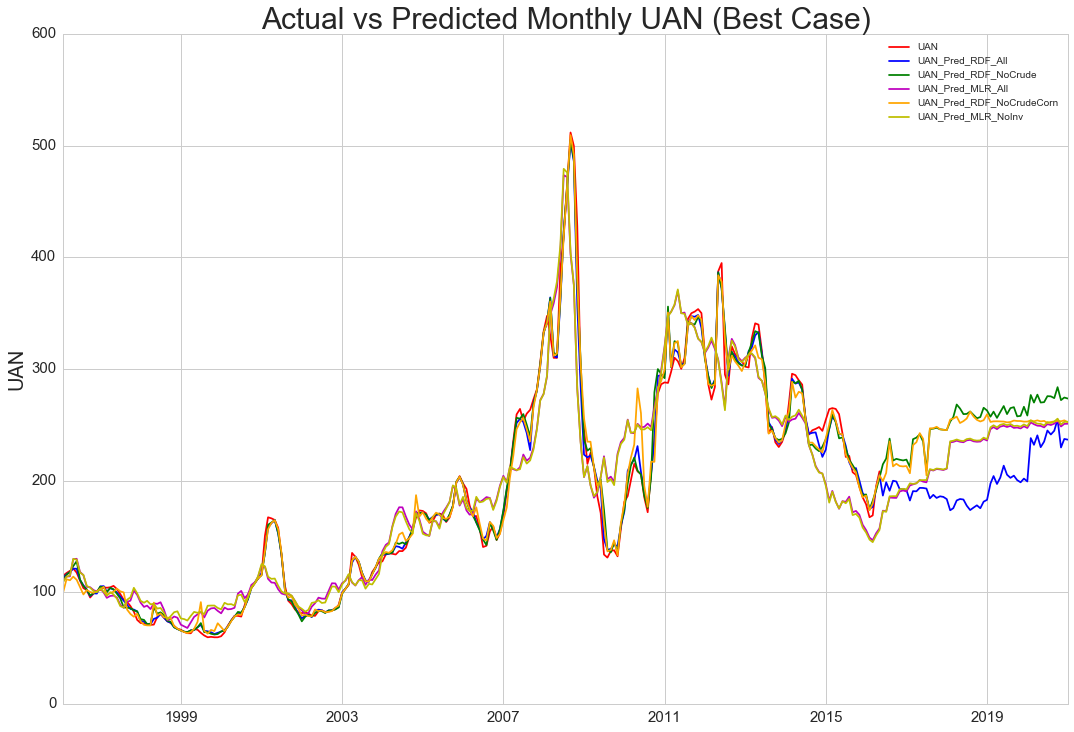

In [83]:
#looking at actual vs predicted monthly
import matplotlib.pyplot as plt
%matplotlib inline

x = (df['Monthly_Date'])
#x_pred = (df['Monthly_Date'][243:])
y1 = (df['UAN'])
y2 = (df['UAN_Pred_RDF_All'])
y3 = (df['UAN_Pred_RDF_NoCrude'])
y4 = (df['UAN_Pred_MLR_All'])
y5 = (df['UAN_Pred_RDF_NoCrudeCorn'])
y6 = (df['UAN_Pred_MLR_NoInv'])
fig = plt.figure(figsize=(18,12))
ax = fig.add_subplot(111)
ax.plot(x,y1,'r')
ax.plot(x,y2,'b')
ax.plot(x,y3,'g')
ax.plot(x,y4,'m')
ax.plot(x,y5,'orange')
ax.plot(x,y6,'y')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)
ax.set_title('Actual vs Predicted Monthly UAN (Best Case)', size=(30))
ax.tick_params(axis='x',which='major',labelsize=15)
ax.tick_params(axis='y',which='major',labelsize=15)
ax.set_ylabel('UAN',size=(20))

plt.show()

# Worst Case
[Top](#table-of-contents)
#### 	          crude	       corn	      gas	   coal
#### Q2-16	  34.00 	 345.00 	 1.75 	 49.40 
#### Q3-16	  35.00 	 340.00 	 2.05 	 48.50 
#### Q4-16	  35.00 	 335.00 	 2.10 	 47.50 
#### Q1-17	  37.00 	 335.00 	 2.25 	 47.00 
#### Q2-17	  40.00 	 350.00 	 2.05 	 47.00 
#### ALL-17	  38.50 	 361.00 	 2.24 	 47.00 
#### ALL-18	  48.70 	 378.00 	 2.60 	 48.20 
#### ALL-19	  46.00 	 384.00 	 2.61 	 48.70 
#### ALL-20	  54.00 	 388.00 	 2.56 	 49.20 


In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.ensemble import RandomForestRegressor
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
data = pd.read_csv("C:/Users/msteinme/Documents/ureaaprilworstrandomness.csv")
df_96on = data[['Date','Crude','Corn','My_Coal','Gas','UAN_Inventory','UAN']][0:1062]
df_96on.tail()
#1/5/1996 - 4/30/2016

,Date,Crude,Corn,My_Coal,Gas,UAN_Inventory,UAN
1057,4/8/2016,40.99,365.00,49.85,2.08,998987.8733,209.92
1058,4/15/2016,41.71,382.00,50.85,2.00,998987.8733,205.12
1059,4/22/2016,44.54,375.50,51.00,2.27,998987.8733,205.12
1060,4/29/2016,46.69,391.75,50.75,2.32,998987.8733,212.16
1061,4/30/2016,46.69,391.75,50.75,2.32,998987.8733,212.16


In [85]:
from datetime import datetime
df_96on['Date'] = pd.to_datetime(df_96on['Date'])
date = df_96on['Date']
df_96on.dtypes

Date             datetime64[ns]
Crude                   float64
Corn                    float64
My_Coal                 float64
Gas                     float64
UAN_Inventory           float64
UAN                     float64
dtype: object

In [86]:
df_96on.describe()

,Crude,Corn,My_Coal,Gas,UAN_Inventory,UAN
count,1062.000000,1062.000000,1062.000000,1062.000000,1062.000000,1062.000000
mean,54.785461,361.748588,58.269360,4.598559,1005441.983512,183.703955
std,31.243572,156.648138,33.567719,2.364318,490773.222051,96.550610
min,11.260000,182.500000,20.900000,1.660000,297701.149400,58.000000
25%,26.417500,231.062500,27.430000,2.760000,650601.513700,101.200000
50%,49.170000,325.500000,51.840000,4.025000,850475.860200,165.200000
75%,81.967500,424.437500,79.675000,5.825000,1245263.158000,257.680000
max,145.860000,809.250000,192.500000,14.430000,2588392.857000,514.880000


### 3 RDF models will be used, parameters found above in exploratory analysis for worst
### all variables, no crude, no crude or corn
[Top](#table-of-contents)

In [87]:
#rdf using all
X = df_96on[['Crude','Corn','My_Coal','Gas','UAN_Inventory']].values
y = df_96on['UAN'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)
forest=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=175, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest.fit(X_train, y_train)
y_train_pred= forest.predict(X_train)
y_test_pred= forest.predict(X_test)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_test,y_test_pred)))
print(forest.feature_importances_)

MSE train: 61.133, test: 448.161
R^2 train: 0.993, test: 0.952
[ 0.42915436  0.14475653  0.36951364  0.03075315  0.02582231]


In [88]:
#comparing the different models
urea_predicted3 = forest.predict(X)
urea_predicted3 = pd.DataFrame(urea_predicted3)
df_96on['UAN_Pred_RDF_All'] = urea_predicted3
rdf_error3 = (abs(df_96on['UAN_Pred_RDF_All'] - df_96on['UAN'])/df_96on['UAN'])*100
df_96on['RDF_All_Error'] = rdf_error3

mlrtop3_predicted = -6.7111 + (df_96on['Crude']*0.6876) + (df_96on['Corn']*0.1929) + (df_96on['My_Coal']*1.1011) + (df_96on['Gas']*5.4360) - (df_96on['UAN_Inventory']*0.000006163) 
df_96on['UAN_Pred_MLR_All'] = mlrtop3_predicted
mlrtop3_error = (abs(df_96on['UAN_Pred_MLR_All'] - df_96on['UAN'])/df_96on['UAN'])*100
df_96on['MLR_Error_All'] = mlrtop3_error

mlrtop4_predicted = -17.3488 + (df_96on['Crude']*0.7355) + (df_96on['Corn']*0.1943) + (df_96on['My_Coal']*1.0921) + (df_96on['Gas']*5.8392) 
df_96on['UAN_Pred_MLR_NoInv'] = mlrtop4_predicted
mlrtop4_error = (abs(df_96on['UAN_Pred_MLR_NoInv'] - df_96on['UAN'])/df_96on['UAN'])*100
df_96on['MLR_Error_NoInv'] = mlrtop4_error

print("Average RDF ALL error is: %.3f" % (rdf_error3.mean())) 
print("Average MLR ALL error is: %.3f" % (mlrtop3_error.mean()))
print("Average MLR no UAN_Inventory error is: %.3f" % (mlrtop4_error.mean()))
df_96on

Average RDF ALL error is: 3.389
Average MLR ALL error is: 14.928
Average MLR no UAN_Inventory error is: 15.299


,Date,Crude,Corn,My_Coal,Gas,UAN_Inventory,UAN,UAN_Pred_RDF_All,RDF_All_Error,UAN_Pred_MLR_All,MLR_Error_All,UAN_Pred_MLR_NoInv,MLR_Error_NoInv
0,1996-01-05,19.65,369.75,25.36,2.42,1271052.6320,114.00,113.697668,0.265204,111.370534,2.306549,110.772720,2.830947
1,1996-01-12,17.98,366.25,25.27,2.22,1271052.6320,114.96,111.502178,3.007848,108.360793,5.740438,107.598256,6.403744
2,1996-01-19,18.25,365.00,29.07,1.96,1271052.6320,114.96,112.202754,2.398439,111.076140,3.378445,110.185754,4.152963
3,1996-01-26,17.36,360.25,29.20,1.95,1271052.6320,115.60,111.789468,3.296308,109.636684,5.158578,108.691815,5.975939
4,1996-02-02,17.38,370.50,32.11,2.08,1360394.7370,117.20,115.698373,1.281252,114.987926,1.887435,114.635207,2.188390
5,1996-02-09,17.38,367.25,28.67,2.24,1360394.7370,117.20,111.674816,4.714321,111.442977,4.912135,111.181180,5.135512
6,1996-02-16,18.40,382.75,28.17,2.17,1360394.7370,117.20,116.443973,0.645074,114.203209,2.556989,113.988246,2.740404
7,1996-02-23,18.45,383.50,28.83,2.26,1360394.7370,117.20,116.505687,0.592417,115.598230,1.366698,115.417060,1.521280
8,1996-03-01,18.62,386.75,27.86,2.06,1523421.0530,117.20,116.918639,0.240069,113.182049,3.428286,113.946393,2.776115
9,1996-03-08,18.87,388.50,26.51,2.05,1523421.0530,117.20,116.486609,0.608695,112.150679,4.308294,112.937566,3.636889


In [89]:
#no crude since highly correlated to coal
X = df_96on[['Corn','My_Coal','Gas','UAN_Inventory']].values
y = df_96on['UAN'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)
forest=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=150, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest.fit(X_train, y_train)
y_train_pred= forest.predict(X_train)
y_test_pred= forest.predict(X_test)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_test,y_test_pred)))
print(forest.feature_importances_)

MSE train: 64.669, test: 450.977
R^2 train: 0.993, test: 0.951
[ 0.29125998  0.633584    0.04121573  0.03394029]


In [90]:
#adding 2nd to last model
urea_predicted4 = forest.predict(X)
urea_predicted4 = pd.DataFrame(urea_predicted4)
df_96on['UAN_Pred_RDF_NoCrude'] = urea_predicted4
rdf_error4 = (abs(df_96on['UAN_Pred_RDF_NoCrude'] - df_96on['UAN'])/df_96on['UAN'])*100
df_96on['RDF_Error_NoCrude'] = rdf_error4

print("Average RDF no crude error is: %.3f" % (rdf_error4.mean()))
df_96on

Average RDF no crude error is: 3.641


,Date,Crude,Corn,My_Coal,Gas,UAN_Inventory,UAN,UAN_Pred_RDF_All,RDF_All_Error,UAN_Pred_MLR_All,MLR_Error_All,UAN_Pred_MLR_NoInv,MLR_Error_NoInv,UAN_Pred_RDF_NoCrude,RDF_Error_NoCrude
0,1996-01-05,19.65,369.75,25.36,2.42,1271052.6320,114.00,113.697668,0.265204,111.370534,2.306549,110.772720,2.830947,114.051573,0.045240
1,1996-01-12,17.98,366.25,25.27,2.22,1271052.6320,114.96,111.502178,3.007848,108.360793,5.740438,107.598256,6.403744,110.483290,3.894145
2,1996-01-19,18.25,365.00,29.07,1.96,1271052.6320,114.96,112.202754,2.398439,111.076140,3.378445,110.185754,4.152963,110.195948,4.144095
3,1996-01-26,17.36,360.25,29.20,1.95,1271052.6320,115.60,111.789468,3.296308,109.636684,5.158578,108.691815,5.975939,110.889815,4.074554
4,1996-02-02,17.38,370.50,32.11,2.08,1360394.7370,117.20,115.698373,1.281252,114.987926,1.887435,114.635207,2.188390,116.280800,0.784300
5,1996-02-09,17.38,367.25,28.67,2.24,1360394.7370,117.20,111.674816,4.714321,111.442977,4.912135,111.181180,5.135512,110.838446,5.427947
6,1996-02-16,18.40,382.75,28.17,2.17,1360394.7370,117.20,116.443973,0.645074,114.203209,2.556989,113.988246,2.740404,117.172533,0.023436
7,1996-02-23,18.45,383.50,28.83,2.26,1360394.7370,117.20,116.505687,0.592417,115.598230,1.366698,115.417060,1.521280,117.247200,0.040273
8,1996-03-01,18.62,386.75,27.86,2.06,1523421.0530,117.20,116.918639,0.240069,113.182049,3.428286,113.946393,2.776115,117.870667,0.572241
9,1996-03-08,18.87,388.50,26.51,2.05,1523421.0530,117.20,116.486609,0.608695,112.150679,4.308294,112.937566,3.636889,116.347467,0.727418


In [91]:
#best, since no x variables correlated to each other
X = df_96on[['My_Coal','Gas','UAN_Inventory']].values
y = df_96on['UAN'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)
forest=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=200, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest.fit(X_train, y_train)
y_train_pred= forest.predict(X_train)
y_test_pred= forest.predict(X_test)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_test,y_test_pred)))
print(forest.feature_importances_)

MSE train: 72.769, test: 605.281
R^2 train: 0.992, test: 0.935
[ 0.87800875  0.06258297  0.05940828]


In [92]:
#last added model
urea_predicted6 = forest.predict(X)
urea_predicted6 = pd.DataFrame(urea_predicted6)
df_96on['UAN_Pred_RDF_NoCrudeCorn'] = urea_predicted6
rdf_error6 = (abs(df_96on['UAN_Pred_RDF_NoCrudeCorn'] - df_96on['UAN'])/df_96on['UAN'])*100
df_96on['RDF_Error_NoCrudeCorn'] = rdf_error6

print("Average RDF no crude or corn error is: %.3f" % (rdf_error6.mean()))
df_96on

Average RDF no crude or corn error is: 4.481


,Date,Crude,Corn,My_Coal,Gas,UAN_Inventory,UAN,UAN_Pred_RDF_All,RDF_All_Error,UAN_Pred_MLR_All,MLR_Error_All,UAN_Pred_MLR_NoInv,MLR_Error_NoInv,UAN_Pred_RDF_NoCrude,RDF_Error_NoCrude,UAN_Pred_RDF_NoCrudeCorn,RDF_Error_NoCrudeCorn
0,1996-01-05,19.65,369.75,25.36,2.42,1271052.6320,114.00,113.697668,0.265204,111.370534,2.306549,110.772720,2.830947,114.051573,0.045240,109.348698,4.080090
1,1996-01-12,17.98,366.25,25.27,2.22,1271052.6320,114.96,111.502178,3.007848,108.360793,5.740438,107.598256,6.403744,110.483290,3.894145,108.361277,5.740017
2,1996-01-19,18.25,365.00,29.07,1.96,1271052.6320,114.96,112.202754,2.398439,111.076140,3.378445,110.185754,4.152963,110.195948,4.144095,95.985106,16.505649
3,1996-01-26,17.36,360.25,29.20,1.95,1271052.6320,115.60,111.789468,3.296308,109.636684,5.158578,108.691815,5.975939,110.889815,4.074554,95.322839,17.540796
4,1996-02-02,17.38,370.50,32.11,2.08,1360394.7370,117.20,115.698373,1.281252,114.987926,1.887435,114.635207,2.188390,116.280800,0.784300,111.523542,4.843394
5,1996-02-09,17.38,367.25,28.67,2.24,1360394.7370,117.20,111.674816,4.714321,111.442977,4.912135,111.181180,5.135512,110.838446,5.427947,113.308465,3.320422
6,1996-02-16,18.40,382.75,28.17,2.17,1360394.7370,117.20,116.443973,0.645074,114.203209,2.556989,113.988246,2.740404,117.172533,0.023436,108.323095,7.574151
7,1996-02-23,18.45,383.50,28.83,2.26,1360394.7370,117.20,116.505687,0.592417,115.598230,1.366698,115.417060,1.521280,117.247200,0.040273,114.223548,2.539635
8,1996-03-01,18.62,386.75,27.86,2.06,1523421.0530,117.20,116.918639,0.240069,113.182049,3.428286,113.946393,2.776115,117.870667,0.572241,108.956257,7.033910
9,1996-03-08,18.87,388.50,26.51,2.05,1523421.0530,117.20,116.486609,0.608695,112.150679,4.308294,112.937566,3.636889,116.347467,0.727418,107.854347,7.974107


In [93]:
#predictions section 5/1/2016 - 12/31/2020
newpred2 = data[['Date','Crude','Corn','My_Coal','Gas','UAN_Inventory']][1062:2768]
newpred = data [['Crude','Corn','My_Coal','Gas','Urea_Inventory']][1062:2768]
newpred3 = data[['Corn','My_Coal','Gas','UAN_Inventory']][1062:2768]
newpred4 = data[['My_Coal','Gas','UAN_Inventory']][1062:2768]

In [94]:
#new predictions
X = df_96on[['Crude','Corn','My_Coal','Gas','UAN_Inventory']].values 
y = df_96on['UAN'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)
forest=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=175, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest.fit(X_train, y_train)
y_train_pred= forest.predict(X_train)
y_test_pred= forest.predict(X_test)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_test,y_test_pred)))
print(forest.feature_importances_)

newpred2 = np.array(newpred2)
newpred2 = pd.DataFrame(newpred2)
newpred2.columns = ['Date','Crude','Corn','My_Coal','Gas','UAN_Inventory']
newpred_predicted = forest.predict(newpred)
df_new_pred = pd.DataFrame(newpred_predicted)
newpred2['UAN_Pred_RDF_All'] = df_new_pred

newpred2['Date'] = pd.to_datetime(newpred2['Date'])
newpred2

MSE train: 63.431, test: 435.456
R^2 train: 0.993, test: 0.953
[ 0.43045086  0.13159531  0.37970191  0.0314008   0.02685113]


,Date,Crude,Corn,My_Coal,Gas,UAN_Inventory,UAN_Pred_RDF_All
0,2016-05-01,46.69,391.75,50.75,2.32,1.14883e+06,169.558977
1,2016-05-02,34.83,362.13,50.57,1.93,1.14883e+06,160.938542
2,2016-05-03,44.91,380.07,49.94,2.3,1.14883e+06,164.671494
3,2016-05-04,35.85,351.18,49.48,2.04,1.14883e+06,156.767354
4,2016-05-05,35.23,367.43,50.12,2.27,1.14883e+06,161.179973
5,2016-05-06,41.69,372.63,50.05,2.25,1.14883e+06,164.327177
6,2016-05-07,40.61,363.58,49.99,2.29,1.14883e+06,164.817539
7,2016-05-08,42.55,368.45,49.81,2.19,1.14883e+06,165.147596
8,2016-05-09,37.95,386.42,49.5,2.29,1.14883e+06,165.690464
9,2016-05-10,34.13,373.24,49.65,2.1,1.14883e+06,159.818297


In [95]:
#other predictions
X = df_96on[['Corn','My_Coal','Gas','UAN_Inventory']].values 
y = df_96on['UAN'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)
forest=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=150, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest.fit(X_train, y_train)
y_train_pred= forest.predict(X_train)
y_test_pred= forest.predict(X_test)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_test,y_test_pred)))
print(forest.feature_importances_)
newpred_predicted2 = forest.predict(newpred3)
df_new_pred2 = pd.DataFrame(newpred_predicted2)
newpred2['UAN_Pred_RDF_NoCrude'] = df_new_pred2

mlrtop3_predicted2 = -6.7111 + (newpred2['Crude']*0.6876) + (newpred2['Corn']*0.1929) + (newpred2['My_Coal']*1.1011) + (newpred2['Gas']*5.4360) - (newpred2['UAN_Inventory']*0.000006163) 
newpred2['UAN_Pred_MLR_All'] = mlrtop3_predicted2

mlrtop4_predicted2 = -17.3488 + (newpred2['Crude']*0.7355) + (newpred2['Corn']*0.1943) + (newpred2['My_Coal']*1.0921) + (newpred2['Gas']*5.8392) 
newpred2['UAN_Pred_MLR_NoInv'] = mlrtop4_predicted2

newpred2['Date'] = pd.to_datetime(newpred2['Date'])
newpred2

MSE train: 62.807, test: 447.917
R^2 train: 0.993, test: 0.952
[ 0.25169456  0.6707567   0.0429042   0.03464454]


,Date,Crude,Corn,My_Coal,Gas,UAN_Inventory,UAN_Pred_RDF_All,UAN_Pred_RDF_NoCrude,UAN_Pred_MLR_All,UAN_Pred_MLR_NoInv
0,2016-05-01,46.69,391.75,50.75,2.32,1.14883e+06,169.558977,204.809643,162.374,162.08
1,2016-05-02,34.83,362.13,50.57,1.93,1.14883e+06,160.938542,179.582442,146.187,145.128
2,2016-05-03,44.91,380.07,49.94,2.3,1.14883e+06,164.671494,188.664521,157.896,157.5
3,2016-05-04,35.85,351.18,49.48,2.04,1.14883e+06,156.767354,163.821465,144.174,143.202
4,2016-05-05,35.23,367.43,50.12,2.27,1.14883e+06,161.179973,185.046549,148.837,147.946
5,2016-05-06,41.69,372.63,50.05,2.25,1.14883e+06,164.327177,187.485423,154.096,153.514
6,2016-05-07,40.61,363.58,49.99,2.29,1.14883e+06,164.817539,177.823805,151.759,151.129
7,2016-05-08,42.55,368.45,49.81,2.19,1.14883e+06,165.147596,185.411823,153.291,152.722
8,2016-05-09,37.95,386.42,49.5,2.29,1.14883e+06,165.690464,181.501316,153.796,153.076
9,2016-05-10,34.13,373.24,49.65,2.1,1.14883e+06,159.818297,186.361867,147.76,146.759


In [96]:
#last added prediction
X = df_96on[['My_Coal','Gas','UAN_Inventory']].values 
y = df_96on['UAN'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)
forest=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=200, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest.fit(X_train, y_train)
y_train_pred= forest.predict(X_train)
y_test_pred= forest.predict(X_test)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_test,y_test_pred)))
print(forest.feature_importances_)
newpred_predicted3 = forest.predict(newpred4)
df_new_pred3 = pd.DataFrame(newpred_predicted3)
newpred2['UAN_Pred_RDF_NoCrudeCorn'] = df_new_pred3
newpred2

MSE train: 76.485, test: 601.556
R^2 train: 0.992, test: 0.935
[ 0.87617298  0.06486943  0.05895759]


,Date,Crude,Corn,My_Coal,Gas,UAN_Inventory,UAN_Pred_RDF_All,UAN_Pred_RDF_NoCrude,UAN_Pred_MLR_All,UAN_Pred_MLR_NoInv,UAN_Pred_RDF_NoCrudeCorn
0,2016-05-01,46.69,391.75,50.75,2.32,1.14883e+06,169.558977,204.809643,162.374,162.08,195.105126
1,2016-05-02,34.83,362.13,50.57,1.93,1.14883e+06,160.938542,179.582442,146.187,145.128,186.835411
2,2016-05-03,44.91,380.07,49.94,2.3,1.14883e+06,164.671494,188.664521,157.896,157.5,183.871926
3,2016-05-04,35.85,351.18,49.48,2.04,1.14883e+06,156.767354,163.821465,144.174,143.202,177.316080
4,2016-05-05,35.23,367.43,50.12,2.27,1.14883e+06,161.179973,185.046549,148.837,147.946,182.529526
5,2016-05-06,41.69,372.63,50.05,2.25,1.14883e+06,164.327177,187.485423,154.096,153.514,183.187126
6,2016-05-07,40.61,363.58,49.99,2.29,1.14883e+06,164.817539,177.823805,151.759,151.129,183.211126
7,2016-05-08,42.55,368.45,49.81,2.19,1.14883e+06,165.147596,185.411823,153.291,152.722,182.688326
8,2016-05-09,37.95,386.42,49.5,2.29,1.14883e+06,165.690464,181.501316,153.796,153.076,176.492329
9,2016-05-10,34.13,373.24,49.65,2.1,1.14883e+06,159.818297,186.361867,147.76,146.759,183.587811


In [97]:
frames = [df_96on,newpred2]
combined = pd.concat(frames)
combined

,Corn,Crude,Date,Gas,MLR_Error_All,MLR_Error_NoInv,My_Coal,RDF_All_Error,RDF_Error_NoCrude,RDF_Error_NoCrudeCorn,UAN,UAN_Inventory,UAN_Pred_MLR_All,UAN_Pred_MLR_NoInv,UAN_Pred_RDF_All,UAN_Pred_RDF_NoCrude,UAN_Pred_RDF_NoCrudeCorn
0,369.75,19.65,1996-01-05,2.42,2.306549,2.830947,25.36,0.265204,0.045240,4.080090,114.00,1.27105e+06,111.371,110.773,113.697668,114.051573,109.348698
1,366.25,17.98,1996-01-12,2.22,5.740438,6.403744,25.27,3.007848,3.894145,5.740017,114.96,1.27105e+06,108.361,107.598,111.502178,110.483290,108.361277
2,365,18.25,1996-01-19,1.96,3.378445,4.152963,29.07,2.398439,4.144095,16.505649,114.96,1.27105e+06,111.076,110.186,112.202754,110.195948,95.985106
3,360.25,17.36,1996-01-26,1.95,5.158578,5.975939,29.2,3.296308,4.074554,17.540796,115.60,1.27105e+06,109.637,108.692,111.789468,110.889815,95.322839
4,370.5,17.38,1996-02-02,2.08,1.887435,2.188390,32.11,1.281252,0.784300,4.843394,117.20,1.36039e+06,114.988,114.635,115.698373,116.280800,111.523542
5,367.25,17.38,1996-02-09,2.24,4.912135,5.135512,28.67,4.714321,5.427947,3.320422,117.20,1.36039e+06,111.443,111.181,111.674816,110.838446,113.308465
6,382.75,18.4,1996-02-16,2.17,2.556989,2.740404,28.17,0.645074,0.023436,7.574151,117.20,1.36039e+06,114.203,113.988,116.443973,117.172533,108.323095
7,383.5,18.45,1996-02-23,2.26,1.366698,1.521280,28.83,0.592417,0.040273,2.539635,117.20,1.36039e+06,115.598,115.417,116.505687,117.247200,114.223548
8,386.75,18.62,1996-03-01,2.06,3.428286,2.776115,27.86,0.240069,0.572241,7.033910,117.20,1.52342e+06,113.182,113.946,116.918639,117.870667,108.956257
9,388.5,18.87,1996-03-08,2.05,4.308294,3.636889,26.51,0.608695,0.727418,7.974107,117.20,1.52342e+06,112.151,112.938,116.486609,116.347467,107.854347


In [98]:
combined = combined[['Date','Crude','Corn','My_Coal','Gas','UAN_Inventory','UAN','UAN_Pred_MLR_All','UAN_Pred_MLR_NoInv','UAN_Pred_RDF_All','UAN_Pred_RDF_NoCrude','UAN_Pred_RDF_NoCrudeCorn']]
combined = np.array(combined)
combined = pd.DataFrame(combined)
combined.columns = ['Date','Crude','Corn','My_Coal','Gas','UAN_Inventory','UAN','UAN_Pred_MLR_All','UAN_Pred_MLR_NoInv','UAN_Pred_RDF_All','UAN_Pred_RDF_NoCrude','UAN_Pred_RDF_NoCrudeCorn']
combined

,Date,Crude,Corn,My_Coal,Gas,UAN_Inventory,UAN,UAN_Pred_MLR_All,UAN_Pred_MLR_NoInv,UAN_Pred_RDF_All,UAN_Pred_RDF_NoCrude,UAN_Pred_RDF_NoCrudeCorn
0,1996-01-05 00:00:00,19.65,369.75,25.36,2.42,1.27105e+06,114,111.371,110.773,113.698,114.052,109.349
1,1996-01-12 00:00:00,17.98,366.25,25.27,2.22,1.27105e+06,114.96,108.361,107.598,111.502,110.483,108.361
2,1996-01-19 00:00:00,18.25,365,29.07,1.96,1.27105e+06,114.96,111.076,110.186,112.203,110.196,95.9851
3,1996-01-26 00:00:00,17.36,360.25,29.2,1.95,1.27105e+06,115.6,109.637,108.692,111.789,110.89,95.3228
4,1996-02-02 00:00:00,17.38,370.5,32.11,2.08,1.36039e+06,117.2,114.988,114.635,115.698,116.281,111.524
5,1996-02-09 00:00:00,17.38,367.25,28.67,2.24,1.36039e+06,117.2,111.443,111.181,111.675,110.838,113.308
6,1996-02-16 00:00:00,18.4,382.75,28.17,2.17,1.36039e+06,117.2,114.203,113.988,116.444,117.173,108.323
7,1996-02-23 00:00:00,18.45,383.5,28.83,2.26,1.36039e+06,117.2,115.598,115.417,116.506,117.247,114.224
8,1996-03-01 00:00:00,18.62,386.75,27.86,2.06,1.52342e+06,117.2,113.182,113.946,116.919,117.871,108.956
9,1996-03-08 00:00:00,18.87,388.5,26.51,2.05,1.52342e+06,117.2,112.151,112.938,116.487,116.347,107.854


In [99]:
combined.to_csv("C:/Users/msteinme/Documents/uanaprilworstresultsrandomness.csv")

In [100]:
#split into months
cols = ['Date','Crude','Corn','My_Coal','Gas','UAN_Inventory','UAN','UAN_Pred_MLR_All','UAN_Pred_MLR_NoInv','UAN_Pred_RDF_All','UAN_Pred_RDF_NoCrude','UAN_Pred_RDF_NoCrudeCorn']
jan_96 = combined[cols][0:4]
feb_96 = combined[cols][4:8]
mar_96 = combined[cols][8:13]
apr_96 = combined[cols][13:17]
may_96 = combined[cols][17:22]
jun_96 = combined[cols][22:26]
jul_96 = combined[cols][26:30]
aug_96 = combined[cols][30:35]
sep_96 = combined[cols][35:39]
oct_96 = combined[cols][39:43]
nov_96 = combined[cols][43:48]
dec_96 = combined[cols][48:52]
jan_97 = combined[cols][52:57]
feb_97 = combined[cols][57:61]
mar_97 = combined[cols][61:65]
apr_97 = combined[cols][65:69]
may_97 = combined[cols][69:74]
jun_97 = combined[cols][74:78]
jul_97 = combined[cols][78:82]
aug_97 = combined[cols][82:87]
sep_97 = combined[cols][87:91]
oct_97 = combined[cols][91:96]
nov_97 = combined[cols][96:100]
dec_97 = combined[cols][100:104]
jan_98 = combined[cols][104:109]
feb_98 = combined[cols][109:113]
mar_98 = combined[cols][113:117]
apr_98 = combined[cols][117:121]
may_98 = combined[cols][121:126]
jun_98 = combined[cols][126:130]
jul_98 = combined[cols][130:135]
aug_98 = combined[cols][135:139]
sep_98 = combined[cols][139:143]
oct_98 = combined[cols][143:148]
nov_98 = combined[cols][148:152]
dec_98 = combined[cols][152:156]
jan_99 = combined[cols][156:161]
feb_99 = combined[cols][161:165]
mar_99 = combined[cols][165:169]
apr_99 = combined[cols][169:174]
may_99 = combined[cols][174:178]
jun_99 = combined[cols][178:182]
jul_99 = combined[cols][182:187]
aug_99 = combined[cols][187:191]
sep_99 = combined[cols][191:195]
oct_99 = combined[cols][195:200]
nov_99 = combined[cols][200:204]
dec_99 = combined[cols][204:209]
jan_00 = combined[cols][209:213]
feb_00 = combined[cols][213:217]
mar_00 = combined[cols][217:222]
apr_00 = combined[cols][222:226]
may_00 = combined[cols][226:230]
jun_00 = combined[cols][230:235]
jul_00 = combined[cols][235:239]
aug_00 = combined[cols][239:243]
sep_00 = combined[cols][243:248]
oct_00 = combined[cols][248:252]
nov_00 = combined[cols][252:256]
dec_00 = combined[cols][256:261]
jan_01 = combined[cols][261:265]
feb_01 = combined[cols][265:269]
mar_01 = combined[cols][269:274]
apr_01 = combined[cols][274:278]
may_01 = combined[cols][278:282]
jun_01 = combined[cols][282:287]
jul_01 = combined[cols][287:291]
aug_01 = combined[cols][291:296]
sep_01 = combined[cols][296:300]
oct_01 = combined[cols][300:304]
nov_01 = combined[cols][304:309]
dec_01 = combined[cols][309:313]
jan_02 = combined[cols][313:317]
feb_02 = combined[cols][317:321]
mar_02 = combined[cols][321:326]
apr_02 = combined[cols][326:330]
may_02 = combined[cols][330:335]
jun_02 = combined[cols][335:339]
jul_02 = combined[cols][339:343]
aug_02 = combined[cols][343:348]
sep_02 = combined[cols][348:352]
oct_02 = combined[cols][352:356]
nov_02 = combined[cols][356:361]
dec_02 = combined[cols][361:365]
jan_03 = combined[cols][365:370]
feb_03 = combined[cols][370:374]
mar_03 = combined[cols][374:378]
apr_03 = combined[cols][378:382]
may_03 = combined[cols][382:387]
jun_03 = combined[cols][387:391]
jul_03 = combined[cols][391:395]
aug_03 = combined[cols][395:400]
sep_03 = combined[cols][400:404]
oct_03 = combined[cols][404:409]
nov_03 = combined[cols][409:413]
dec_03 = combined[cols][413:417]
jan_04 = combined[cols][417:422]
feb_04 = combined[cols][422:426]
mar_04 = combined[cols][426:430]
apr_04 = combined[cols][430:435]
may_04 = combined[cols][435:439]
jun_04 = combined[cols][439:443]
jul_04 = combined[cols][443:448]
aug_04 = combined[cols][448:452]
sep_04 = combined[cols][452:456]
oct_04 = combined[cols][456:461]
nov_04 = combined[cols][461:465]
dec_04 = combined[cols][465:470]
jan_05 = combined[cols][470:474]
feb_05 = combined[cols][474:478]
mar_05 = combined[cols][478:482]
apr_05 = combined[cols][482:487]
may_05 = combined[cols][487:491]
jun_05 = combined[cols][491:495]
jul_05 = combined[cols][495:500]
aug_05 = combined[cols][500:504]
sep_05 = combined[cols][504:509]
oct_05 = combined[cols][509:513]
nov_05 = combined[cols][513:517]
dec_05 = combined[cols][517:522]
jan_06 = combined[cols][522:526]
feb_06 = combined[cols][526:530]
mar_06 = combined[cols][530:535]
apr_06 = combined[cols][535:539]
may_06 = combined[cols][539:543]
jun_06 = combined[cols][543:548]
jul_06 = combined[cols][548:552]
aug_06 = combined[cols][552:556]
sep_06 = combined[cols][556:561]
oct_06 = combined[cols][561:565]
nov_06 = combined[cols][565:569]
dec_06 = combined[cols][569:574]
jan_07 = combined[cols][574:578]
feb_07 = combined[cols][578:582]
mar_07 = combined[cols][582:587]
apr_07 = combined[cols][587:591]
may_07 = combined[cols][591:595]
jun_07 = combined[cols][595:600]
jul_07 = combined[cols][600:604]
aug_07 = combined[cols][604:609]
sep_07 = combined[cols][609:613]
oct_07 = combined[cols][613:617]
nov_07 = combined[cols][617:622]
dec_07 = combined[cols][622:626]
jan_08 = combined[cols][626:630]
feb_08 = combined[cols][630:635]
mar_08 = combined[cols][635:639]
apr_08 = combined[cols][639:643]
may_08 = combined[cols][643:648]
jun_08 = combined[cols][648:652]
jul_08 = combined[cols][652:656]
aug_08 = combined[cols][656:661]
sep_08 = combined[cols][661:665]
oct_08 = combined[cols][665:670]
nov_08 = combined[cols][670:674]
dec_08 = combined[cols][674:678]
jan_09 = combined[cols][678:683]
feb_09 = combined[cols][683:687]
mar_09 = combined[cols][687:691]
apr_09 = combined[cols][691:695]
may_09 = combined[cols][695:700]
jun_09 = combined[cols][700:704]
jul_09 = combined[cols][704:709]
aug_09 = combined[cols][709:713]
sep_09 = combined[cols][713:717]
oct_09 = combined[cols][717:722]
nov_09 = combined[cols][722:726]
dec_09 = combined[cols][726:730]
jan_10 = combined[cols][730:735]
feb_10 = combined[cols][735:739]
mar_10 = combined[cols][739:743]
apr_10 = combined[cols][743:748]
may_10 = combined[cols][748:752]
jun_10 = combined[cols][752:756]
jul_10 = combined[cols][756:761]
aug_10 = combined[cols][761:765]
sep_10 = combined[cols][765:769]
oct_10 = combined[cols][769:774]
nov_10 = combined[cols][774:778]
dec_10 = combined[cols][778:783]
jan_11 = combined[cols][783:787]
feb_11 = combined[cols][787:791]
mar_11 = combined[cols][791:795]
apr_11 = combined[cols][795:800]
may_11 = combined[cols][800:804]
jun_11 = combined[cols][804:808]
jul_11 = combined[cols][808:813]
aug_11 = combined[cols][813:817]
sep_11 = combined[cols][817:822]
oct_11 = combined[cols][822:826]
nov_11 = combined[cols][826:830]
dec_11 = combined[cols][830:835]
jan_12 = combined[cols][835:839]
feb_12 = combined[cols][839:843]
mar_12 = combined[cols][843:848]
apr_12 = combined[cols][848:852]
may_12 = combined[cols][852:856]
jun_12 = combined[cols][856:861]
jul_12 = combined[cols][861:865]
aug_12 = combined[cols][865:870]
sep_12 = combined[cols][870:874]
oct_12 = combined[cols][874:878]
nov_12 = combined[cols][878:883]
dec_12 = combined[cols][883:887]
jan_13 = combined[cols][887:891]
feb_13 = combined[cols][891:895]
mar_13 = combined[cols][895:900]
apr_13 = combined[cols][900:904]
may_13 = combined[cols][904:909]
jun_13 = combined[cols][909:913]
jul_13 = combined[cols][913:917]
aug_13 = combined[cols][917:922]
sep_13 = combined[cols][922:926]
oct_13 = combined[cols][926:930]
nov_13 = combined[cols][930:935]
dec_13 = combined[cols][935:939]
jan_14 = combined[cols][939:944]
feb_14 = combined[cols][944:948]
mar_14 = combined[cols][948:952]
apr_14 = combined[cols][952:956]
may_14 = combined[cols][956:961]
jun_14 = combined[cols][961:965]
jul_14 = combined[cols][965:969]
aug_14 = combined[cols][969:974]
sep_14 = combined[cols][974:978]
oct_14 = combined[cols][978:983]
nov_14 = combined[cols][983:987]
dec_14 = combined[cols][987:991]
jan_15 = combined[cols][991:996]
feb_15 = combined[cols][996:1000]
mar_15 = combined[cols][1000:1004]
apr_15 = combined[cols][1004:1008]
may_15 = combined[cols][1008:1013]
jun_15 = combined[cols][1013:1017]
jul_15 = combined[cols][1017:1022]
aug_15 = combined[cols][1022:1026]
sep_15 = combined[cols][1026:1030]
oct_15 = combined[cols][1030:1035]
nov_15 = combined[cols][1035:1039]
dec_15 = combined[cols][1039:1043]
jan_16 = combined[cols][1043:1048]
feb_16 = combined[cols][1048:1052]
mar_16 = combined[cols][1052:1056]
apr_16 = combined[cols][1056:1062]

#predicted part
may_16 = combined[cols][1062:1093]
jun_16 = combined[cols][1093:1123]
jul_16 = combined[cols][1123:1154]
aug_16 = combined[cols][1154:1185]
sep_16 = combined[cols][1185:1215]
oct_16 = combined[cols][1215:1246]
nov_16 = combined[cols][1246:1276]
dec_16 = combined[cols][1276:1307]
jan_17 = combined[cols][1307:1338]
feb_17 = combined[cols][1338:1366]
mar_17 = combined[cols][1366:1397]
apr_17 = combined[cols][1397:1427]
may_17 = combined[cols][1427:1458]
jun_17 = combined[cols][1458:1488]
jul_17 = combined[cols][1488:1519]
aug_17 = combined[cols][1519:1550]
sep_17 = combined[cols][1550:1580]
oct_17 = combined[cols][1580:1611]
nov_17 = combined[cols][1611:1641]
dec_17 = combined[cols][1641:1672]
jan_18 = combined[cols][1672:1703]
feb_18 = combined[cols][1703:1731]
mar_18 = combined[cols][1731:1762]
apr_18 = combined[cols][1762:1792]
may_18 = combined[cols][1792:1823]
jun_18 = combined[cols][1823:1853]
jul_18 = combined[cols][1853:1884]
aug_18 = combined[cols][1884:1915]
sep_18 = combined[cols][1915:1945]
oct_18 = combined[cols][1945:1976]
nov_18 = combined[cols][1976:2006]
dec_18 = combined[cols][2006:2037]
jan_19 = combined[cols][2037:2068]
feb_19 = combined[cols][2068:2096]
mar_19 = combined[cols][2096:2127]
apr_19 = combined[cols][2127:2157]
may_19 = combined[cols][2157:2188]
jun_19 = combined[cols][2188:2218]
jul_19 = combined[cols][2218:2249]
aug_19 = combined[cols][2249:2280]
sep_19 = combined[cols][2280:2310]
oct_19 = combined[cols][2310:2341]
nov_19 = combined[cols][2341:2371]
dec_19 = combined[cols][2371:2402]
jan_20 = combined[cols][2402:2433]
feb_20 = combined[cols][2433:2462]
mar_20 = combined[cols][2462:2493]
apr_20 = combined[cols][2493:2523]
may_20 = combined[cols][2523:2554]
jun_20 = combined[cols][2554:2584]
jul_20 = combined[cols][2584:2615]
aug_20 = combined[cols][2615:2646]
sep_20 = combined[cols][2646:2676]
oct_20 = combined[cols][2676:2707]
nov_20 = combined[cols][2707:2737]
dec_20 = combined[cols][2737:2768]

In [101]:
mycolumns = ['Crude','Corn','My_Coal','Gas','UAN_Inventory','UAN','UAN_Pred_MLR_All','UAN_Pred_MLR_NoInv','UAN_Pred_RDF_All','UAN_Pred_RDF_NoCrude','UAN_Pred_RDF_NoCrudeCorn']
df = pd.DataFrame(columns=mycolumns)
rows = [jan_96[mycolumns].mean(),feb_96[mycolumns].mean(),
        mar_96[mycolumns].mean(),apr_96[mycolumns].mean(),may_96[mycolumns].mean(),jun_96[mycolumns].mean(),
        jul_96[mycolumns].mean(),aug_96[mycolumns].mean(),sep_96[mycolumns].mean(),oct_96[mycolumns].mean(),nov_96[mycolumns].mean(),dec_96[mycolumns].mean(),
        jan_97[mycolumns].mean(),feb_97[mycolumns].mean(),mar_97[mycolumns].mean(),apr_97[mycolumns].mean(),may_97[mycolumns].mean(),jun_97[mycolumns].mean(),
        jul_97[mycolumns].mean(),aug_97[mycolumns].mean(),sep_97[mycolumns].mean(),oct_97[mycolumns].mean(),nov_97[mycolumns].mean(),dec_97[mycolumns].mean(),
        jan_98[mycolumns].mean(),feb_98[mycolumns].mean(),mar_98[mycolumns].mean(),apr_98[mycolumns].mean(),may_98[mycolumns].mean(),jun_98[mycolumns].mean(),
        jul_98[mycolumns].mean(),aug_98[mycolumns].mean(),sep_98[mycolumns].mean(),oct_98[mycolumns].mean(),nov_98[mycolumns].mean(),dec_98[mycolumns].mean(),
        jan_99[mycolumns].mean(),feb_99[mycolumns].mean(),mar_99[mycolumns].mean(),apr_99[mycolumns].mean(),may_99[mycolumns].mean(),jun_99[mycolumns].mean(),
        jul_99[mycolumns].mean(),aug_99[mycolumns].mean(),sep_99[mycolumns].mean(),oct_99[mycolumns].mean(),nov_99[mycolumns].mean(),dec_99[mycolumns].mean(),
        jan_00[mycolumns].mean(),feb_00[mycolumns].mean(),mar_00[mycolumns].mean(),apr_00[mycolumns].mean(),may_00[mycolumns].mean(),jun_00[mycolumns].mean(),
        jul_00[mycolumns].mean(),aug_00[mycolumns].mean(),sep_00[mycolumns].mean(),oct_00[mycolumns].mean(),nov_00[mycolumns].mean(),dec_00[mycolumns].mean(),
        jan_01[mycolumns].mean(),feb_01[mycolumns].mean(),mar_01[mycolumns].mean(),apr_01[mycolumns].mean(),may_01[mycolumns].mean(),jun_01[mycolumns].mean(),
        jul_01[mycolumns].mean(),aug_01[mycolumns].mean(),sep_01[mycolumns].mean(),oct_01[mycolumns].mean(),nov_01[mycolumns].mean(),dec_01[mycolumns].mean(),
        jan_02[mycolumns].mean(),feb_02[mycolumns].mean(),mar_02[mycolumns].mean(),apr_02[mycolumns].mean(),may_02[mycolumns].mean(),jun_02[mycolumns].mean(),
        jul_02[mycolumns].mean(),aug_02[mycolumns].mean(),sep_02[mycolumns].mean(),oct_02[mycolumns].mean(),nov_02[mycolumns].mean(),dec_02[mycolumns].mean(),
        jan_03[mycolumns].mean(),feb_03[mycolumns].mean(),mar_03[mycolumns].mean(),apr_03[mycolumns].mean(),may_03[mycolumns].mean(),jun_03[mycolumns].mean(),
        jul_03[mycolumns].mean(),aug_03[mycolumns].mean(),sep_03[mycolumns].mean(),oct_03[mycolumns].mean(),nov_03[mycolumns].mean(),dec_03[mycolumns].mean(),
        jan_04[mycolumns].mean(),feb_04[mycolumns].mean(),mar_04[mycolumns].mean(),apr_04[mycolumns].mean(),may_04[mycolumns].mean(),jun_04[mycolumns].mean(),
        jul_04[mycolumns].mean(),aug_04[mycolumns].mean(),sep_04[mycolumns].mean(),oct_04[mycolumns].mean(),nov_04[mycolumns].mean(),dec_04[mycolumns].mean(),
        jan_05[mycolumns].mean(),feb_05[mycolumns].mean(),mar_05[mycolumns].mean(),apr_05[mycolumns].mean(),may_05[mycolumns].mean(),jun_05[mycolumns].mean(),
        jul_05[mycolumns].mean(),aug_05[mycolumns].mean(),sep_05[mycolumns].mean(),oct_05[mycolumns].mean(),nov_05[mycolumns].mean(),dec_05[mycolumns].mean(),
        jan_06[mycolumns].mean(),feb_06[mycolumns].mean(),mar_06[mycolumns].mean(),apr_06[mycolumns].mean(),may_06[mycolumns].mean(),jun_06[mycolumns].mean(),
        jul_06[mycolumns].mean(),aug_06[mycolumns].mean(),sep_06[mycolumns].mean(),oct_06[mycolumns].mean(),nov_06[mycolumns].mean(),dec_06[mycolumns].mean(),
        jan_07[mycolumns].mean(),feb_07[mycolumns].mean(),mar_07[mycolumns].mean(),apr_07[mycolumns].mean(),may_07[mycolumns].mean(),jun_07[mycolumns].mean(),
        jul_07[mycolumns].mean(),aug_07[mycolumns].mean(),sep_07[mycolumns].mean(),oct_07[mycolumns].mean(),nov_07[mycolumns].mean(),dec_07[mycolumns].mean(),
        jan_08[mycolumns].mean(),feb_08[mycolumns].mean(),mar_08[mycolumns].mean(),apr_08[mycolumns].mean(),may_08[mycolumns].mean(),jun_08[mycolumns].mean(),
        jul_08[mycolumns].mean(),aug_08[mycolumns].mean(),sep_08[mycolumns].mean(),oct_08[mycolumns].mean(),nov_08[mycolumns].mean(),dec_08[mycolumns].mean(),
        jan_09[mycolumns].mean(),feb_09[mycolumns].mean(),mar_09[mycolumns].mean(),apr_09[mycolumns].mean(),may_09[mycolumns].mean(),jun_09[mycolumns].mean(),
        jul_09[mycolumns].mean(),aug_09[mycolumns].mean(),sep_09[mycolumns].mean(),oct_09[mycolumns].mean(),nov_09[mycolumns].mean(),dec_09[mycolumns].mean(),
        jan_10[mycolumns].mean(),feb_10[mycolumns].mean(),mar_10[mycolumns].mean(),apr_10[mycolumns].mean(),may_10[mycolumns].mean(),jun_10[mycolumns].mean(),
        jul_10[mycolumns].mean(),aug_10[mycolumns].mean(),sep_10[mycolumns].mean(),oct_10[mycolumns].mean(),nov_10[mycolumns].mean(),dec_10[mycolumns].mean(),
        jan_11[mycolumns].mean(),feb_11[mycolumns].mean(),mar_11[mycolumns].mean(),apr_11[mycolumns].mean(),may_11[mycolumns].mean(),jun_11[mycolumns].mean(),
        jul_11[mycolumns].mean(),aug_11[mycolumns].mean(),sep_11[mycolumns].mean(),oct_11[mycolumns].mean(),nov_11[mycolumns].mean(),dec_11[mycolumns].mean(),
        jan_12[mycolumns].mean(),feb_12[mycolumns].mean(),mar_12[mycolumns].mean(),apr_12[mycolumns].mean(),may_12[mycolumns].mean(),jun_12[mycolumns].mean(),
        jul_12[mycolumns].mean(),aug_12[mycolumns].mean(),sep_12[mycolumns].mean(),oct_12[mycolumns].mean(),nov_12[mycolumns].mean(),dec_12[mycolumns].mean(),
        jan_13[mycolumns].mean(),feb_13[mycolumns].mean(),mar_13[mycolumns].mean(),apr_13[mycolumns].mean(),may_13[mycolumns].mean(),jun_13[mycolumns].mean(),
        jul_13[mycolumns].mean(),aug_13[mycolumns].mean(),sep_13[mycolumns].mean(),oct_13[mycolumns].mean(),nov_13[mycolumns].mean(),dec_13[mycolumns].mean(),
        jan_14[mycolumns].mean(),feb_14[mycolumns].mean(),mar_14[mycolumns].mean(),apr_14[mycolumns].mean(),may_14[mycolumns].mean(),jun_14[mycolumns].mean(),
        jul_14[mycolumns].mean(),aug_14[mycolumns].mean(),sep_14[mycolumns].mean(),oct_14[mycolumns].mean(),nov_14[mycolumns].mean(),dec_14[mycolumns].mean(),
        jan_15[mycolumns].mean(),feb_15[mycolumns].mean(),mar_15[mycolumns].mean(),apr_15[mycolumns].mean(),may_15[mycolumns].mean(),jun_15[mycolumns].mean(),
        jul_15[mycolumns].mean(),aug_15[mycolumns].mean(),sep_15[mycolumns].mean(),oct_15[mycolumns].mean(),nov_15[mycolumns].mean(),dec_15[mycolumns].mean(),
        jan_16[mycolumns].mean(),feb_16[mycolumns].mean(),mar_16[mycolumns].mean(),apr_16[mycolumns].mean(),may_16[mycolumns].mean(),jun_16[mycolumns].mean(),
        jul_16[mycolumns].mean(),aug_16[mycolumns].mean(),sep_16[mycolumns].mean(),oct_16[mycolumns].mean(),nov_16[mycolumns].mean(),dec_16[mycolumns].mean(),
        jan_17[mycolumns].mean(),feb_17[mycolumns].mean(),mar_17[mycolumns].mean(),apr_17[mycolumns].mean(),may_17[mycolumns].mean(),jun_17[mycolumns].mean(),
        jul_17[mycolumns].mean(),aug_17[mycolumns].mean(),sep_17[mycolumns].mean(),oct_17[mycolumns].mean(),nov_17[mycolumns].mean(),dec_17[mycolumns].mean(),
        jan_18[mycolumns].mean(),feb_18[mycolumns].mean(),mar_18[mycolumns].mean(),apr_18[mycolumns].mean(),may_18[mycolumns].mean(),jun_18[mycolumns].mean(),
        jul_18[mycolumns].mean(),aug_18[mycolumns].mean(),sep_18[mycolumns].mean(),oct_18[mycolumns].mean(),nov_18[mycolumns].mean(),dec_18[mycolumns].mean(),
        jan_19[mycolumns].mean(),feb_19[mycolumns].mean(),mar_19[mycolumns].mean(),apr_19[mycolumns].mean(),may_19[mycolumns].mean(),jun_19[mycolumns].mean(),
        jul_19[mycolumns].mean(),aug_19[mycolumns].mean(),sep_19[mycolumns].mean(),oct_19[mycolumns].mean(),nov_19[mycolumns].mean(),dec_19[mycolumns].mean(),
        jan_20[mycolumns].mean(),feb_20[mycolumns].mean(),mar_20[mycolumns].mean(),apr_20[mycolumns].mean(),may_20[mycolumns].mean(),jun_20[mycolumns].mean(),
        jul_20[mycolumns].mean(),aug_20[mycolumns].mean(),sep_20[mycolumns].mean(),oct_20[mycolumns].mean(),nov_20[mycolumns].mean(),dec_20[mycolumns].mean()]
#puts each of those values for each of the rows
for row in rows:
    df.loc[len(df)] = row
df.tail() 

,Crude,Corn,My_Coal,Gas,UAN_Inventory,UAN,UAN_Pred_MLR_All,UAN_Pred_MLR_NoInv,UAN_Pred_RDF_All,UAN_Pred_RDF_NoCrude,UAN_Pred_RDF_NoCrudeCorn
295,50.452581,386.156774,48.922903,2.584194,1375000,NaN,161.912296,163.307660,164.254930,178.197129,177.156010
296,49.988000,386.388000,48.910333,2.581667,1375000,NaN,161.609877,162.982405,164.304688,178.199864,177.137202
297,50.065806,385.693871,48.945806,2.580000,1375000,NaN,161.559479,162.933771,164.166402,178.120333,177.128720
298,50.654333,386.282667,48.942667,2.584667,1375000,NaN,162.099639,163.504856,164.269831,178.253202,177.117749
299,50.440645,385.781935,48.924839,2.586129,1375000,NaN,161.844435,163.239466,164.232987,178.166487,177.133636


In [102]:
#creating monthly dates in datetime form from 1/1996 to 12/2020
from datetime import datetime
rng2 = pd.date_range(start='1996-01-01', periods=302, freq='M')
rng2
rng2 = pd.DataFrame(rng2)
df['Monthly_Date']= rng2

In [103]:
print(df.dtypes)
df.tail()

Crude                              float64
Corn                               float64
My_Coal                            float64
Gas                                float64
UAN_Inventory                      float64
UAN                                float64
UAN_Pred_MLR_All                   float64
UAN_Pred_MLR_NoInv                 float64
UAN_Pred_RDF_All                   float64
UAN_Pred_RDF_NoCrude               float64
UAN_Pred_RDF_NoCrudeCorn           float64
Monthly_Date                datetime64[ns]
dtype: object


,Crude,Corn,My_Coal,Gas,UAN_Inventory,UAN,UAN_Pred_MLR_All,UAN_Pred_MLR_NoInv,UAN_Pred_RDF_All,UAN_Pred_RDF_NoCrude,UAN_Pred_RDF_NoCrudeCorn,Monthly_Date
295,50.452581,386.156774,48.922903,2.584194,1375000,NaN,161.912296,163.307660,164.254930,178.197129,177.156010,2020-08-31
296,49.988000,386.388000,48.910333,2.581667,1375000,NaN,161.609877,162.982405,164.304688,178.199864,177.137202,2020-09-30
297,50.065806,385.693871,48.945806,2.580000,1375000,NaN,161.559479,162.933771,164.166402,178.120333,177.128720,2020-10-31
298,50.654333,386.282667,48.942667,2.584667,1375000,NaN,162.099639,163.504856,164.269831,178.253202,177.117749,2020-11-30
299,50.440645,385.781935,48.924839,2.586129,1375000,NaN,161.844435,163.239466,164.232987,178.166487,177.133636,2020-12-31


In [104]:
df.to_csv("C:/Users/msteinme/Documents/uanaprilworstresultsmonthlyrandomness.csv")

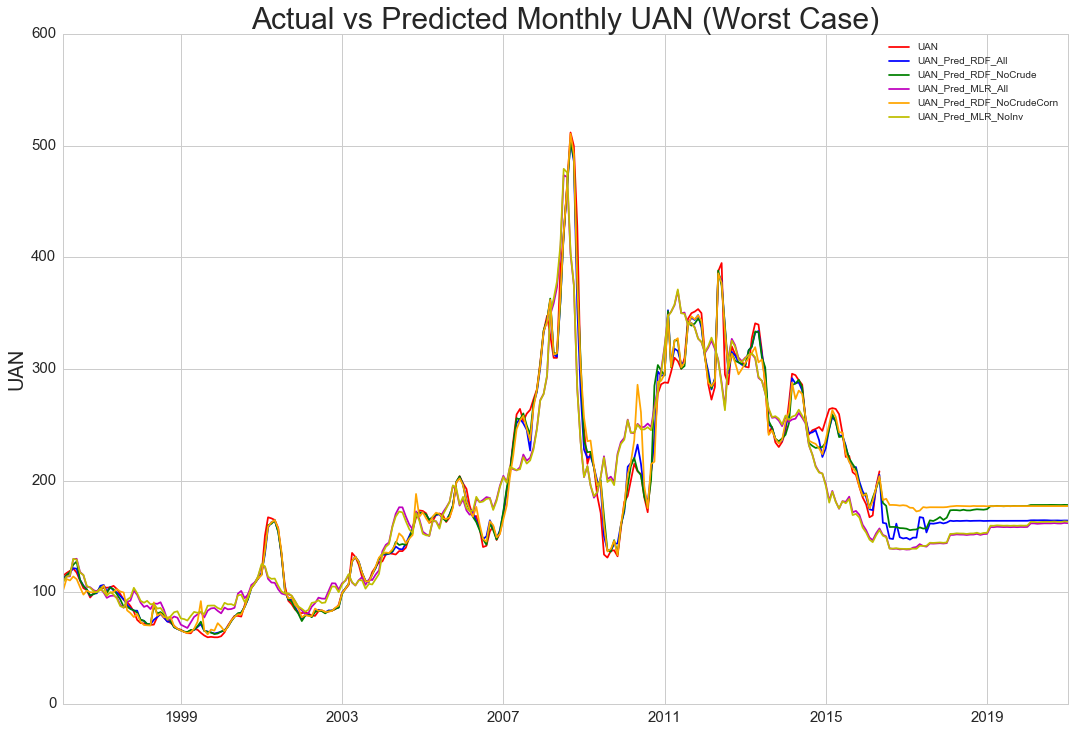

In [105]:
#looking at actual vs predicted monthly
import matplotlib.pyplot as plt
%matplotlib inline

x = (df['Monthly_Date'])
#x_pred = (df['Monthly_Date'][243:])
y1 = (df['UAN'])
y2 = (df['UAN_Pred_RDF_All'])
y3 = (df['UAN_Pred_RDF_NoCrude'])
y4 = (df['UAN_Pred_MLR_All'])
y5 = (df['UAN_Pred_RDF_NoCrudeCorn'])
y6 = (df['UAN_Pred_MLR_NoInv'])
fig = plt.figure(figsize=(18,12))
ax = fig.add_subplot(111)
ax.plot(x,y1,'r')
ax.plot(x,y2,'b')
ax.plot(x,y3,'g')
ax.plot(x,y4,'m')
ax.plot(x,y5,'orange')
ax.plot(x,y6,'y')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)
ax.set_title('Actual vs Predicted Monthly UAN (Worst Case)', size=(30))
ax.tick_params(axis='x',which='major',labelsize=15)
ax.tick_params(axis='y',which='major',labelsize=15)
ax.set_ylabel('UAN',size=(20))

plt.show()